# <u><b>Desafio n° 1:</b></u>
<b>Analisis Exploratorio de Dataset de precios de propiedades</b>

<b>Grupo 4</b>

<b>Integrantes</b>
<ul>
<li>Angeli, Francesco</li>
<li>Brandan, Gabriel</li>
<li>Cubric, Walter</li>
<li>Giusti, Patricio Daniel</li>
<li>Morelli, Francisco</li>
<li>Sanchez, Hernán</li>
</ul>
<b>Imports</b>

In [104]:
#importamos pandas
import pandas as pd
#importamos numpy
import numpy as np
#importamos Expresiones Regulares
import re
#importamos Plotly
import plotly.express as px
#importamos Seaborn
import seaborn as sns
#importamos ip widget
from ipywidgets import interact_manual

In [244]:
#importacion base de datos#
df = pd.read_csv("Data/properati.csv", sep=",")

#print tipo de datos
print(df.dtypes)

#ejemplo primeros tres
df.head(3)

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [245]:
#revisamos los campos nulos en el dataframe
cant_nulos_por_campo = df.apply(lambda x: x.isnull().sum(), axis=0)
print(cant_nulos_por_campo)

#estimamos cuanto representa esa informacion faltante sobre el total de los datos que tenemos
cant_registros = df.shape[0]
print(cant_registros)


Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64
121220


In [246]:
#estimamos cuanto representa esa informacion faltante sobre el total de los datos que tenemos en %

porc_nulos_por_campo = 100 * cant_nulos_por_campo / cant_registros
print(porc_nulos_por_campo)

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


## Definición sobre variable preponderante
Creemos que la variable mas preponderante en el analisis propuesto por la compañia es el de Precio por metro cuadrado y habiendo dos columnas, una en pesos y otra en dolares, hemos decidido revisar la que está en dolares ya que dicha moneda es mas homogea y se ve afectada en menor medida por el paso del tiempo y la inflación, haciendo comparables los diversos valores. 


In [247]:
df["state_name"].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
       'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [248]:
pais = df
#generamos una lista acotada de columnas, para centrarnos solo en las variables de estas
pais['counter'] = 1
pais[['state_name','price_per_m2','price_usd_per_m2']]
#agrupamos las provincias por provincia ycantidad de casos, totalizando la cantidad total por la columna counter 
pais_group1 = pais.groupby(by=['state_name'],as_index=False)['counter'].sum()
pais_group1

,state_name,counter
0,Bs.As. G.B.A. Zona Norte,25560
1,Bs.As. G.B.A. Zona Oeste,9322
2,Bs.As. G.B.A. Zona Sur,13952
3,Buenos Aires Costa Atlántica,10006
4,Buenos Aires Interior,2291
5,Capital Federal,32316
6,Catamarca,27
7,Chaco,57
8,Chubut,259
9,Corrientes,583


In [249]:
#generamos una nueva columna para realizar el conteo
pais['nulos'] = pd.isnull(pais['price_usd_per_m2'])
#agrupamos las provincias por provincia y la columna nulos, totalizando la cantidad de nulos por la columna counter 
pais_group1 = pais.groupby(by=['nulos'],as_index=False)['counter'].sum()
#transformamos a string la columna nulos
pais_group1['nulos'] = pais_group1['nulos'].astype(str)
#reemplazamos False por "hay datos "y True por "no hay datos"
pais_group1['nulos'] = pais_group1.nulos.str.replace('False','Hay datos')
pais_group1['nulos'] = pais_group1.nulos.str.replace('True','No hay datos')

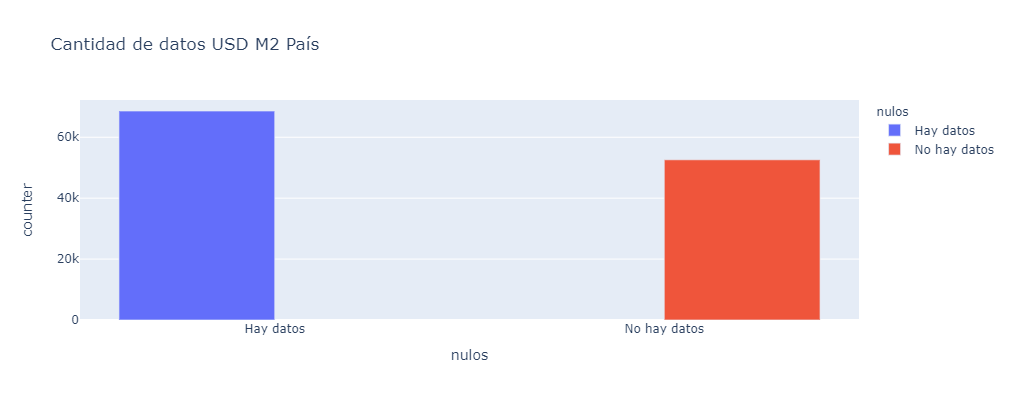

In [250]:
#graficamos los datos faltantes y completos por provincia
fig = px.bar(pais_group1, x="nulos", y="counter",
             color='nulos', barmode='group',
             height=400, title= "Cantidad de datos USD M2 País")
fig.show()

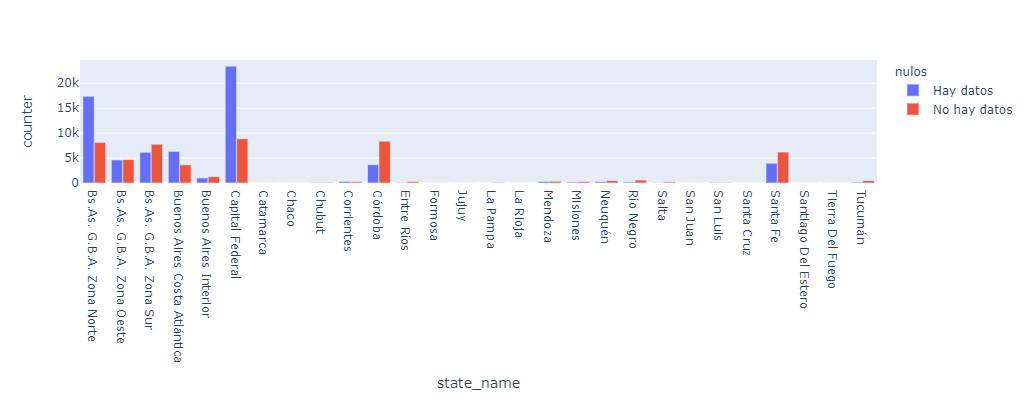

In [251]:
#agrupamos las provincias por provincia y la columna nulos, totalizando la cantidad de nulos por la columna counter 
pais_group2 = pais.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()
#transformamos a string la columna nulos
pais_group2['nulos'] = pais_group2['nulos'].astype(str)
#reemplazamos False por "hay datos "y True por "no hay datos"
pais_group2['nulos'] = pais_group2.nulos.str.replace('False','Hay datos')
pais_group2['nulos'] = pais_group2.nulos.str.replace('True','No hay datos')
#graficamos los datos faltantes y completos por provincia
fig = px.bar(pais_group2, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400)
fig.show()

# Tratamiento por provincia
Decidimos dividir el pais en dos grandes grupos

# 1. Interior
<ul>
<li>Entre Ríos</li>
<li>Santa Fe </li>
<li>Córdoba</li>
<li>Misiones</li>
<li>Salta</li>
<li>Neuquén</li>
<li>Río Negro</li>
<li>San Luis</li>
<li>Mendoza</li>
<li>Corrientes</li>
<li>Chubut</li>
<li>Tucumán</li>
<li>La Pampa</li>
<li>Chaco</li>
<li>San Juan</li>
<li>Santa Cruz</li>
<li>Tierra Del Fuego</li>
<li>Catamarca</li>
<li>Santiago Del Estero</li>
<li>Jujuy</li>
<li>La Rioja</li>
<li>Formosa</li>
</ul>


In [252]:
#aplicamos un Query en StateName de los que no son Buenos Aires y CABA
provincias = df.query(' state_name != "Capital Federal" & state_name != "Bs.As. G.B.A. Zona Sur" & state_name != "Buenos Aires Costa Atlántica" & state_name != "Bs.As. G.B.A. Zona Norte" & state_name != "Bs.As. G.B.A. Zona Oeste" & state_name != "Buenos Aires Interior"')

In [253]:
#tamaño de la máscara
provincias.shape

(27773, 28)

In [254]:
#imprimimos sus columnas
provincias.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'counter', 'nulos'],
      dtype='object')

In [255]:
## Este dato indica cuantos son los valores faltantes en el dataframe                                                                                                      
len(provincias) - len(provincias['price_usd_per_m2'].dropna()) 

18152

In [256]:
#generamos una nueva columna y traemos los nulos
provincias['nulos'] = pd.isnull(provincias['price_usd_per_m2'])


C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [257]:
#generamos una nueva columna con un para realizar un conteo
provincias['counter'] = 1
#generamos una lista acotada de columnas, para centrarnos solo en las variables de estas
provincias[['state_name','price_per_m2','price_usd_per_m2','nulos']]

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state_name,price_per_m2,price_usd_per_m2,nulos
5,Entre Ríos,NaN,NaN,True
9,Santa Fe,NaN,NaN,True
10,Córdoba,NaN,46.235139,False
20,Córdoba,NaN,NaN,True
32,Córdoba,11000.0,616.920400,False
...,...,...,...,...
121202,Córdoba,NaN,1625.348077,False
121203,Córdoba,NaN,1684.753600,False
121204,Córdoba,NaN,1684.753600,False
121205,Córdoba,NaN,1690.362000,False


In [258]:
#agrupamos las provincias por provincia y la columna nulos, totalizando la cantidad de nulos por la columna counter 
provincias_group1 = provincias.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()


In [259]:
#transformamos a string la columna nulos
provincias_group1['nulos'] = provincias_group1['nulos'].astype(str)

In [260]:
#reemplazamos False por "hay datos "y True por "no hay datos"
provincias_group1['nulos'] = provincias_group1.nulos.str.replace('False','Hay datos')
provincias_group1['nulos'] = provincias_group1.nulos.str.replace('True','No hay datos')

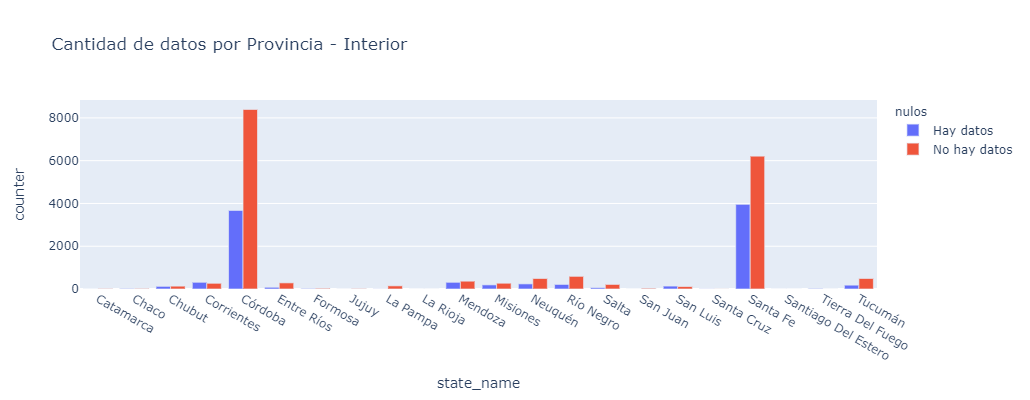

In [261]:
#graficamos los datos faltantes y completos por provincia
fig = px.bar(provincias_group1, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400, title= "Cantidad de datos por Provincia - Interior")
fig.show()

In [262]:
#agrupamos nuevamente por provincia trayendo la variable 'price_usd_per_m2' y las variables agregadas de mínimo y máximo
provincias_group2 = provincias.groupby(by=['state_name'],as_index=False)['price_usd_per_m2'].agg(['min', 'max'])

In [263]:
#reseteamos el index
provincias_group2.reset_index(inplace=True)

In [264]:
#generamos una nueva columna, la de rango que es la diferencia entre el precio maximmo y minimo
provincias_group2['rango'] = provincias_group2['max'] - provincias_group2['min']

In [265]:
provincias_group2

,state_name,min,max,rango
0,Catamarca,145.454545,1666.666667,1521.212121
1,Chaco,163.033942,2386.363636,2223.329695
2,Chubut,13.500000,14540.550661,14527.050661
3,Corrientes,83.682008,3500.000000,3416.317992
4,Córdoba,1.184571,30000.000000,29998.815429
5,Entre Ríos,5.608367,24038.461538,24032.853171
6,Formosa,1490.540000,1514.259219,23.719219
7,Jujuy,210.313787,1682.510200,1472.196412
8,La Pampa,392.585700,1402.091875,1009.506175
9,La Rioja,243.029233,243.029233,0.000000


# 2. Buenos Aires y CABA

<ul>
<li>Capital Federal</li>
<li>Bs.As. G.B.A. Zona Sur</li>
<li>Buenos Aires Costa Atlántica</li>
<li>Bs.As. G.B.A. Zona Norte</li>
<li>Bs.As. G.B.A. Zona Oeste</li> 
<li>Buenos Aires Interior</li>
</ul>


In [266]:
#generamos un query por el positivo por todas las jurisdicciones mensionadas y luego una por cada una, para poder analizarlas 
baires = df.query(' state_name == "Capital Federal" | state_name == "Bs.As. G.B.A. Zona Sur" | state_name == "Buenos Aires Costa Atlántica" | state_name == "Bs.As. G.B.A. Zona Norte" | state_name == "Bs.As. G.B.A. Zona Oeste" | state_name == "Buenos Aires Interior"')
caba = df.query(' state_name == "Capital Federal"')
bsas_sur = df.query(' state_name == "Bs.As. G.B.A. Zona Sur"')
bsas_costa = df.query(' state_name == "Buenos Aires Costa Atlántica"')
bsas_norte = df.query(' state_name == "Bs.As. G.B.A. Zona Norte"')
bsas_oeste = df.query(' state_name == "Bs.As. G.B.A. Zona Oeste"')
bsas_interior = df.query(' state_name == "Buenos Aires Interior"')


In [267]:
#tamaño de la máscara
baires.shape

(93447, 28)

In [268]:
## Este dato indica cuantos son los valores faltantes en el dataframe                                                                                                      
len(baires) - len(baires['price_usd_per_m2'].dropna()) 

34451

In [269]:
##generamos una nueva columnam en cada una de las querys y traemos los nulos de la columna de precios en dolares por metro cuadrado

baires['nulos'] = pd.isnull(baires['price_usd_per_m2'])
caba['nulos'] = pd.isnull(caba['price_usd_per_m2'])
bsas_sur['nulos'] = pd.isnull(bsas_sur['price_usd_per_m2'])
bsas_norte['nulos'] = pd.isnull(bsas_norte['price_usd_per_m2'])
bsas_costa['nulos'] = pd.isnull(bsas_costa['price_usd_per_m2'])
bsas_oeste['nulos'] = pd.isnull(bsas_oeste['price_usd_per_m2'])
bsas_interior['nulos'] = pd.isnull(bsas_interior['price_usd_per_m2'])



C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [270]:
baires.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,counter,nulos
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,1,False
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,1,True
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,1,False


In [271]:
#generamos una columna con el valor 1 en cada query
baires['counter'] = 1
caba['counter'] = 1
bsas_costa['counter'] = 1
bsas_norte['counter'] = 1
bsas_oeste['counter'] = 1
bsas_sur['counter'] = 1
bsas_interior['counter'] = 1

#generamos vista abreviada de las columnas provincia, precio x metro cuadrado, precio por metro cuadrado en dolares y la columna nulos
baires[['state_name','price_per_m2','price_usd_per_m2','nulos']]

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,state_name,price_per_m2,price_usd_per_m2,nulos
0,Capital Federal,1550.000000,1127.272727,False
1,Bs.As. G.B.A. Zona Sur,NaN,NaN,True
2,Capital Federal,1309.090909,1309.090909,False
3,Capital Federal,NaN,NaN,True
4,Buenos Aires Costa Atlántica,1828.571429,1828.571429,False
...,...,...,...,...
121215,Capital Federal,9354.838710,7699.115044,False
121216,Bs.As. G.B.A. Zona Norte,1383.333333,1383.333333,False
121217,Capital Federal,3371.794872,2858.695652,False
121218,Buenos Aires Costa Atlántica,1997.916667,1997.916667,False


In [272]:
#agrupamos las provincias por provincia y la columna nulos, totalizando la cantidad de nulos por la columna counter 
baires_group1 = baires.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()

In [273]:
#transformamos la columna nulo en string
baires_group1['nulos'] = baires_group1['nulos'].astype(str)

In [274]:
#reemplazamos False por "hay datos "y True por "no hay datos"
baires_group1['nulos'] = baires_group1.nulos.str.replace('False','Hay datos')
baires_group1['nulos'] = baires_group1.nulos.str.replace('True','No hay datos')

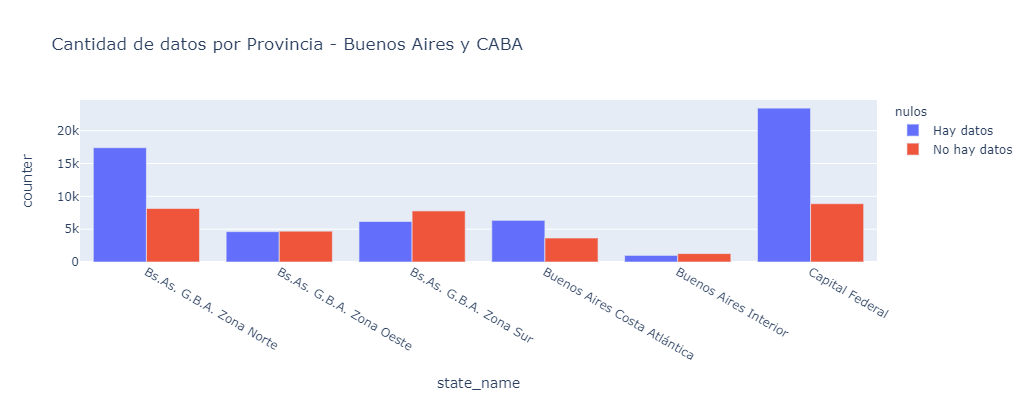

In [275]:
#imprimimos gráfico
fig = px.bar(baires_group1, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400, title = "Cantidad de datos por Provincia - Buenos Aires y CABA")
fig.show()



In [276]:
#agrupamos nuevamente por provincia trayendo la variable 'price_usd_per_m2' y las variables agregadas de mínimo y máximo
baires_group2 = baires.groupby(by=['state_name'],as_index=False)['price_usd_per_m2'].agg(['min', 'max'])

In [277]:
#reseteamos el index
baires_group2.reset_index(inplace=True)

In [278]:
#creamos la columna rango
baires_group2['rango'] = baires_group2['max'] - baires_group2['min']

In [279]:
baires_group2

,state_name,min,max,rango
0,Bs.As. G.B.A. Zona Norte,4.166667,48296.222222,48292.055556
1,Bs.As. G.B.A. Zona Oeste,7.000000,80000.000000,79993.000000
2,Bs.As. G.B.A. Zona Sur,19.314341,23140.764706,23121.450365
3,Buenos Aires Costa Atlántica,1.000000,21897.058824,21896.058824
4,Buenos Aires Interior,2.072029,4166.666667,4164.594638
5,Capital Federal,13.797467,206333.333333,206319.535867


In [280]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
caba_barrios_grupo = caba.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
caba_barrios_grupo['nulos'] = caba_barrios_grupo['nulos'].astype(str)
caba_barrios_grupo['nulos'] = caba_barrios_grupo.nulos.str.replace('False','Hay datos')
caba_barrios_grupo['nulos'] = caba_barrios_grupo.nulos.str.replace('True','No hay datos')

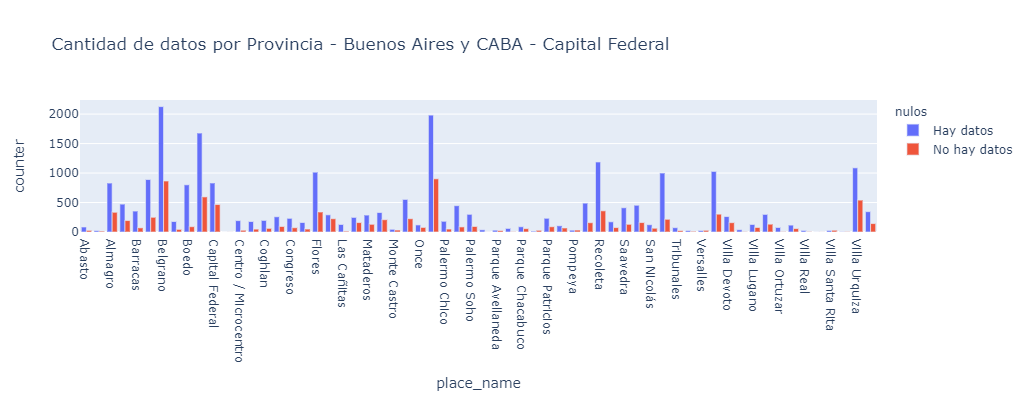

In [281]:
fig = px.bar(caba_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Capital Federal")
fig.show()



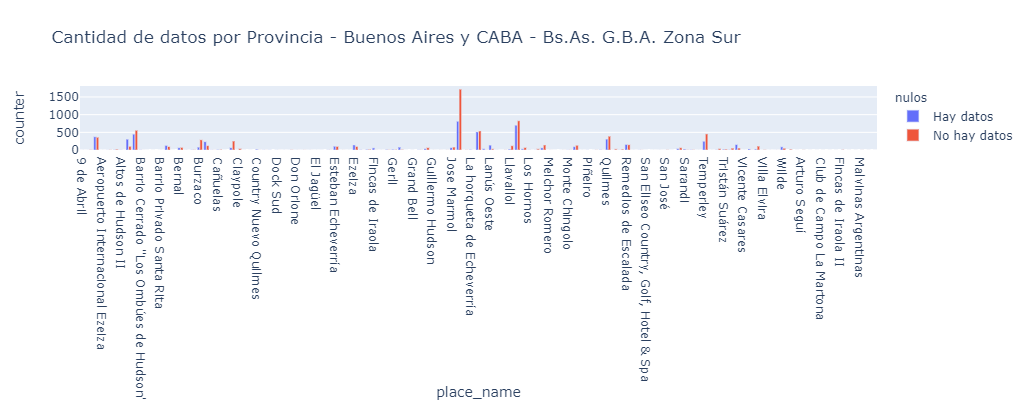

In [282]:
bsas_sur_barrios_group = bsas_sur.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_sur_barrios_group['nulos'] = bsas_sur_barrios_group['nulos'].astype(str)
bsas_sur_barrios_group['nulos'] = bsas_sur_barrios_group.nulos.str.replace('False','Hay datos')
bsas_sur_barrios_group['nulos'] = bsas_sur_barrios_group.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_sur_barrios_group, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" Cantidad de datos por Provincia - Buenos Aires y CABA - Bs.As. G.B.A. Zona Sur")
fig.show()



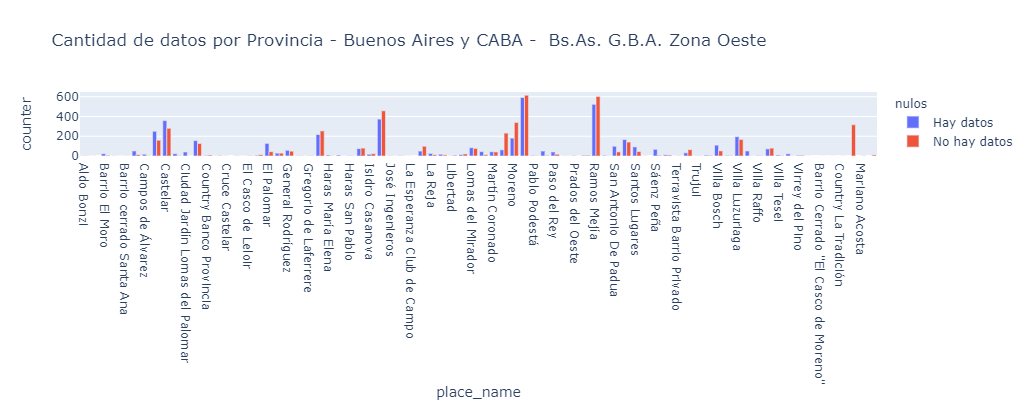

In [283]:
bsas_oeste_barrios_grupo = bsas_oeste.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_oeste_barrios_grupo['nulos'] = bsas_oeste_barrios_grupo['nulos'].astype(str)
bsas_oeste_barrios_grupo['nulos'] = bsas_oeste_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_oeste_barrios_grupo['nulos'] = bsas_oeste_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_oeste_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" Cantidad de datos por Provincia - Buenos Aires y CABA -  Bs.As. G.B.A. Zona Oeste")
fig.show()



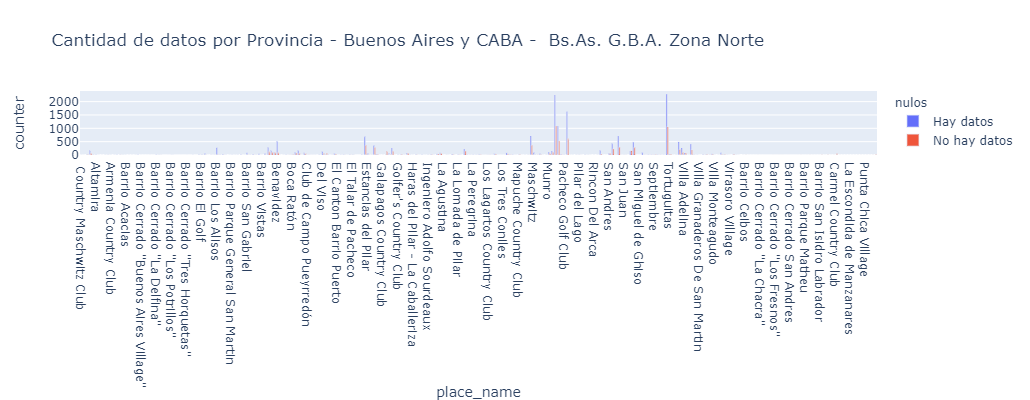

In [284]:
bsas_norte_barrios_grupo = bsas_norte.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_norte_barrios_grupo['nulos'] = bsas_norte_barrios_grupo['nulos'].astype(str)
bsas_norte_barrios_grupo['nulos'] = bsas_norte_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_norte_barrios_grupo['nulos'] = bsas_norte_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_norte_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" Cantidad de datos por Provincia - Buenos Aires y CABA -  Bs.As. G.B.A. Zona Norte")
fig.show()

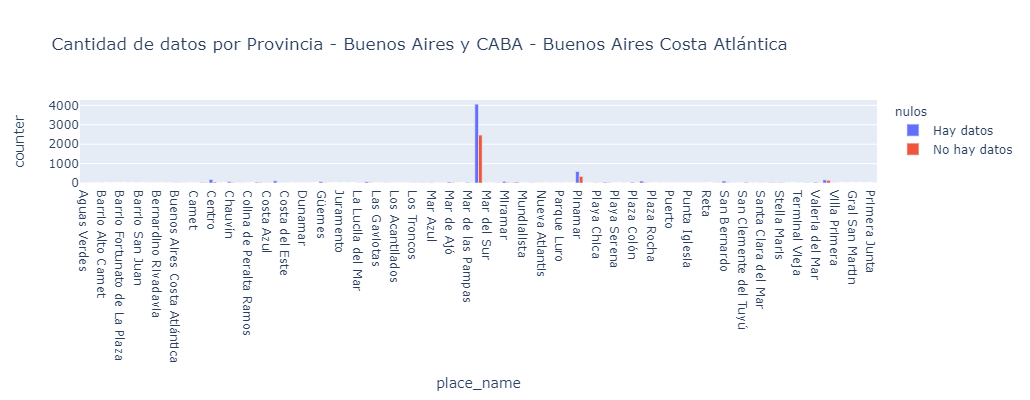

In [285]:
bsas_costa_barrios_grupo = bsas_costa.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_costa_barrios_grupo['nulos'] = bsas_costa_barrios_grupo['nulos'].astype(str)
bsas_costa_barrios_grupo['nulos'] = bsas_costa_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_costa_barrios_grupo['nulos'] = bsas_costa_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_costa_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Buenos Aires Costa Atlántica")
fig.show()

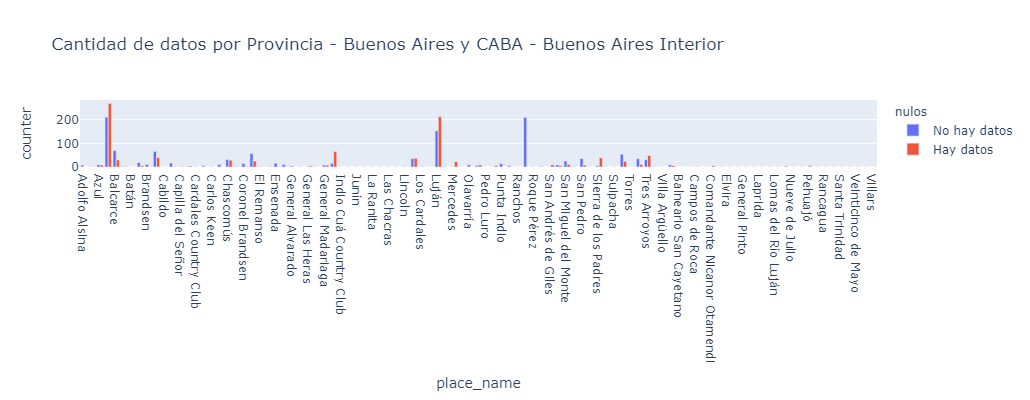

In [286]:
bsas_interior_barrios_grupo = bsas_interior.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_interior_barrios_grupo['nulos'] = bsas_interior_barrios_grupo['nulos'].astype(str)
bsas_interior_barrios_grupo['nulos'] = bsas_interior_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_interior_barrios_grupo['nulos'] = bsas_interior_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_interior_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Buenos Aires Interior")
fig.show()

# Detección 1
Creemos necesario desmembrar informacion contenida en las columnas <b>description</b> y <b>tittle</b> a fin de poder generar nuevas columnas con información importante de amenities, rooms y demas información complementaria. 

In [290]:
#identificamos las piletas y sus variantes de escritura
df = df.assign(pileta = df['description'].str.extract("((pileta)|(Pileta)|(piscina)|(Piscina)|(Pisicina)|(pisicina))", expand=False))
df_pileta = df["pileta"].notnull()
df[df_pileta]


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,counter,nulos,pileta
13,13,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,...,NaN,1.0,NaN,http://www.properati.com.ar/15bp9_venta_depart...,Torre I Mondrian. 3 ambientes con terraza y d...,Vitraux Palermo,https://thumbs4.properati.com/2/ZTUjkRzTz6YvcU...,1,False,Piscina
14,14,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,...,NaN,1.0,NaN,http://www.properati.com.ar/15bpa_venta_depart...,Torre II Dalí. Ambiente unico divisible.Vitrau...,Vitraux Palermo,https://thumbs4.properati.com/8/Uay2dC732CNlRw...,1,False,Piscina
18,18,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.425087,-58.5796585",-34.425087,...,NaN,NaN,NaN,http://www.properati.com.ar/15bq1_venta_casa_t...,Casa sobre lote al golf en barrio San Isidro L...,"Casa en venta en barrio San Isidro Labrador, T...",https://thumbs4.properati.com/6/4N9cpurqmDMKEX...,1,False,Piscina
22,22,sell,house,General Rodríguez,|Argentina|Bs.As. G.B.A. Zona Oeste|General Ro...,Argentina,Bs.As. G.B.A. Zona Oeste,3433780.0,"-34.6501160392,-58.9660339715",-34.650116,...,NaN,NaN,NaN,http://www.properati.com.ar/15bqj_venta_casa_g...,Edificada en 2 plantas. PB. amplio living con ...,CASA EN VENTA A ESTRENAR EN EL NACIONAL,https://thumbs4.properati.com/1/ggkK2Ie5nTWBtE...,1,False,Piscina
23,23,sell,apartment,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,...,NaN,2.0,NaN,http://www.properati.com.ar/15bqt_venta_depart...,"Hermoso departamento, ubicado en la calle Almi...","Excelente departamento, Impecable!!! APTO CRED...",https://thumbs4.properati.com/8/BHyv2zmce3bVoU...,1,False,pileta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121211,121211,sell,apartment,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436508.0,NaN,NaN,...,NaN,NaN,NaN,http://www.properati.com.ar/1cj9y_venta_depart...,Excelente departamento de categoría con vistas...,Departamento - Acassuso,https://thumbs4.properati.com/0/pvevdNsjE5Kf4r...,1,True,pileta
121212,121212,sell,house,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436508.0,NaN,NaN,...,NaN,NaN,NaN,http://www.properati.com.ar/1cj9z_venta_casa_a...,ESPECTACULAR CASA ESTILO RACIONALISTA EN CALLE...,Casa - Acassuso,https://thumbs4.properati.com/7/DiXqpull13ebTp...,1,True,pileta
121213,121213,sell,house,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3430813.0,NaN,NaN,...,NaN,NaN,NaN,http://www.properati.com.ar/1cja0_venta_casa_m...,EXCELENTE casa en Martinez. Inmejorable ubicai...,Casa - Martinez,https://thumbs4.properati.com/8/v0Il0v9Key--5Z...,1,True,pileta
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,1,False,pileta


In [292]:
#reemplazamos las variantes de pileta en la nueva columna por SI y caso de que fuera nulo por NO
pileta_1 = df["pileta"] =="pileta"
df.loc[pileta_1, "pileta"] = "SI"
pileta_2 = df["pileta"] =="Pileta"
df.loc[pileta_2, "pileta"] = "SI"
pileta_3 = df["pileta"] =="piscina"
df.loc[pileta_3, "pileta"] = "SI"
pileta_4 = df["pileta"] =="Piscina"
df.loc[pileta_4, "pileta"] = "SI"
pileta_5 = df["pileta"] =="Pisicina"
df.loc[pileta_5, "pileta"] = "SI"
pileta_6 = df["pileta"] =="pisicina"
df.loc[pileta_6, "pileta"] = "SI"
pileta_6 = df["pileta"].isnull()
df.loc[pileta_6, "pileta"] = "NO"

df.pileta.unique()

array(['NO', 'SI'], dtype=object)

In [295]:
#identificamos las gym y sus variantes de escritura
df = df.assign(gym = df['description'].str.extract("((gimnasio)|(gimnacio)|(gym)|(gim))", expand=False))
df_gym = df["gym"].notnull()
df[df_gym]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,rooms,expenses,properati_url,description,title,image_thumbnail,counter,nulos,pileta,gym
45,45,sell,apartment,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4649130957,-58.8595998774",-34.464913,...,1.0,NaN,http://www.properati.com.ar/15btw_venta_depart...,"Hermoso monoambiente, ideal Profesional!!!Apar...",Dpto del Campus-Ideal Profesional o Estudiantes,https://thumbs4.properati.com/6/VhRQpoioMIPxZP...,1,False,SI,gimnasio
58,58,sell,house,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436508.0,"-34.4739708766,-58.496611619",-34.473971,...,NaN,NaN,http://www.properati.com.ar/15bve_venta_casa_a...,Magnífica residencia con calidad de construcci...,"Magnífica residencia en Venta, ubicada en el e...",https://thumbs4.properati.com/6/dsYU6-j6mhmHTL...,1,False,SI,gimnasio
68,68,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.034794,-57.5416872",-38.034794,...,2.0,NaN,http://www.properati.com.ar/15bx4_venta_depart...,"Cocina integrada con barra , horno y anafe .T...",EXCELENTE DEPARTAMENTO CON VISTA AL MAR Y AL GOLF,https://thumbs4.properati.com/2/-WPR2ibAcpGmjF...,1,True,SI,gym
106,106,sell,house,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436508.0,NaN,NaN,...,NaN,NaN,http://www.properati.com.ar/15d22_venta_casa_a...,MagnÃ­fica residencia con calidad de construcc...,"Casa 1300m² con 3 Plantas en Paz, José C. 700,...",https://thumbs4.properati.com/7/lxonCHXJy_Q74g...,1,False,SI,gimnasio
152,152,sell,house,El Talar,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|El T...,Argentina,Bs.As. G.B.A. Zona Norte,3856531.0,"-34.462657,-58.624077",-34.462657,...,7.0,NaN,http://www.properati.com.ar/15d96_venta_casa_e...,Corredor Responsable: Matias Castelli - CUCICB...,VENTA CASA EN BARRIO TALAR DE PACHECO TIGRE,https://thumbs4.properati.com/3/neE-sWddfJiexZ...,1,True,SI,gimnasio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120680,120680,sell,house,Villa Allende,|Argentina|Córdoba|Villa Allende|,Argentina,Córdoba,3832815.0,NaN,NaN,...,NaN,NaN,http://www.properati.com.ar/1ci9f_venta_casa_v...,Excelente Housing exclusivo compuesto por seis...,Casa - Villa Allende,https://thumbs4.properati.com/4/7-zHYFKYEnIlAV...,1,True,SI,gimnasio
121118,121118,sell,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,NaN,NaN,...,NaN,2100.0,http://www.properati.com.ar/1cj41_venta_depart...,"TIGRE, MONTEVIDEO 1300 - Excelente departament...",Venta departamento 1 ambiente - Tigre,https://thumbs4.properati.com/2/2qYSEo3yI9J0_-...,1,False,NO,gimnasio
121120,121120,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,"-34.5930150165,-58.4282962921",-34.593015,...,NaN,NaN,http://www.properati.com.ar/1cj43_venta_depart...,Monoambiente divididoQuedando un hermoso 2 amb...,Departamento - Palermo Soho,https://thumbs4.properati.com/8/14rP35PpGc63tO...,1,False,SI,gimnasio
121148,121148,sell,PH,Flores,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,3433918.0,"-34.6299818267,-58.4574441003",-34.629982,...,NaN,NaN,http://www.properati.com.ar/1cj58_venta_ph_flo...,PH al frente con entrada individual en primer ...,PH - Flores,https://thumbs4.properati.com/0/aN-BGPoBZb0QW5...,1,True,NO,gimnasio


In [296]:
#reemplazamos las variantes de gym en la nueva columna por SI y caso de que fuera nulo por NO
gym_1 = df["gym"] =="gym"
df.loc[gym_1, "gym"] = "SI"
gym_2 = df["gym"].isnull()
df.loc[gym_2, "gym"] = "NO"
gym_3 = df["gym"] == "gimnasio"
df.loc[gym_3, "gym"] = "SI"
gym_4 = df["gym"] == "gimnacio"
df.loc[gym_4, "gym"] = "SI"
gym_5 = df["gym"] == "gim"
df.loc[gym_5, "gym"] = "SI"

df.gym.unique()

array(['NO', 'SI'], dtype=object)

In [298]:
#identificamos las parrilla y sus variantes de escritura
df = df.assign(parrilla = df['description'].str.extract("((parila)|(Parila)|(parilla)|(Parilla)|(parrila)|(Parrila)|(parrilla)|(parrilla)|(asador)|(Asador)|(asadores)|(Asadores)|(parrillas)|(Parrillas))", expand=False))
df_parrilla = df["parrilla"].notnull()
df[df_parrilla]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,expenses,properati_url,description,title,image_thumbnail,counter,nulos,pileta,gym,parrilla
16,16,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6523561177,-58.5016239381",-34.652356,...,NaN,http://www.properati.com.ar/15bpj_venta_ph_mat...,Ventas Mataderos al frente Duplex 4 amb.- Plan...,VENTA-MATADEROS-DUPLEX 4 AMB.,https://thumbs4.properati.com/7/XSdJtiE8ZkWgon...,1,False,NO,NO,parrilla
22,22,sell,house,General Rodríguez,|Argentina|Bs.As. G.B.A. Zona Oeste|General Ro...,Argentina,Bs.As. G.B.A. Zona Oeste,3433780.0,"-34.6501160392,-58.9660339715",-34.650116,...,NaN,http://www.properati.com.ar/15bqj_venta_casa_g...,Edificada en 2 plantas. PB. amplio living con ...,CASA EN VENTA A ESTRENAR EN EL NACIONAL,https://thumbs4.properati.com/1/ggkK2Ie5nTWBtE...,1,False,SI,NO,parrilla
24,24,sell,apartment,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,Bs.As. G.B.A. Zona Oeste,3435607.0,"-34.6511052674,-58.6438613116",-34.651105,...,NaN,http://www.properati.com.ar/15bqu_venta_depart...,EXCLUSIVO DEPARTAMENTO DE EXCELENTE CATEGORIA...,VENTA DE POZO- DEPTO 4 AMBIENTES- CASTELAR.,https://thumbs4.properati.com/4/GSkf89I26TnBZw...,1,False,NO,NO,parrilla
25,25,sell,apartment,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,Bs.As. G.B.A. Zona Oeste,3435607.0,"-34.6511052674,-58.6438613116",-34.651105,...,NaN,http://www.properati.com.ar/15bqv_venta_depart...,EXCLUSIVO DEPARTAMENTO DE EXCELENTE CATEGORÍA...,VENTA DE POZO- DEPTO 4 AMBIENTES- CASTELAR.,https://thumbs4.properati.com/8/aAQkTsxaLGndbA...,1,False,NO,NO,parrilla
26,26,sell,house,Barrio San Gabriel,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Barr...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.3640924,-58.6897345",-34.364092,...,NaN,http://www.properati.com.ar/15bqx_venta_casa_b...,Casa en venta en complejo Villanueva barrio Sa...,Casa muy linda en San Gabriel Villanueva,https://thumbs4.properati.com/2/DWZjGcq_Z-PKSC...,1,False,NO,NO,parrilla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121207,121207,sell,house,Escobar,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|,Argentina,Bs.As. G.B.A. Zona Norte,3434130.0,NaN,NaN,...,3000.0,http://www.properati.com.ar/1cj79_venta_casa_e...,Puertos- Barrio Vistas - L. 88Casa en venta so...,"Casa en venta Puertos, barrio Vistas",https://thumbs4.properati.com/6/C8PZ0gwxEBmmj_...,1,True,NO,NO,parrilla
121208,121208,sell,house,Escobar,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|,Argentina,Bs.As. G.B.A. Zona Norte,3434130.0,NaN,NaN,...,3000.0,http://www.properati.com.ar/1cj7a_venta_casa_e...,Puertos- Barrio Vistas - L. 88Casa en venta so...,"Casa en venta Puertos, barrio Vistas",https://thumbs4.properati.com/6/C8PZ0gwxEBmmj_...,1,True,NO,NO,parrilla
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,1,False,SI,NO,parrilla
121216,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...,1,False,SI,NO,parrilla


In [300]:
#reemplazamos las variantes de parrilla en la nueva columna por SI y caso de que fuera nulo por NO
parrilla_1 = df["parrilla"] =="parila"
df.loc[parrilla_1, "parrilla"] = "SI"
parrilla_2 = df["parrilla"] =="Parila"
df.loc[parrilla_2, "parrilla"] = "SI"
parrilla_3 = df["parrilla"] =="parilla"
df.loc[parrilla_3, "parrilla"] = "SI"
parrilla_4 = df["parrilla"] =="Parilla"
df.loc[parrilla_4, "parrilla"] = "SI"
parrilla_5 = df["parrilla"] =="parrila"
df.loc[parrilla_5, "parrilla"] = "SI"
parrilla_6 = df["parrilla"] =="Parrila"
df.loc[parrilla_6, "parrilla"] = "SI"
parrilla_7 = df["parrilla"] =="parrilla"
df.loc[parrilla_7, "parrilla"] = "SI"
parrilla_8 = df["parrilla"] =="Parrilla"
df.loc[parrilla_8, "parrilla"] = "SI"
parrilla_9 = df["parrilla"] =="asador"
df.loc[parrilla_9, "parrilla"] = "SI"
parrilla_10 = df["parrilla"] =="Asador"
df.loc[parrilla_10, "parrilla"] = "SI"
parrilla_11 = df["parrilla"] =="asadores"
df.loc[parrilla_11, "parrilla"] = "SI"
parrilla_12 = df["parrilla"] =="Asadores"
df.loc[parrilla_12, "parrilla"] = "SI"
parrilla_13 = df["parrilla"] =="parrillas"
df.loc[parrilla_13, "parrilla"] = "SI"
parrilla_14 = df["parrilla"] =="Parrillas"
df.loc[parrilla_14, "parrilla"] = "SI"
parrilla_15 = df["parrilla"].isnull()
df.loc[parrilla_15, "parrilla"] = "NO"

df.parrilla.unique()

array(['NO', 'SI'], dtype=object)

In [302]:
#identificamos las cocheras y sus variantes de escritura
df = df.assign(cochera = df['description'].str.extract("((cochera)|(Cochera)|(cocheras)|(cocheras)|(garage)|(Garage)|(estacionamiento)|(Estacionamiento)|(parking)|(Parking))", expand=False))
df_cochera = df["cochera"].notnull()
df[df_cochera]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,properati_url,description,title,image_thumbnail,counter,nulos,pileta,gym,parrilla,cochera
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,1,True,NO,NO,NO,cochera
10,10,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4200833,-64.1887761",-31.420083,...,http://www.properati.com.ar/15boy_venta_casa_c...,"Hermosa casa sin terminar de 3 dormitorios, ba...",Casa sin terminar en Falda de Cañete. ...,https://thumbs4.properati.com/3/mQkhIxXpTTbMSc...,1,False,NO,NO,NO,cochera
15,15,sell,house,Bella Vista,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel...,Argentina,Bs.As. G.B.A. Zona Norte,3436061.0,"-34.5879112015,-58.6987828445",-34.587911,...,http://www.properati.com.ar/15bpd_venta_casa_b...,ULTIMA UNIDAD DISPONIBLEHAUS BOULEVARD: Metros...,HAUS VILLAGE / BELLA VISTA / 115m² MAS PATIO /...,https://thumbs4.properati.com/6/F7EIhDPQfafSlp...,1,False,NO,NO,NO,cochera
17,17,sell,apartment,Barrio El Golf,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4087174767,-58.6343892841",-34.408717,...,http://www.properati.com.ar/15bpl_venta_depart...,Excelente 3 ambientes en un 6 piso y con terra...,3 ambientes en venta en Acqua Golf 1 en Nordel...,https://thumbs4.properati.com/8/txJsOWitsI5tjM...,1,False,NO,NO,NO,Cochera
23,23,sell,apartment,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,...,http://www.properati.com.ar/15bqt_venta_depart...,"Hermoso departamento, ubicado en la calle Almi...","Excelente departamento, Impecable!!! APTO CRED...",https://thumbs4.properati.com/8/BHyv2zmce3bVoU...,1,False,SI,NO,NO,cochera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121210,121210,sell,house,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3430813.0,NaN,NaN,...,http://www.properati.com.ar/1cj8o_venta_casa_m...,Dos viviendas en block en excelente ubicación ...,Casa - Martinez,https://thumbs4.properati.com/7/3-sXSLx8KPDZzR...,1,True,NO,NO,NO,Cochera
121211,121211,sell,apartment,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436508.0,NaN,NaN,...,http://www.properati.com.ar/1cj9y_venta_depart...,Excelente departamento de categoría con vistas...,Departamento - Acassuso,https://thumbs4.properati.com/0/pvevdNsjE5Kf4r...,1,True,SI,NO,NO,cochera
121214,121214,sell,store,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|,Argentina,Bs.As. G.B.A. Zona Norte,3428983.0,NaN,NaN,...,http://www.properati.com.ar/1cja1_venta_local_...,***VENTA CON RENTA***Local en EDIFICIO lomas ...,Local - San Isidro,https://thumbs4.properati.com/7/R-j0JiSePtAriH...,1,True,NO,NO,NO,Cochera
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,1,False,SI,NO,SI,Cochera


In [303]:
#reemplazamos las variantes de cochera en la nueva columna por SI y caso de que fuera nulo por NO
cochera_1 = df["cochera"] =="cochera"
df.loc[cochera_1, "cochera"] = "SI"
cochera_2 = df["cochera"] =="Cochera"
df.loc[cochera_2, "cochera"] = "SI"
cochera_3 = df["cochera"] =="cocheras"
df.loc[cochera_3, "cochera"] = "SI"
cochera_4 = df["cochera"] =="Cocheras"
df.loc[cochera_4, "cochera"] = "SI"
cochera_5 = df["cochera"] =="garage"
df.loc[cochera_5, "cochera"] = "SI"
cochera_6 = df["cochera"] =="Garage"
df.loc[cochera_6, "cochera"] = "SI"
cochera_7 = df["cochera"] =="estacionamiento"
df.loc[cochera_7, "cochera"] = "SI"
cochera_8 = df["cochera"] =="Estacionamiento"
df.loc[cochera_8, "cochera"] = "SI"
cochera_9 = df["cochera"] =="parking"
df.loc[cochera_9, "cochera"] = "SI"
cochera_10 = df["cochera"] =="Parking"
df.loc[cochera_10, "cochera"] = "SI"
cochera_11 = df["cochera"].isnull()
df.loc[cochera_11, "cochera"] = "NO"

df.cochera.unique()

array(['NO', 'SI'], dtype=object)

In [305]:
#identificamos el jardin y sus variantes de escritura
df = df.assign(jardin = df['description'].str.extract("(jardin)|(Jardin)|(parque)|(Parque)", expand=False))
df_jardin = df["jardin"].notnull()
df[df_jardin]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,description,title,image_thumbnail,counter,nulos,pileta,gym,parrilla,cochera,jardin
23,23,sell,apartment,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,...,"Hermoso departamento, ubicado en la calle Almi...","Excelente departamento, Impecable!!! APTO CRED...",https://thumbs4.properati.com/8/BHyv2zmce3bVoU...,1,False,SI,NO,NO,SI,jardin
26,26,sell,house,Barrio San Gabriel,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Barr...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.3640924,-58.6897345",-34.364092,...,Casa en venta en complejo Villanueva barrio Sa...,Casa muy linda en San Gabriel Villanueva,https://thumbs4.properati.com/2/DWZjGcq_Z-PKSC...,1,False,NO,NO,SI,NO,jardin
51,51,sell,house,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,"-34.6363209,-58.4107019",-34.636321,...,Se encuentra dentro del Distrito Tecnológico. ...,Casa impecable refaccionada! 6 ambientes.,https://thumbs4.properati.com/4/bcATdI9jz_52YM...,1,False,SI,NO,SI,SI,jardin
56,56,sell,house,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3428983.0,"-34.4815405,-58.537634",-34.481541,...,"Chalet clasico, ladrillo a la vista, techos de...",Chalet con buen jardin - Zona Jockey,https://thumbs4.properati.com/9/nx7f745tdbIT4S...,1,False,SI,NO,NO,SI,jardin
63,63,sell,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4690857,-58.9134611",-34.469086,...,Casa con Local y Departamento en primer piso. ...,"Casa , Local y Departamento en Primer piso!!!",https://thumbs4.properati.com/7/sZe2JL4bTUIKQO...,1,False,NO,NO,NO,NO,jardin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120644,120644,sell,house,Agua de Oro,|Argentina|Córdoba|Agua de Oro|,Argentina,Córdoba,3866667.0,NaN,NaN,...,Es una muy linda casa ubicada a una cuadra y m...,Casa - Agua De Oro,https://thumbs4.properati.com/8/0yY7MhzWgPxBXh...,1,True,SI,NO,SI,SI,jardin
120673,120673,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,NaN,NaN,...,Se trata de una excelente propiedad ubicada en...,Casa - Jockey Club,https://thumbs4.properati.com/2/DiMmTsDGPs8GJs...,1,True,SI,NO,SI,SI,jardin
120958,120958,sell,house,Ituzaingó,|Argentina|Corrientes|Ituzaingó|,Argentina,Corrientes,3433357.0,NaN,NaN,...,Casa en barrio privado HARAS FACUNDO. Esta com...,"Casa cuatro ambientes, HARAS FACUNDO.",https://thumbs4.properati.com/3/IBKpQsakXvrNVM...,1,False,NO,NO,NO,NO,jardin
121211,121211,sell,apartment,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436508.0,NaN,NaN,...,Excelente departamento de categoría con vistas...,Departamento - Acassuso,https://thumbs4.properati.com/0/pvevdNsjE5Kf4r...,1,True,SI,NO,NO,SI,jardin


In [306]:
#reemplazamos las variantes de cochera en la nueva columna por SI y caso de que fuera nulo por NO
jardin_1 = df["jardin"] =="jardin"
df.loc[jardin_1, "jardin"] = "SI"
jardin_2 = df["jardin"] =="Jardin"
df.loc[jardin_2, "jardin"] = "SI"
jardin_3 = df["jardin"] =="parque"
df.loc[jardin_3, "jardin"] = "SI"
jardin_4 = df["jardin"] =="Parque"
df.loc[jardin_4, "jardin"] = "SI"
jardin_5 = df["jardin"].isnull()
df.loc[jardin_5, "jardin"] = "NO"

df.jardin.unique()

array(['NO', 'SI'], dtype=object)

In [307]:
#identificamos el jardin y sus variantes de escritura
df = df.assign(new_rooms = df['description'].str.extract("((?i)un\s(?i)ambiente|(?i)monoamb|(?i)un\s(?i)amb|\d\s(?i)amb|(?i)amb\s\d|\d\s(?i)ambiente|ambiente(?i)\s\d|\d\s(?i)ambientes|ambientes(?i)\s\d|\d(?i)amb|amb(?i)\d|\d(?i)ambiente|ambiente(?i)\d|\d(?i)ambientes|ambientes(?i)\d|(?i)dos\s(?i)amb|(?i)tres\s(?i)amb|(?i)cuatro\s(?i)amb|(?i)cinco\s(?i)amb|(?i)unico\s(?i)amb|(?i)ambiente\s(?i)unico|(?i)ambiente\s(?i)único|(?i)ambientes\s(?i)dos|(?i)ambientes\s(?i)tres|(?i)ambientes\s(?i)cuatro|(?i)ambientes\s(?i)cinco|(?i)ambientes\s(?i)seis|(?i)ambientes\s(?i)siete|(?i)ambientes\s(?i)ocho|(?i)ambientes\s(?i)nueve|(?i)2 AMBIENTES)", re.IGNORECASE, expand=False))
df

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,title,image_thumbnail,counter,nulos,pileta,gym,parrilla,cochera,jardin,new_rooms
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,1,False,NO,NO,NO,NO,NO,2 AMB
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,1,True,NO,NO,NO,SI,NO,NaN
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,1,False,NO,NO,NO,NO,NO,2 AMB
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,1,True,NO,NO,NO,NO,NO,3 amb
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,1,False,NO,NO,NO,NO,NO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,1,False,SI,NO,SI,SI,NO,NaN
121216,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...,1,False,SI,NO,SI,SI,SI,NaN
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,1,False,NO,NO,SI,NO,NO,monoamb
121218,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...,1,False,NO,NO,NO,NO,NO,2 Amb


In [172]:
#df_rooms_unique = df["new_rooms"].unique()
#print(df_rooms_unique)
ambientes_44 = df["new_rooms"].isnull()
df[ambientes_44]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,description,title,image_thumbnail,counter,nulos,pileta,gym,cochera,jardin,new_rooms
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,1,True,NaN,NO,SI,NO,NaN
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,1,False,NaN,NO,NO,NO,NaN
5,5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...,1,True,NaN,NO,NO,NO,NaN
6,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...,1,False,NaN,NO,NO,NO,NaN
9,9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.properati.com/8/RCf1YEWdF4rv98...,1,True,NaN,NO,NO,NO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121213,121213,sell,house,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3430813.0,NaN,NaN,...,EXCELENTE casa en Martinez. Inmejorable ubicai...,Casa - Martinez,https://thumbs4.properati.com/8/v0Il0v9Key--5Z...,1,True,pileta,SI,NO,NO,NaN
121214,121214,sell,store,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|,Argentina,Bs.As. G.B.A. Zona Norte,3428983.0,NaN,NaN,...,***VENTA CON RENTA***Local en EDIFICIO lomas ...,Local - San Isidro,https://thumbs4.properati.com/7/R-j0JiSePtAriH...,1,True,NaN,NO,SI,NO,NaN
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,1,False,pileta,NO,SI,NO,NaN
121216,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...,1,False,pileta,NO,SI,SI,NaN


In [ ]:
ambientes_1 = df["new_rooms"] =='2 AMB'
df.loc[ambientes_1, "new_rooms"] = 2
ambientes_2 = df["new_rooms"] =='3 amb'
df.loc[ambientes_2, "new_rooms"] = 3
ambientes_3 = df["new_rooms"] == 'MONOAMB'
df.loc[ambientes_3, "new_rooms"] = 1
ambientes_4 = df["new_rooms"] == 'DOS AMB'
df.loc[ambientes_4, "new_rooms"] = 2
ambientes_5 = df["new_rooms"] == '1 amb'
df.loc[ambientes_5, "new_rooms"] = 1
ambientes_6 = df["new_rooms"] == 'Ambiente unico'
df.loc[ambientes_6, "new_rooms"] = 1
#
ambientes_7 = df["new_rooms"] == '4 amb'
df.loc[ambientes_7, "new_rooms"] = 4
ambientes_8 = df["new_rooms"] == 'cuatro amb'
df.loc[ambientes_8, "new_rooms"] = 4
ambientes_9 = df["new_rooms"] == 'cinco amb'
df.loc[ambientes_9, "new_rooms"] = 5
ambientes_10 = df["new_rooms"] == '3 AMB'
df.loc[ambientes_10, "new_rooms"] = 3
ambientes_11 = df["new_rooms"] == 'monoamb'
df.loc[ambientes_11, "new_rooms"] = 1
ambientes_12 = df["new_rooms"] == '3 Amb'
df.loc[ambientes_12, "new_rooms"] = 3
#
ambientes_13 = df["new_rooms"] == '1 AMB'
df.loc[ambientes_13, "new_rooms"] = 1
ambientes_14 = df["new_rooms"] == 'Monoamb'
df.loc[ambientes_14, "new_rooms"] = 1
ambientes_15= df["new_rooms"] == 'TRES AMB'
df.loc[ambientes_15, "new_rooms"] = 3
ambientes_16 = df["new_rooms"] == '2 Amb'
df.loc[ambientes_16, "new_rooms"] = 2
ambientes_17 = df["new_rooms"] == '1 Amb'
df.loc[ambientes_17, "new_rooms"] = 1
ambientes_18 = df["new_rooms"] == '2 amb'
df.loc[ambientes_18, "new_rooms"] = 2
#
ambientes_19 = df["new_rooms"] == 'tres amb'
df.loc[ambientes_19, "new_rooms"] = 3
ambientes_20 = df["new_rooms"] == '5 amb'
df.loc[ambientes_20, "new_rooms"] = 5
ambientes_21= df["new_rooms"] == '4 AMB'
df.loc[ambientes_21, "new_rooms"] = 4
ambientes_22 = df["new_rooms"] == 'dos amb'
df.loc[ambientes_22, "new_rooms"] = 2
ambientes_23 = df["new_rooms"] == 'ambiente 2'
df.loc[ambientes_23, "new_rooms"] = 2
ambientes_24 = df["new_rooms"] == '5 Amb'
df.loc[ambientes_24, "new_rooms"] = 5
ambientes_25 = df["new_rooms"] == '5 AMB'
df.loc[ambientes_25, "new_rooms"] = 5
#
ambientes_26 = df["new_rooms"] == 'un ambiente'
df.loc[ambientes_26, "new_rooms"] = 1
ambientes_27 = df["new_rooms"] == 'UN AMBIENTE'
df.loc[ambientes_27, "new_rooms"] = 1
ambientes_28= df["new_rooms"] == '4 Amb'
df.loc[ambientes_28, "new_rooms"] = 4
ambientes_29 = df["new_rooms"] == '7 Amb'
df.loc[ambientes_29, "new_rooms"] = 7
ambientes_30 = df["new_rooms"] == 'AMBIENTE 2'
df.loc[ambientes_30, "new_rooms"] = 2
ambientes_31 = df["new_rooms"] == '3amb'
df.loc[ambientes_31, "new_rooms"] = 3
ambientes_32 = df["new_rooms"] == 'Cuatro amb'
df.loc[ambientes_32, "new_rooms"] = 4
#
ambientes_33 = df["new_rooms"] == 'UN Amb'
df.loc[ambientes_33, "new_rooms"] = 1
ambientes_34 = df["new_rooms"] == 'TRES Amb'
df.loc[ambientes_34, "new_rooms"] = 3
ambientes_35= df["new_rooms"] == 'DOS Amb'
df.loc[ambientes_35, "new_rooms"] = 2
ambientes_36 = df["new_rooms"] == 'Dos amb'
df.loc[ambientes_36, "new_rooms"] = 2
ambientes_37 = df["new_rooms"] == '6 AMB'
df.loc[ambientes_37, "new_rooms"] = 6
ambientes_38 = df["new_rooms"] == '7 AMB'
df.loc[ambientes_38, "new_rooms"] = 7
ambientes_39 = df["new_rooms"] == '6 amb'
df.loc[ambientes_33, "new_rooms"] = 6
#
ambientes_40 = df["new_rooms"] == '2amb'
df.loc[ambientes_40, "new_rooms"] = 2
ambientes_41 = df["new_rooms"] == 'Cinco amb'
df.loc[ambientes_41, "new_rooms"] = 5
ambientes_42 = df["new_rooms"] == '2AMB'
df.loc[ambientes_42, "new_rooms"] = 2
ambientes_43 = df["new_rooms"] == 'Ambiente 3'
df.loc[ambientes_43, "new_rooms"] = 3
ambientes_44 = df["new_rooms"] == '0 amb'
df.loc[ambientes_44, "new_rooms"] = 10
ambientes_45 = df["new_rooms"] == 'AMBIENTES 3'
df.loc[ambientes_45, "new_rooms"] = 3
ambientes_46 = df["new_rooms"] == '5amb'
df.loc[ambientes_46, "new_rooms"] = 5
ambientes_47 = df["new_rooms"] == '7 amb'
df.loc[ambientes_47, "new_rooms"] = 7
ambientes_48 = df["new_rooms"] == '1Amb'
df.loc[ambientes_48, "new_rooms"] = 1
ambientes_49 = df["new_rooms"] == 'Tres amb'
df.loc[ambientes_49, "new_rooms"] = 3
#
ambientes_50 = df["new_rooms"] == '6 Amb'
df.loc[ambientes_50, "new_rooms"] = 6
ambientes_51 = df["new_rooms"] == '8 amb'
df.loc[ambientes_51, "new_rooms"] = 8
ambientes_52 = df["new_rooms"] == 'CINCO AMB'
df.loc[ambientes_52, "new_rooms"] = 5
ambientes_53 = df["new_rooms"] == 'CUATRO AMB'
df.loc[ambientes_53, "new_rooms"] = 4
ambientes_54 = df["new_rooms"] == '9 Amb'
df.loc[ambientes_54, "new_rooms"] = 9
ambientes_55 = df["new_rooms"] == '4amb'
df.loc[ambientes_55, "new_rooms"] = 4
ambientes_56 = df["new_rooms"] == 'Un ambiente'
df.loc[ambientes_56, "new_rooms"] = 1
ambientes_57 = df["new_rooms"] == '6Amb'
df.loc[ambientes_57, "new_rooms"] = 6
ambientes_58 = df["new_rooms"] == '3AMB'
df.loc[ambientes_58, "new_rooms"] = 3
ambientes_59 = df["new_rooms"] == 'ambientes 4'
df.loc[ambientes_59, "new_rooms"] = 4
#
ambientes_60 = df["new_rooms"] == 'Dos\xa0amb'
df.loc[ambientes_60, "new_rooms"] = 2
ambientes_61 = df["new_rooms"] == 'Cuatro Amb'
df.loc[ambientes_61, "new_rooms"] = 4
ambientes_62 = df["new_rooms"] == '9 AMB'
df.loc[ambientes_62, "new_rooms"] = 9
ambientes_63 = df["new_rooms"] == 'AMBIENTES 1'
df.loc[ambientes_63, "new_rooms"] = 1
ambientes_64 = df["new_rooms"] == "Dos\xa0Amb"
df.loc[ambientes_64, "new_rooms"] = 2
ambientes_65 = df["new_rooms"] == 'Cuatro\xa0amb'
df.loc[ambientes_65, "new_rooms"] = 4
ambientes_66 = df["new_rooms"] == 'AMBIENTE ÚNICO'
df.loc[ambientes_66, "new_rooms"] = 1
ambientes_67 = df["new_rooms"] == 'TRES amb'
df.loc[ambientes_67, "new_rooms"] = 3
ambientes_68 = df["new_rooms"] == 'AMBIENTES DOS'
df.loc[ambientes_68, "new_rooms"] = 2
ambientes_69 = df["new_rooms"] == '0 Amb'
df.loc[ambientes_69, "new_rooms"] = 10
#
ambientes_70 = df["new_rooms"] == 'AMBIENTE 3'
df.loc[ambientes_70, "new_rooms"] = 3
ambientes_71 = df["new_rooms"] == '8 AMB'
df.loc[ambientes_71, "new_rooms"] = 8
ambientes_72 = df["new_rooms"] == '8AMB'
df.loc[ambientes_72, "new_rooms"] = 8
ambientes_73 = df["new_rooms"] == 'Tres Amb'
df.loc[ambientes_73, "new_rooms"] = 3
ambientes_74 = df["new_rooms"] == 'tres\xa0amb'
df.loc[ambientes_74, "new_rooms"] = 3
ambientes_75 = df["new_rooms"] == '3Amb'
df.loc[ambientes_75, "new_rooms"] = 3
ambientes_76 = df["new_rooms"] == '1amb'
df.loc[ambientes_76, "new_rooms"] = 1
ambientes_77 = df["new_rooms"] == '9 amb'
df.loc[ambientes_77, "new_rooms"] = 9
ambientes_78 = df["new_rooms"] == 'Ambiente único'
df.loc[ambientes_78, "new_rooms"] = 1
ambientes_79 = df["new_rooms"] == 'ambiente único'
df.loc[ambientes_79, "new_rooms"] = 1
#
ambientes_80 = df["new_rooms"] == '4AMB'
df.loc[ambientes_80, "new_rooms"] = 4
ambientes_81 = df["new_rooms"] == '2Amb'
df.loc[ambientes_81, "new_rooms"] = 2
ambientes_82 = df["new_rooms"] == 'AMBIENTE UNICO'
df.loc[ambientes_82, "new_rooms"] = 1
ambientes_83 = df["new_rooms"] == 'dos Amb'
df.loc[ambientes_83, "new_rooms"] = 2
ambientes_84 = df["new_rooms"] == '8 Amb'
df.loc[ambientes_84, "new_rooms"] = 8
ambientes_85 = df["new_rooms"] == 'tres Amb'
df.loc[ambientes_85, "new_rooms"] = 3
ambientes_86 = df["new_rooms"] == 'un Ambiente'
df.loc[ambientes_86, "new_rooms"] = 1
ambientes_87 = df["new_rooms"] == 'un amb'
df.loc[ambientes_87, "new_rooms"] = 1
ambientes_88 = df["new_rooms"] == '0Amb'
df.loc[ambientes_88, "new_rooms"] = 10
ambientes_89 = df["new_rooms"] == '1AMB'
df.loc[ambientes_89, "new_rooms"] = 1
#
ambientes_90 = df["new_rooms"] == 'MonoAmb'
df.loc[ambientes_90, "new_rooms"] = 1
ambientes_91 = df["new_rooms"] == '0 AMB'
df.loc[ambientes_91, "new_rooms"] = 10
ambientes_92 = df["new_rooms"] == 'Dos Amb'
df.loc[ambientes_92, "new_rooms"] = 2
ambientes_93 = df["new_rooms"] == 'ambiente unico'
df.loc[ambientes_93, "new_rooms"] = 1
ambientes_94 = df["new_rooms"] == 'Ambientes 5'
df.loc[ambientes_94, "new_rooms"] = 5
ambientes_95 = df["new_rooms"] == '7amb'
df.loc[ambientes_95, "new_rooms"] = 7
ambientes_96 = df["new_rooms"] == 'DOS amb'
df.loc[ambientes_96, "new_rooms"] = 2
ambientes_97 = df["new_rooms"] == 'Un Ambiente'
df.loc[ambientes_97, "new_rooms"] = 1
ambientes_98 = df["new_rooms"] == 'Ambiente Único'
df.loc[ambientes_98, "new_rooms"] = 1
ambientes_99 = df["new_rooms"] == '5Amb'
df.loc[ambientes_99, "new_rooms"] = 5
#
ambientes_100 = df["new_rooms"] == 'ambiente 3'
df.loc[ambientes_100, "new_rooms"] = 3
ambientes_101 = df["new_rooms"] == 'cuatro Amb'
df.loc[ambientes_101, "new_rooms"] = 4
ambientes_102 = df["new_rooms"] == '7Amb'
df.loc[ambientes_102, "new_rooms"] = 7
ambientes_103 = df["new_rooms"] == 'AMBIENTE 1'
df.loc[ambientes_103, "new_rooms"] = 1
ambientes_104 = df["new_rooms"] == 'AMBIENTE 4'
df.loc[ambientes_104, "new_rooms"] = 4
ambientes_105 = df["new_rooms"] == 'ambientes 6'
df.loc[ambientes_105, "new_rooms"] = 6
ambientes_106 = df["new_rooms"] == '4Amb'
df.loc[ambientes_106, "new_rooms"] = 4
ambientes_107 = df["new_rooms"] == 'UN AMB'
df.loc[ambientes_107, "new_rooms"] = 1
ambientes_108 = df["new_rooms"] == 'ambiente4'
df.loc[ambientes_108, "new_rooms"] = 4
ambientes_109 = df["new_rooms"] == '5AMB'
df.loc[ambientes_109, "new_rooms"] = 5
#
ambientes_110 = df["new_rooms"] == 'Ambientes 3'
df.loc[ambientes_110, "new_rooms"] = 3
ambientes_111 = df["new_rooms"] == 'Ambientes 6'
df.loc[ambientes_111, "new_rooms"] = 6
ambientes_112 = df["new_rooms"] == 'ambientes 7'
df.loc[ambientes_112, "new_rooms"] = 7
ambientes_113 = df["new_rooms"] == 'unico amb'
df.loc[ambientes_113, "new_rooms"] = 1
ambientes_114 = df["new_rooms"] == 'ambientes 5'
df.loc[ambientes_114, "new_rooms"] = 5
ambientes_115 = df["new_rooms"] == 'ambientes 1'
df.loc[ambientes_115, "new_rooms"] = 10
ambientes_116 = df["new_rooms"] == '6AMB'
df.loc[ambientes_116, "new_rooms"] = 6
ambientes_117 = df["new_rooms"] == 'AMBIENTE 7'
df.loc[ambientes_117, "new_rooms"] = 7
ambientes_118 = df["new_rooms"] == 'ambientes 3'
df.loc[ambientes_118, "new_rooms"] = 3
ambientes_119 = df["new_rooms"] == 'ambientes4'
df.loc[ambientes_119, "new_rooms"] = 4
#
ambientes_120 = df["new_rooms"] == 'AMBIENTES2'
df.loc[ambientes_120, "new_rooms"] = 2
ambientes_121 = df["new_rooms"] == 'ambiente 5'
df.loc[ambientes_121, "new_rooms"] = 5
ambientes_122 = df["new_rooms"] == 'ambientes 2'
df.loc[ambientes_122, "new_rooms"] = 2
ambientes_123 = df["new_rooms"] == 'Ambiente 5'
df.loc[ambientes_123, "new_rooms"] = 5
ambientes_124 = df["new_rooms"] == 'Ambiente Unico'
df.loc[ambientes_124, "new_rooms"] = 1
ambientes_125 = df["new_rooms"] == 'Ambientes 7'
df.loc[ambientes_125, "new_rooms"] = 7
ambientes_126 = df["new_rooms"] == 'Unico amb'
df.loc[ambientes_126, "new_rooms"] = 1
ambientes_127 = df["new_rooms"] == 'ambiente1'
df.loc[ambientes_127, "new_rooms"] = 1
ambientes_128 = df["new_rooms"] == 'AMBIENTE3'
df.loc[ambientes_128, "new_rooms"] = 3
ambientes_129 = df["new_rooms"] == 'AMBIENTES 2'
df.loc[ambientes_129, "new_rooms"] = 2
#
ambientes_130 = df["new_rooms"] == 'Ambiente 7'
df.loc[ambientes_130, "new_rooms"] = 7
ambientes_131 = df["new_rooms"] == 'UN ambiente'
df.loc[ambientes_131, "new_rooms"] = 1
ambientes_133 = df["new_rooms"] == '6 amb'
df.loc[ambientes_133, "new_rooms"] = 6


df_rooms_unique = df["new_rooms"].unique()
print(df_rooms_unique)

ambientes_134 = df["new_rooms"].isna().sum()

#df.to_csv("Data/properati_new.csv", index=False)


In [ ]:
#crearemos una nueva columna y rellenaremos los vacios de la columna original nulos con la info de la nueva columna
df['new_rooms_clean'] = df['rooms']
data_rooms_nulos_mask = df['rooms'].isnull()
df.loc[data_rooms_nulos_mask, "new_rooms_clean"] = df['new_rooms']
data_rooms_clean_nulos_mask = df['new_rooms_clean'].isnull()
print("rooms nulos original",df[data_rooms_nulos_mask].shape, "rooms nulos clean", df[data_rooms_clean_nulos_mask].shape)
df

 # Detección
Habiendo definido que la variable mas preponderante para el analisis es la de precio por metro cuadrado en dólares y que la pérdida de datos en dicha columna asciende al 43% intentaremos disminuir el porcentaje de datos perdidos recalculando este dato por medio de la relacion establecida con las columnas <b>price_aprox_usd</b> (%  16.83 datos perdidos), <b>surface_total_in_m2</b> (datos perdidos % 32.44) y para cuando esta no este disponible, la rellenaremos con <b>surface_covered_in_m2</b> (datos perdidos % 16.42).


In [ ]:
#Creamos una nueva columna en la que utilizaremos los datos faltantes en la columna de metros cuadrados totales atribuyendole a los faltantes el dato incluido
#en metros cuadrados cubiertos
df['surface_total_in_m2_clean'] = df['surface_total_in_m2']
#hacemos una mascara de nulos en total m2
data_suptotal_nulos_mask = df['surface_total_in_m2'].isnull()
#reemplazamos los faltantes por m2 covered
df.loc[data_suptotal_nulos_mask, "surface_total_in_m2_clean"] = df['surface_covered_in_m2']
#mascara de nulos de la nueva columna
data_suptotal_clean_nulos_mask = df['surface_total_in_m2_clean'].isnull()
#comparamos datos originales con datos salvados
print("metros2 nulos original",df[data_suptotal_nulos_mask].shape, "metroscuadrados nulos clean", df[data_suptotal_clean_nulos_mask].shape)


In [176]:
#Creamos una columna que agrupa precios en dolares sin nulos y superficie total sin nulos y divide el primero por el segundo, sacando el valor 
#de un metro cuadrado de dicho inmueble.
df['new_price_usd_per_m2'] = df['price_aprox_usd']/ df['surface_total_in_m2_clean']
#en esta nueva columna, sabemos que los NaN y ceros, seran los numeros que no cuenten o con el valor en dolares o con superficie asignada
df.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,counter,nulos,pileta,gym,cochera,jardin,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1,False,NaN,NO,NO,NO,2,2,55.0,1127.272727
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,1,True,NaN,NO,SI,NO,NaN,NaN,NaN,NaN
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1,False,NaN,NO,NO,NO,2,2,55.0,1309.090909


In [177]:
#Creamos una copia del dataframe, la se que slicea tomando los datos de superficie total salvados mayores a cero
df_2 = df[df['surface_total_in_m2_clean'] > 1]
#se genera una nueva columna con los datos de dolares / m2 salvados y mayores a cero
df_2['new_price_usd_per_m2'] = df_2['price_aprox_usd']/ df_2['surface_total_in_m2_clean']
#dropeo de nulos en la columna
df_3 = df_2.dropna(subset=['new_price_usd_per_m2'])
df_3.head(3)


#print(df_2.shape,df.shape )

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,counter,nulos,pileta,gym,cochera,jardin,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1,False,NaN,NO,NO,NO,2,2,55.0,1127.272727
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1,False,NaN,NO,NO,NO,2,2,55.0,1309.090909
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,1,False,NaN,NO,NO,NO,NaN,NaN,35.0,1828.571429


In [178]:
print("limpia",df_3['new_price_usd_per_m2'].describe(),"original",df.price_usd_per_m2.describe())
df_3_nonulos = df_3['price_usd_per_m2'].notnull()
df_3[df_3_nonulos][['new_price_usd_per_m2','price_usd_per_m2']].describe()
#compruebo que si utilizo los datos que no contienen nulos en el original de usd/m2 y lo comparo con el recalculado por nosotros obtengo los mismos indicadores estadisticos. 


limpia count     92713.000000
mean       2266.723629
std        3262.247670
min           0.600000
25%        1234.782609
50%        1800.000000
75%        2467.640000
max      224334.704800
Name: new_price_usd_per_m2, dtype: float64 original count     68617.000000
mean       2160.086916
std        2759.288621
min           0.600000
25%        1218.181818
50%        1800.000000
75%        2486.411765
max      206333.333333
Name: price_usd_per_m2, dtype: float64


,new_price_usd_per_m2,price_usd_per_m2
count,68617.000000,68617.000000
mean,2160.086916,2160.086916
std,2759.288621,2759.288621
min,0.600000,0.600000
25%,1218.181818,1218.181818
50%,1800.000000,1800.000000
75%,2486.411765,2486.411765
max,206333.333333,206333.333333


Hemos demostrado de esta manera, que las variables no nulas contenidas en la columna precio en dolares por metro cuadrado del DF original se comportan de manera similar que las generadas en nuestra nueva columna.
Realizamos el analisis de las provincias nuevamente imprimiendo los datos nuevos.


In [179]:
#carga de Querys
df_3_provincias = df_3.query(' state_name != "Capital Federal" & state_name != "Bs.As. G.B.A. Zona Sur" & state_name != "Buenos Aires Costa Atlántica" & state_name != "Bs.As. G.B.A. Zona Norte" & state_name != "Bs.As. G.B.A. Zona Oeste" & state_name != "Buenos Aires Interior"')
df_3_baires = df_3.query(' state_name == "Capital Federal" | state_name == "Bs.As. G.B.A. Zona Sur" | state_name == "Buenos Aires Costa Atlántica" | state_name == "Bs.As. G.B.A. Zona Norte" | state_name == "Bs.As. G.B.A. Zona Oeste" | state_name == "Buenos Aires Interior"')
df_3_caba = df_3.query(' state_name == "Capital Federal"')
df_3_bsas_sur = df_3.query(' state_name == "Bs.As. G.B.A. Zona Sur"')
df_3_bsas_costa = df_3.query(' state_name == "Buenos Aires Costa Atlántica"')
df_3_bsas_norte = df_3.query(' state_name == "Bs.As. G.B.A. Zona Norte"')
df_3_bsas_oeste = df_3.query(' state_name == "Bs.As. G.B.A. Zona Oeste"')
df_3_bsas_interior = df_3.query(' state_name == "Buenos Aires Interior"')

##generamos una nueva columnam en cada una de las querys y traemos los nulos de la columna de precios en dolares por metro cuadrado
df_3_provincias['nulos'] = pd.isnull(df_3_provincias['new_price_usd_per_m2'])
df_3_baires['nulos'] = pd.isnull(df_3_baires['new_price_usd_per_m2'])
df_3_caba['nulos'] = pd.isnull(df_3_caba['new_price_usd_per_m2'])
df_3_bsas_sur['nulos'] = pd.isnull(df_3_bsas_sur['new_price_usd_per_m2'])
df_3_bsas_norte['nulos'] = pd.isnull(df_3_bsas_norte['new_price_usd_per_m2'])
df_3_bsas_costa['nulos'] = pd.isnull(df_3_bsas_costa['new_price_usd_per_m2'])
df_3_bsas_oeste['nulos'] = pd.isnull(df_3_bsas_oeste['new_price_usd_per_m2'])
df_3_bsas_interior['nulos'] = pd.isnull(df_3_bsas_interior['new_price_usd_per_m2'])

#generamos una columna con el valor 1 en cada query
df_3_provincias['counter'] = 1
df_3_baires['counter'] = 1
df_3_caba['counter'] = 1
df_3_bsas_costa['counter'] = 1
df_3_bsas_norte['counter'] = 1
df_3_bsas_oeste['counter'] = 1
df_3_bsas_sur['counter'] = 1
df_3_bsas_interior['counter'] = 1

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

# 1. Interior

In [180]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia",df_3_provincias['new_price_usd_per_m2'].describe(),"original",provincias.price_usd_per_m2.describe())

limpia count    14687.000000
mean      1937.026079
std       3554.575536
min          0.600000
25%        937.500000
50%       1399.617500
75%       1780.434127
max      60000.000000
Name: new_price_usd_per_m2, dtype: float64 original count     9621.000000
mean      1680.032501
std       2921.725800
min          0.600000
25%        961.497326
50%       1423.662462
75%       1754.172698
max      57382.080000
Name: price_usd_per_m2, dtype: float64


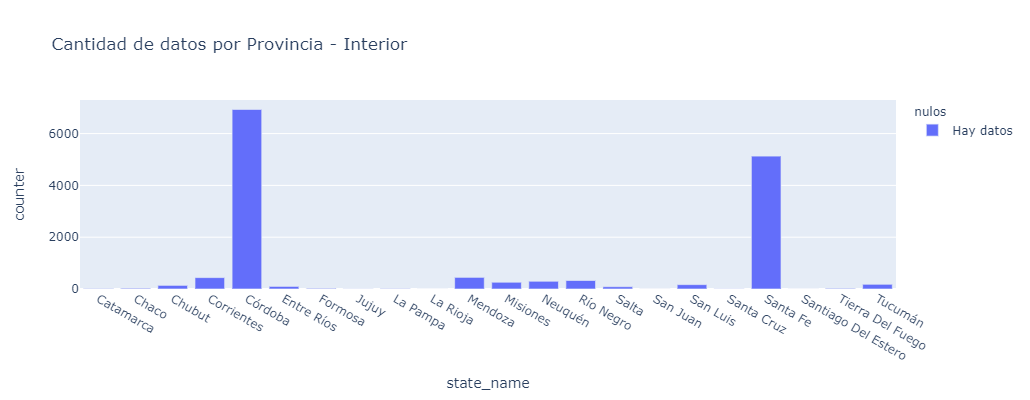

In [181]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
df_3_provincias_grupo = df_3_provincias.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()
df_3_provincias_grupo['nulos'] = df_3_provincias_grupo['nulos'].astype(str)
df_3_provincias_grupo['nulos'] = df_3_provincias_grupo.nulos.str.replace('False','Hay datos')
df_3_provincias_grupo['nulos'] = df_3_provincias_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(df_3_provincias_grupo, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Interior")
fig.show()

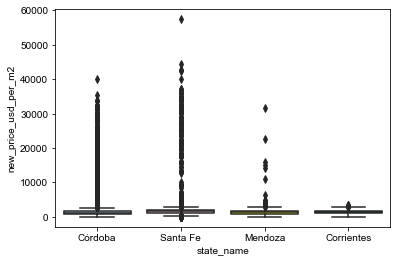

In [182]:
#creamos una lista de las provincias con mayor cantidad de datos
suburb_values = ['Córdoba', 'Santa Fe', 'Mendoza', 'Corrientes', 'Neuquen']
data_suburb_mask = df_3_provincias.state_name.apply(lambda x: x in suburb_values)
data_suburb = df_3_provincias.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("state_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})


# Analisis
Vemos necesario establecer un monto máximo de valor del metro cuadrado para reducir los outliers

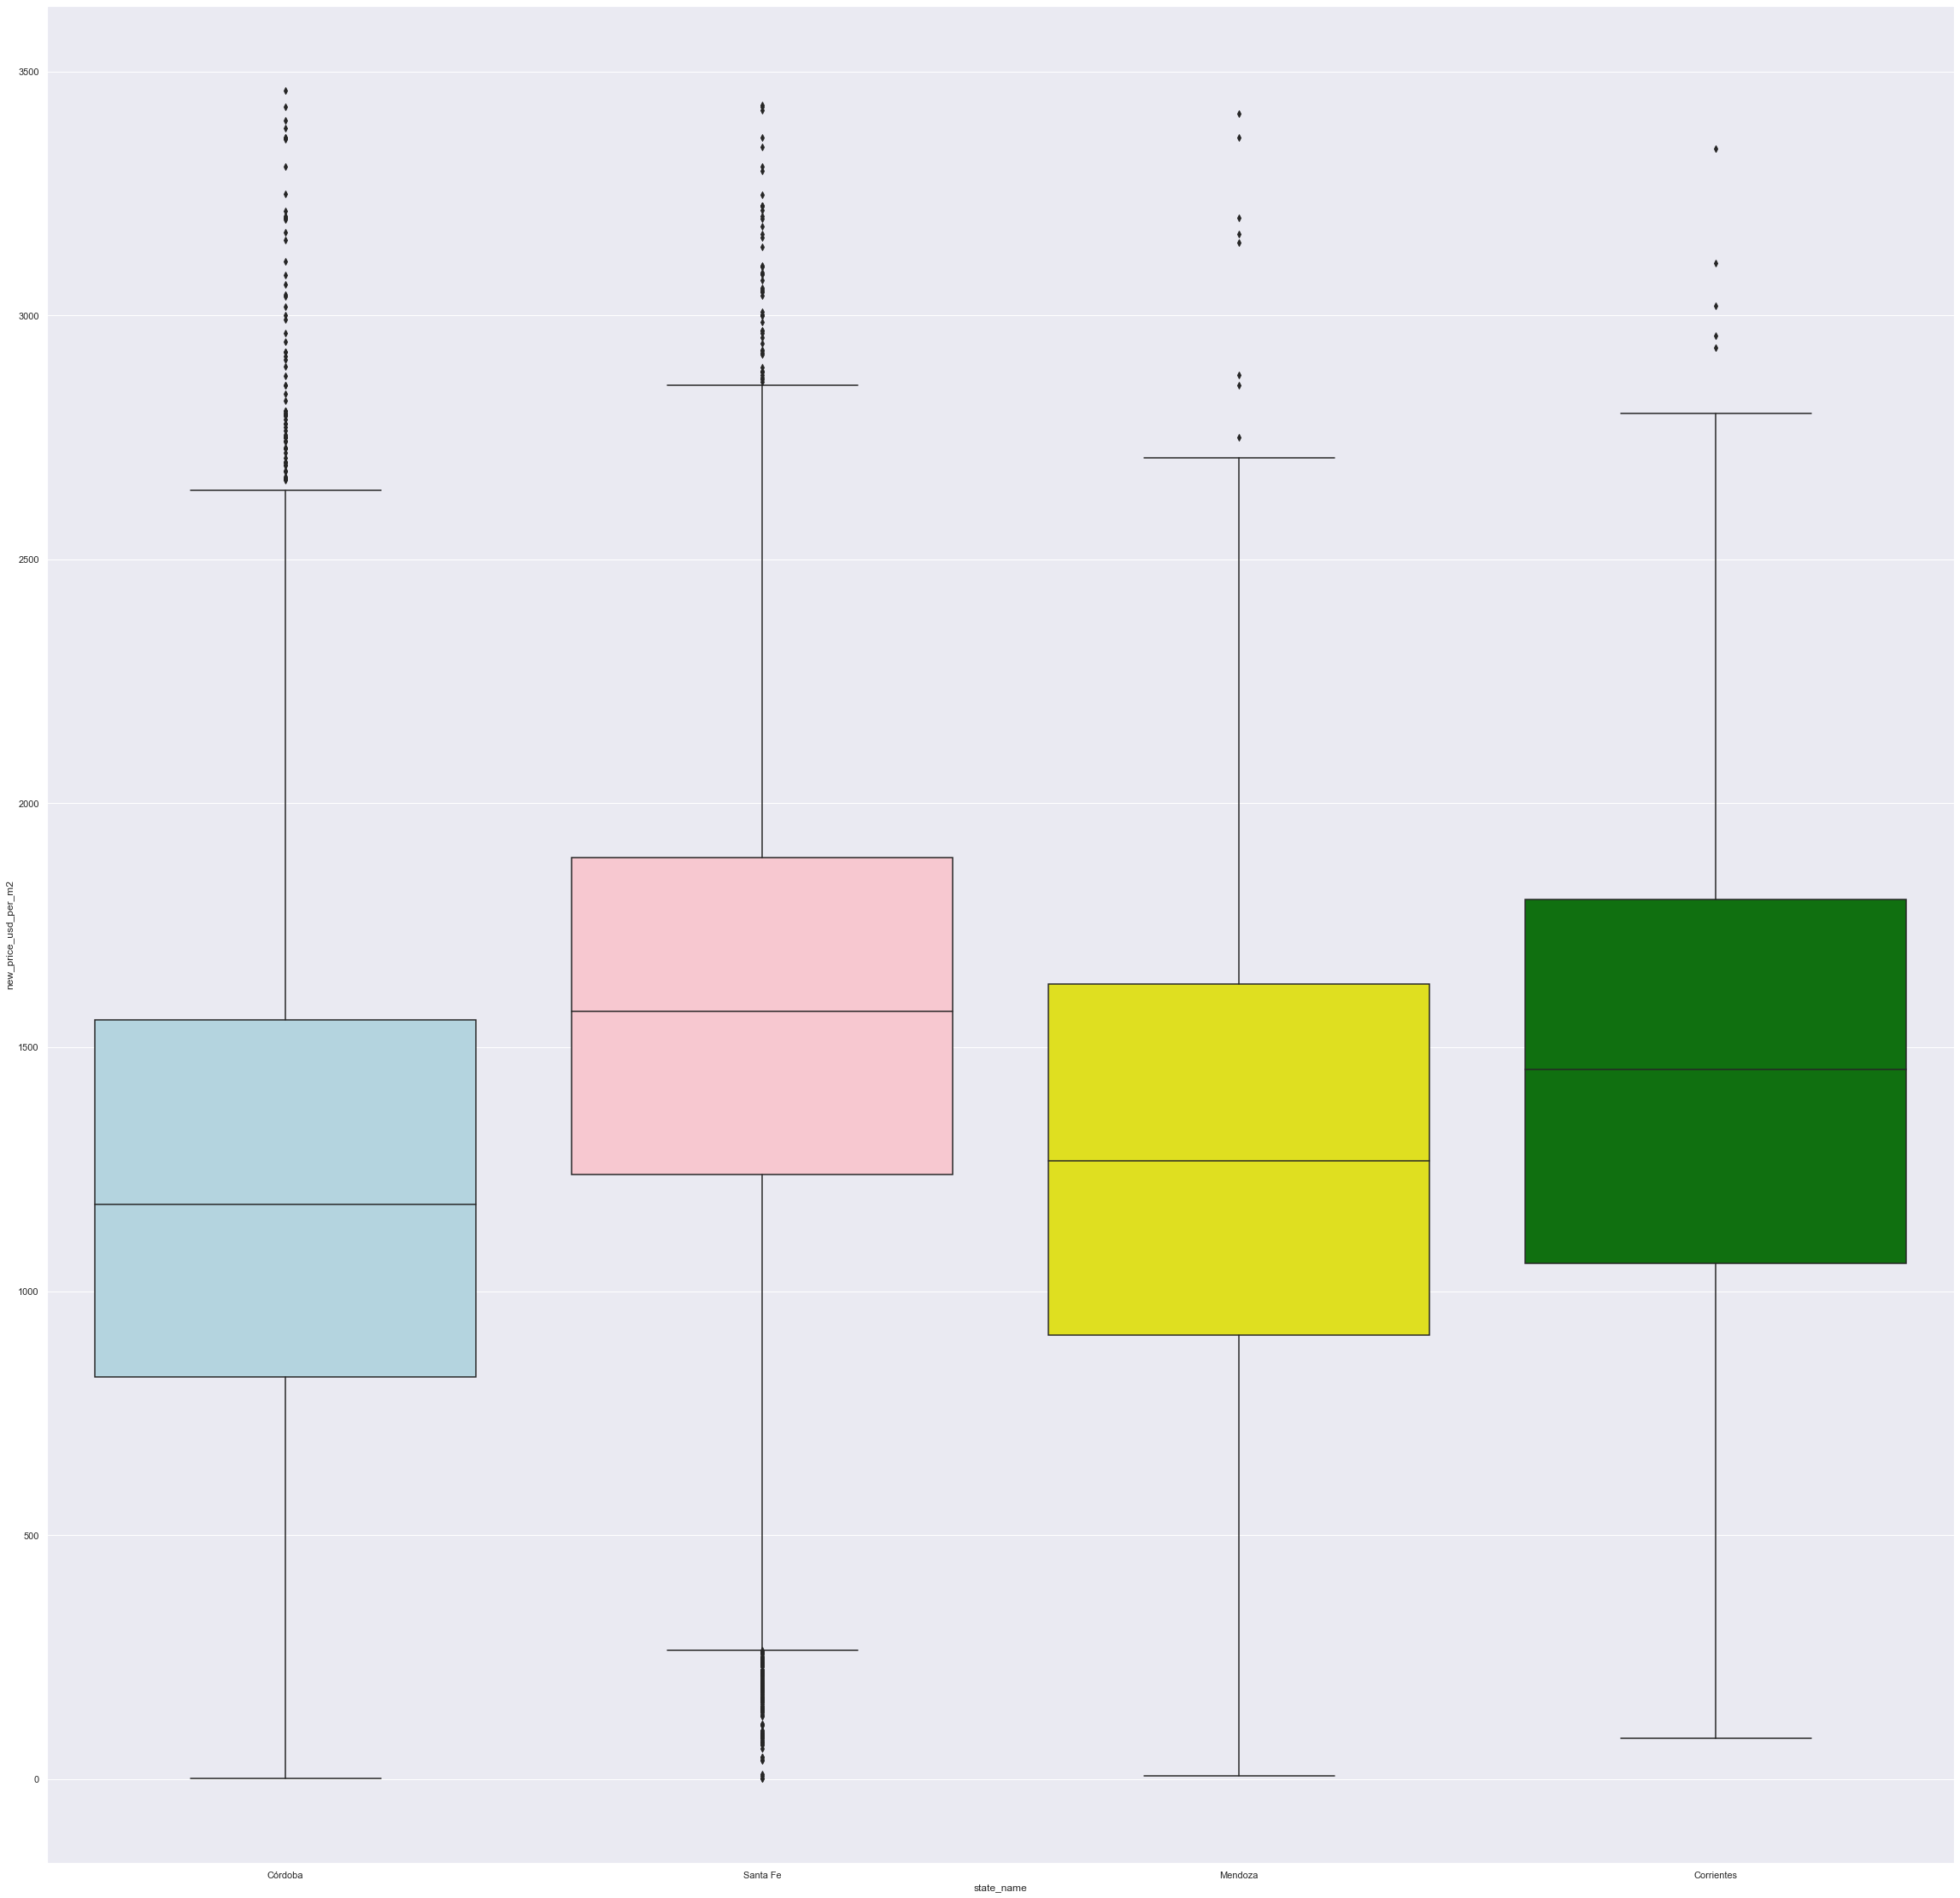

In [183]:
#establecemos que en los menores USD 3500 es donde los datos se encuentran mas concentrados 
df_4_provincias = df_3_provincias[df_3_provincias['new_price_usd_per_m2'] < 3500]
#creamos una lista de las provincias con mayor cantidad de datos
suburb_values = ['Córdoba', 'Santa Fe', 'Mendoza', 'Corrientes', 'Neuquen']
data_suburb_mask = df_4_provincias.state_name.apply(lambda x: x in suburb_values)
data_suburb = df_4_provincias.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("state_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(30,30)})

In [184]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia con tope 3500",df_4_provincias['new_price_usd_per_m2'].describe(),"limpia sin tope",df_3_provincias['new_price_usd_per_m2'].describe(),"original",provincias.price_usd_per_m2.describe())

limpia con tope 3500 count    14024.000000
mean      1332.101646
std        622.779431
min          0.600000
25%        913.550570
50%       1360.976793
75%       1714.285714
max       3471.315789
Name: new_price_usd_per_m2, dtype: float64 limpia sin tope count    14687.000000
mean      1937.026079
std       3554.575536
min          0.600000
25%        937.500000
50%       1399.617500
75%       1780.434127
max      60000.000000
Name: new_price_usd_per_m2, dtype: float64 original count     9621.000000
mean      1680.032501
std       2921.725800
min          0.600000
25%        961.497326
50%       1423.662462
75%       1754.172698
max      57382.080000
Name: price_usd_per_m2, dtype: float64


# conclusion
Es concluyente que la variable limpia con el tope que quita los outliers concentra mejor los datos y reduce el desvio estandar


In [185]:
#Generamos un agrupamiento por provincia, ordenado por la columna creada de precio en dolares por metro2, solamente mostrando las columnas de USD/M2 y superficie
df_4_provincias_group_mean =df_4_provincias.groupby(['state_name']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
df_4_provincias_group_mean

,new_price_usd_per_m2,surface_total_in_m2_clean
state_name,,
Catamarca,1828.596966,378.200000
Neuquén,1654.393914,429.797251
Río Negro,1630.435361,306.007042
Santa Fe,1537.498371,147.406174
Chubut,1529.901307,280.582090
Formosa,1509.648462,42.034483
Corrientes,1452.306899,190.690205
San Juan,1446.245293,211.000000
Mendoza,1298.439549,304.320186


# 2. Buenos Aires y CABA

In [186]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia",df_3_baires['new_price_usd_per_m2'].describe(),"original",baires.price_usd_per_m2.describe())

limpia count     78026.000000
mean       2328.783300
std        3200.469540
min           1.000000
25%        1313.464457
50%        1909.090909
75%        2566.666667
max      224334.704800
Name: new_price_usd_per_m2, dtype: float64 original count     58996.000000
mean       2238.373639
std        2723.896830
min           1.000000
25%        1277.777778
50%        1909.090909
75%        2583.333333
max      206333.333333
Name: price_usd_per_m2, dtype: float64


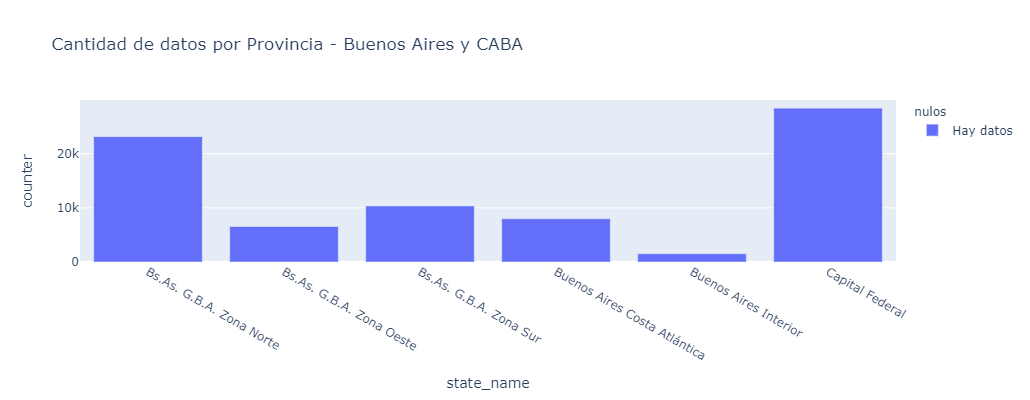

In [187]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
df_3_baires_grupo = df_3_baires.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()
df_3_baires_grupo['nulos'] = df_3_baires_grupo['nulos'].astype(str)
df_3_baires_grupo['nulos'] = df_3_baires_grupo.nulos.str.replace('False','Hay datos')
df_3_baires_grupo['nulos'] = df_3_baires_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(df_3_baires_grupo, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA")
fig.show()

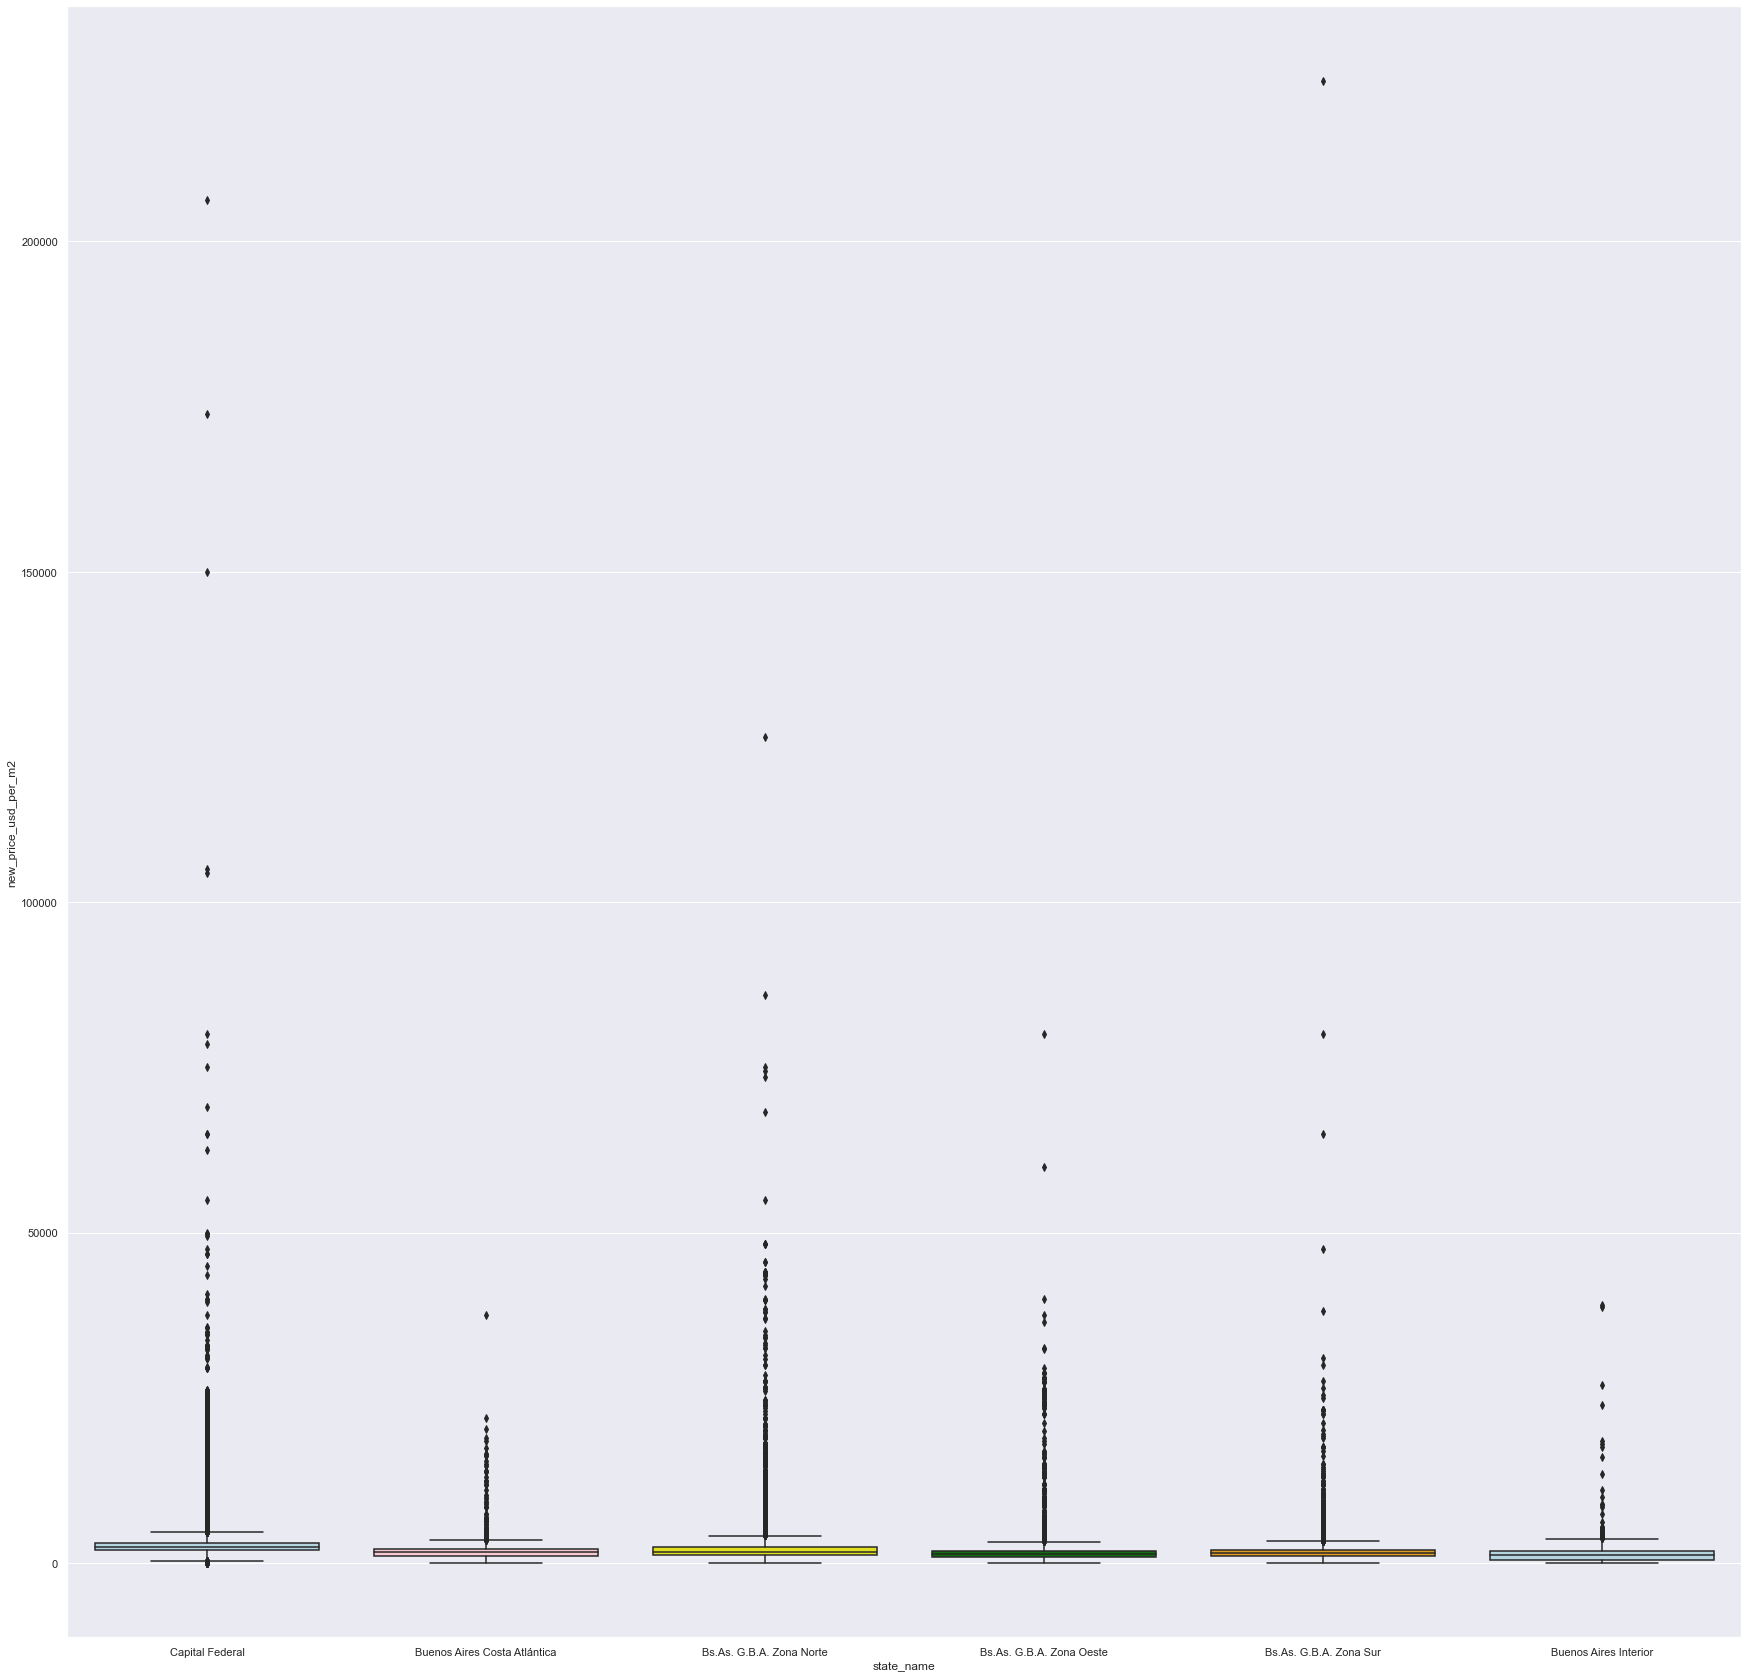

In [188]:
#creamos una lista de las provincias con mayor cantidad de datos
suburb_values = ['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur', 'Buenos Aires Costa Atlántica', 'Buenos Aires Interior','Capital Federal' ]
data_suburb_mask = df_3_baires.state_name.apply(lambda x: x in suburb_values)
data_suburb = df_3_baires.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("state_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})


# Analisis
Vemos necesario establecer un monto máximo de valor del metro cuadrado para reducir los outliers

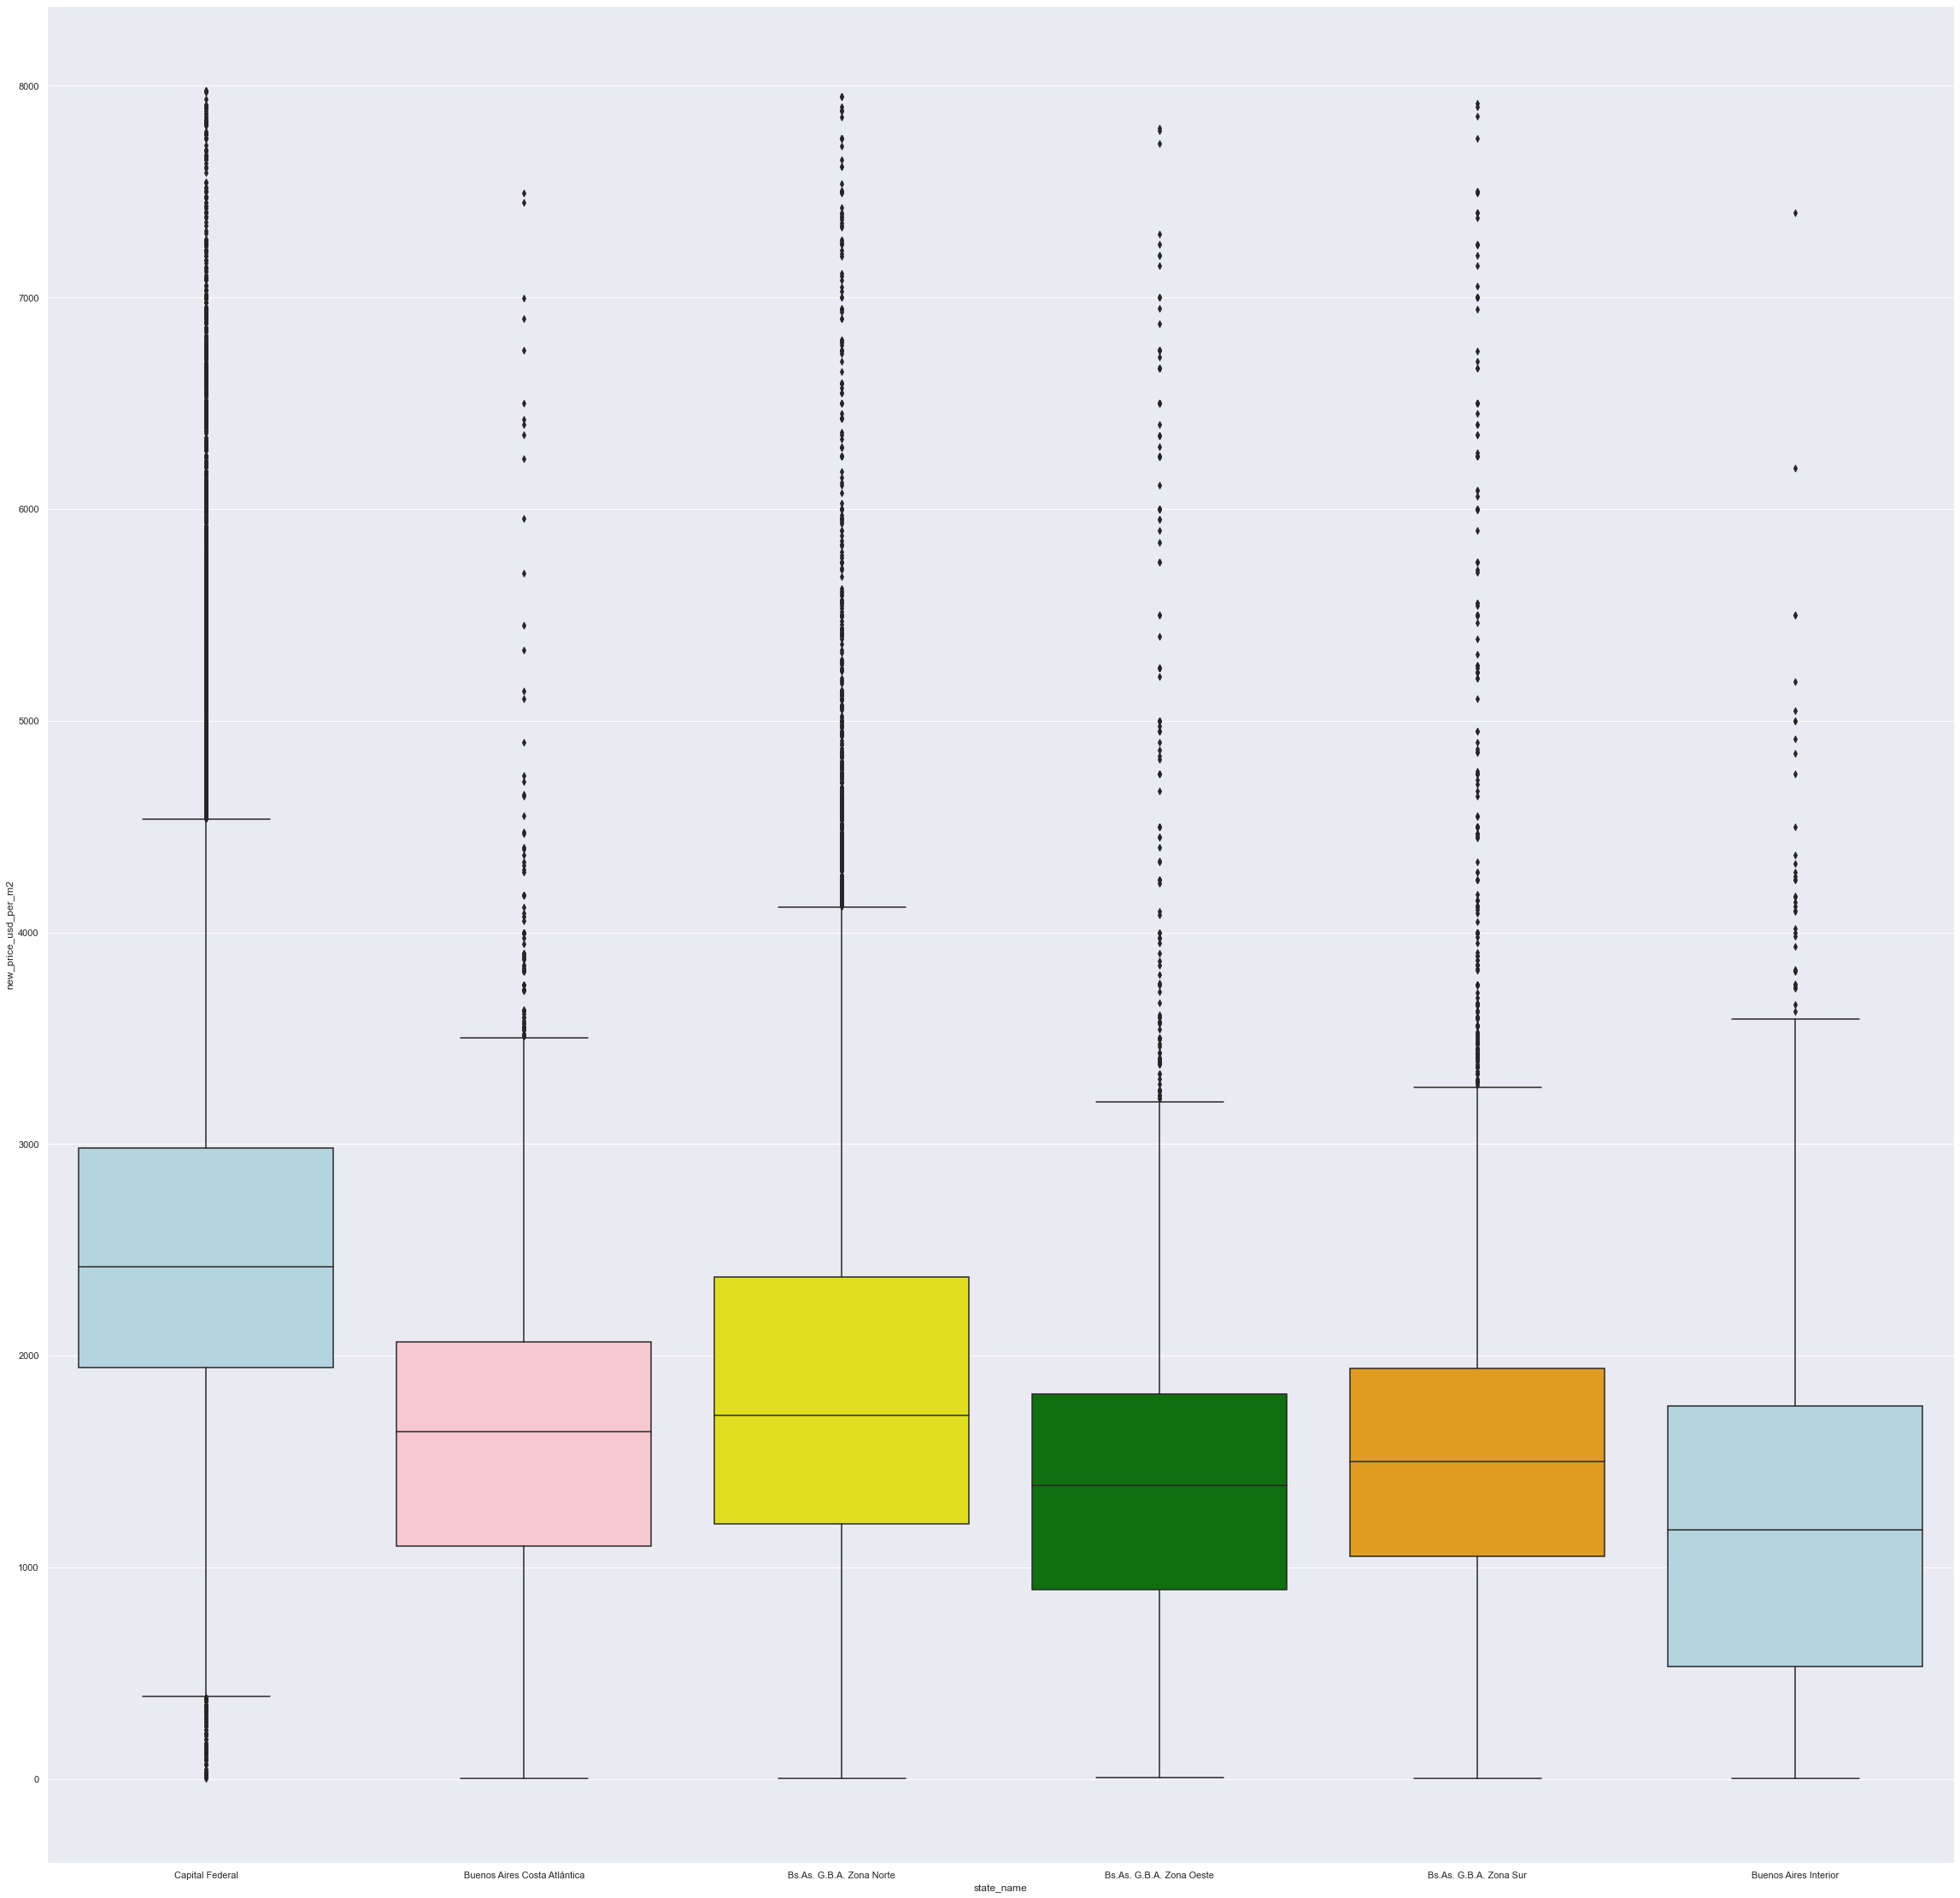

In [189]:
#establecemos que en los menores USD 8000 es donde los datos se encuentran mas concentrados 
df_4_baires = df_3_baires[df_3_baires['new_price_usd_per_m2'] < 8000]
#creamos una lista de las provincias con mayor cantidad de datos
suburb_values = ['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur', 'Buenos Aires Costa Atlántica', 'Buenos Aires Interior','Capital Federal' ]
data_suburb_mask = df_4_baires.state_name.apply(lambda x: x in suburb_values)
data_suburb = df_4_baires.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("state_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [190]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia con tope 8000",df_4_baires['new_price_usd_per_m2'].describe(),"limpia sin tope",df_3_baires['new_price_usd_per_m2'].describe(),"original",baires.price_usd_per_m2.describe())

limpia con tope 8000 count    76501.000000
mean      1998.710920
std       1079.546111
min          1.000000
25%       1300.000000
50%       1888.888889
75%       2513.661202
max       7978.723404
Name: new_price_usd_per_m2, dtype: float64 limpia sin tope count     78026.000000
mean       2328.783300
std        3200.469540
min           1.000000
25%        1313.464457
50%        1909.090909
75%        2566.666667
max      224334.704800
Name: new_price_usd_per_m2, dtype: float64 original count     58996.000000
mean       2238.373639
std        2723.896830
min           1.000000
25%        1277.777778
50%        1909.090909
75%        2583.333333
max      206333.333333
Name: price_usd_per_m2, dtype: float64


# Analisis
Es concluyente que el establecimiento de de valores maximos mejora los indicadores estadisticos, pero es necesario un establecimiento de valores maximos por jurisdicción ya que, a diferencia del interior, en la CABA la media es mas alta que en todo el pais, haciendo que enel resto de buenos aires pudieramos dropear en valores mas bajos.

# 2. A. CABA

In [191]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia",df_3_caba['new_price_usd_per_m2'].describe(),"original",caba.price_usd_per_m2.describe())

limpia count     28416.000000
mean       3146.159073
std        3935.417020
min           3.208556
25%        1964.912281
50%        2454.545455
75%        3062.640766
max      206333.333333
Name: new_price_usd_per_m2, dtype: float64 original count     23434.000000
mean       3116.930444
std        3681.030087
min          13.797467
25%        1966.062830
50%        2468.750000
75%        3076.923077
max      206333.333333
Name: price_usd_per_m2, dtype: float64


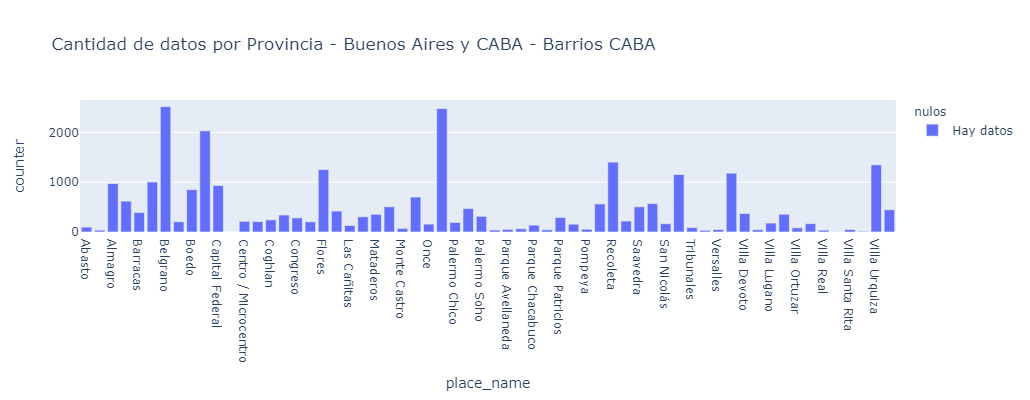

In [192]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
df_3_caba_grupo = df_3_caba.groupby(by=['state_name',"place_name",'nulos'],as_index=False)['counter'].sum()
df_3_caba_grupo['nulos'] = df_3_caba_grupo['nulos'].astype(str)
df_3_caba_grupo['nulos'] = df_3_caba_grupo.nulos.str.replace('False','Hay datos')
df_3_caba_grupo['nulos'] = df_3_caba_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(df_3_caba_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Barrios CABA")
fig.show()

In [193]:
#agrupamos por barrio y mostramos las columnas Precio USD/ m2 y m2
data_3_group_capital_mean =df_3_caba.groupby(['place_name']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
data_3_group_capital_mean

,new_price_usd_per_m2,surface_total_in_m2_clean
place_name,,
Boedo,10276.668722,51.347059
San Cristobal,8591.907611,71.399299
Puerto Madero,6069.922901,144.722913
Palermo Chico,4863.878711,199.251309
Palermo,3606.864138,101.797014
...,...,...
Constitución,1816.503354,76.804878
Mataderos,1700.004990,150.609551
Villa Real,1611.421900,135.405405


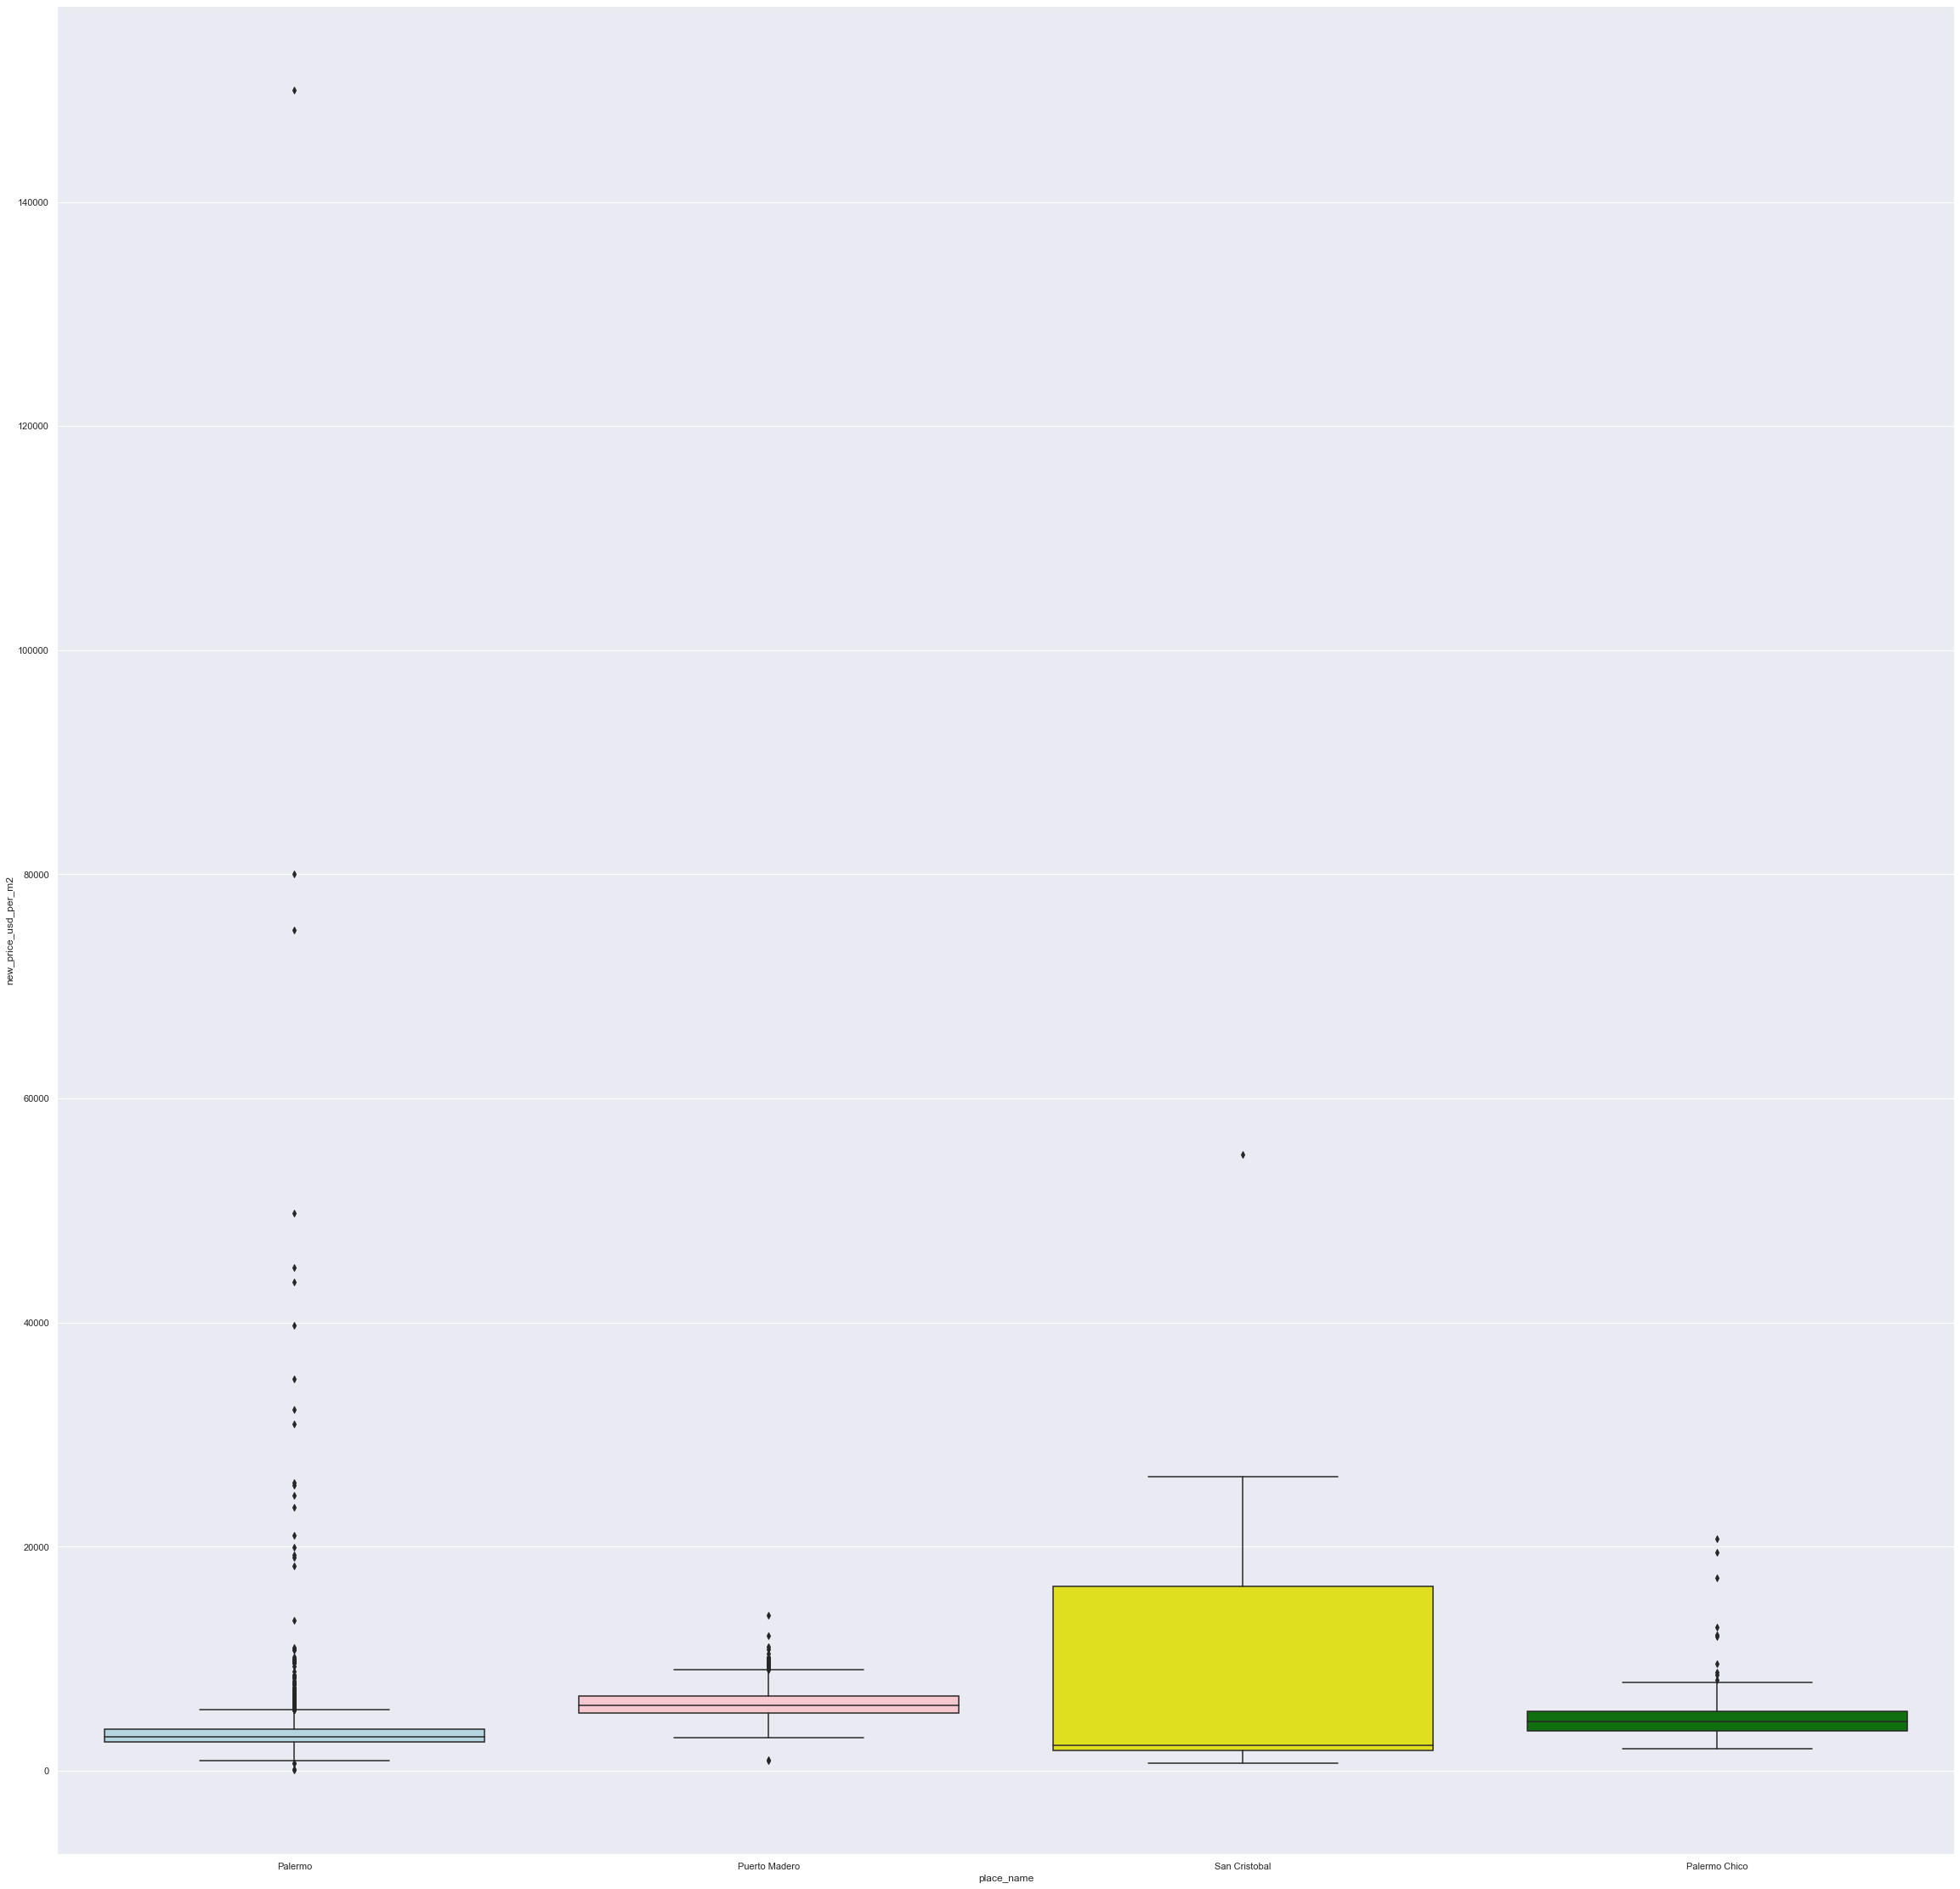

In [194]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['Boedo	', 'San Cristobal', 'Puerto Madero', 'Palermo Chico', 'Palermo']
data_suburb_mask = df_3_caba.place_name.apply(lambda x: x in suburb_values)
data_suburb = df_3_caba.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [195]:
#establecemos que en los menores USD 8500 es donde los datos se encuentran mas concentrados 
df_4_caba = df_3_caba[df_3_caba['new_price_usd_per_m2'] < 8500]
data_4_group_capital_mean =df_4_caba.groupby(['place_name']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
data_4_group_capital_mean

,new_price_usd_per_m2,surface_total_in_m2_clean
place_name,,
Puerto Madero,5764.269298,143.452611
Palermo Chico,4438.475568,196.758242
Las Cañitas,3501.506406,101.740458
Recoleta,3293.253713,124.443804
Palermo,3271.892807,101.672400
...,...,...
Mataderos,1555.639516,152.014205
Parque Avellaneda,1528.486738,110.549020
Pompeya,1352.250011,324.420000


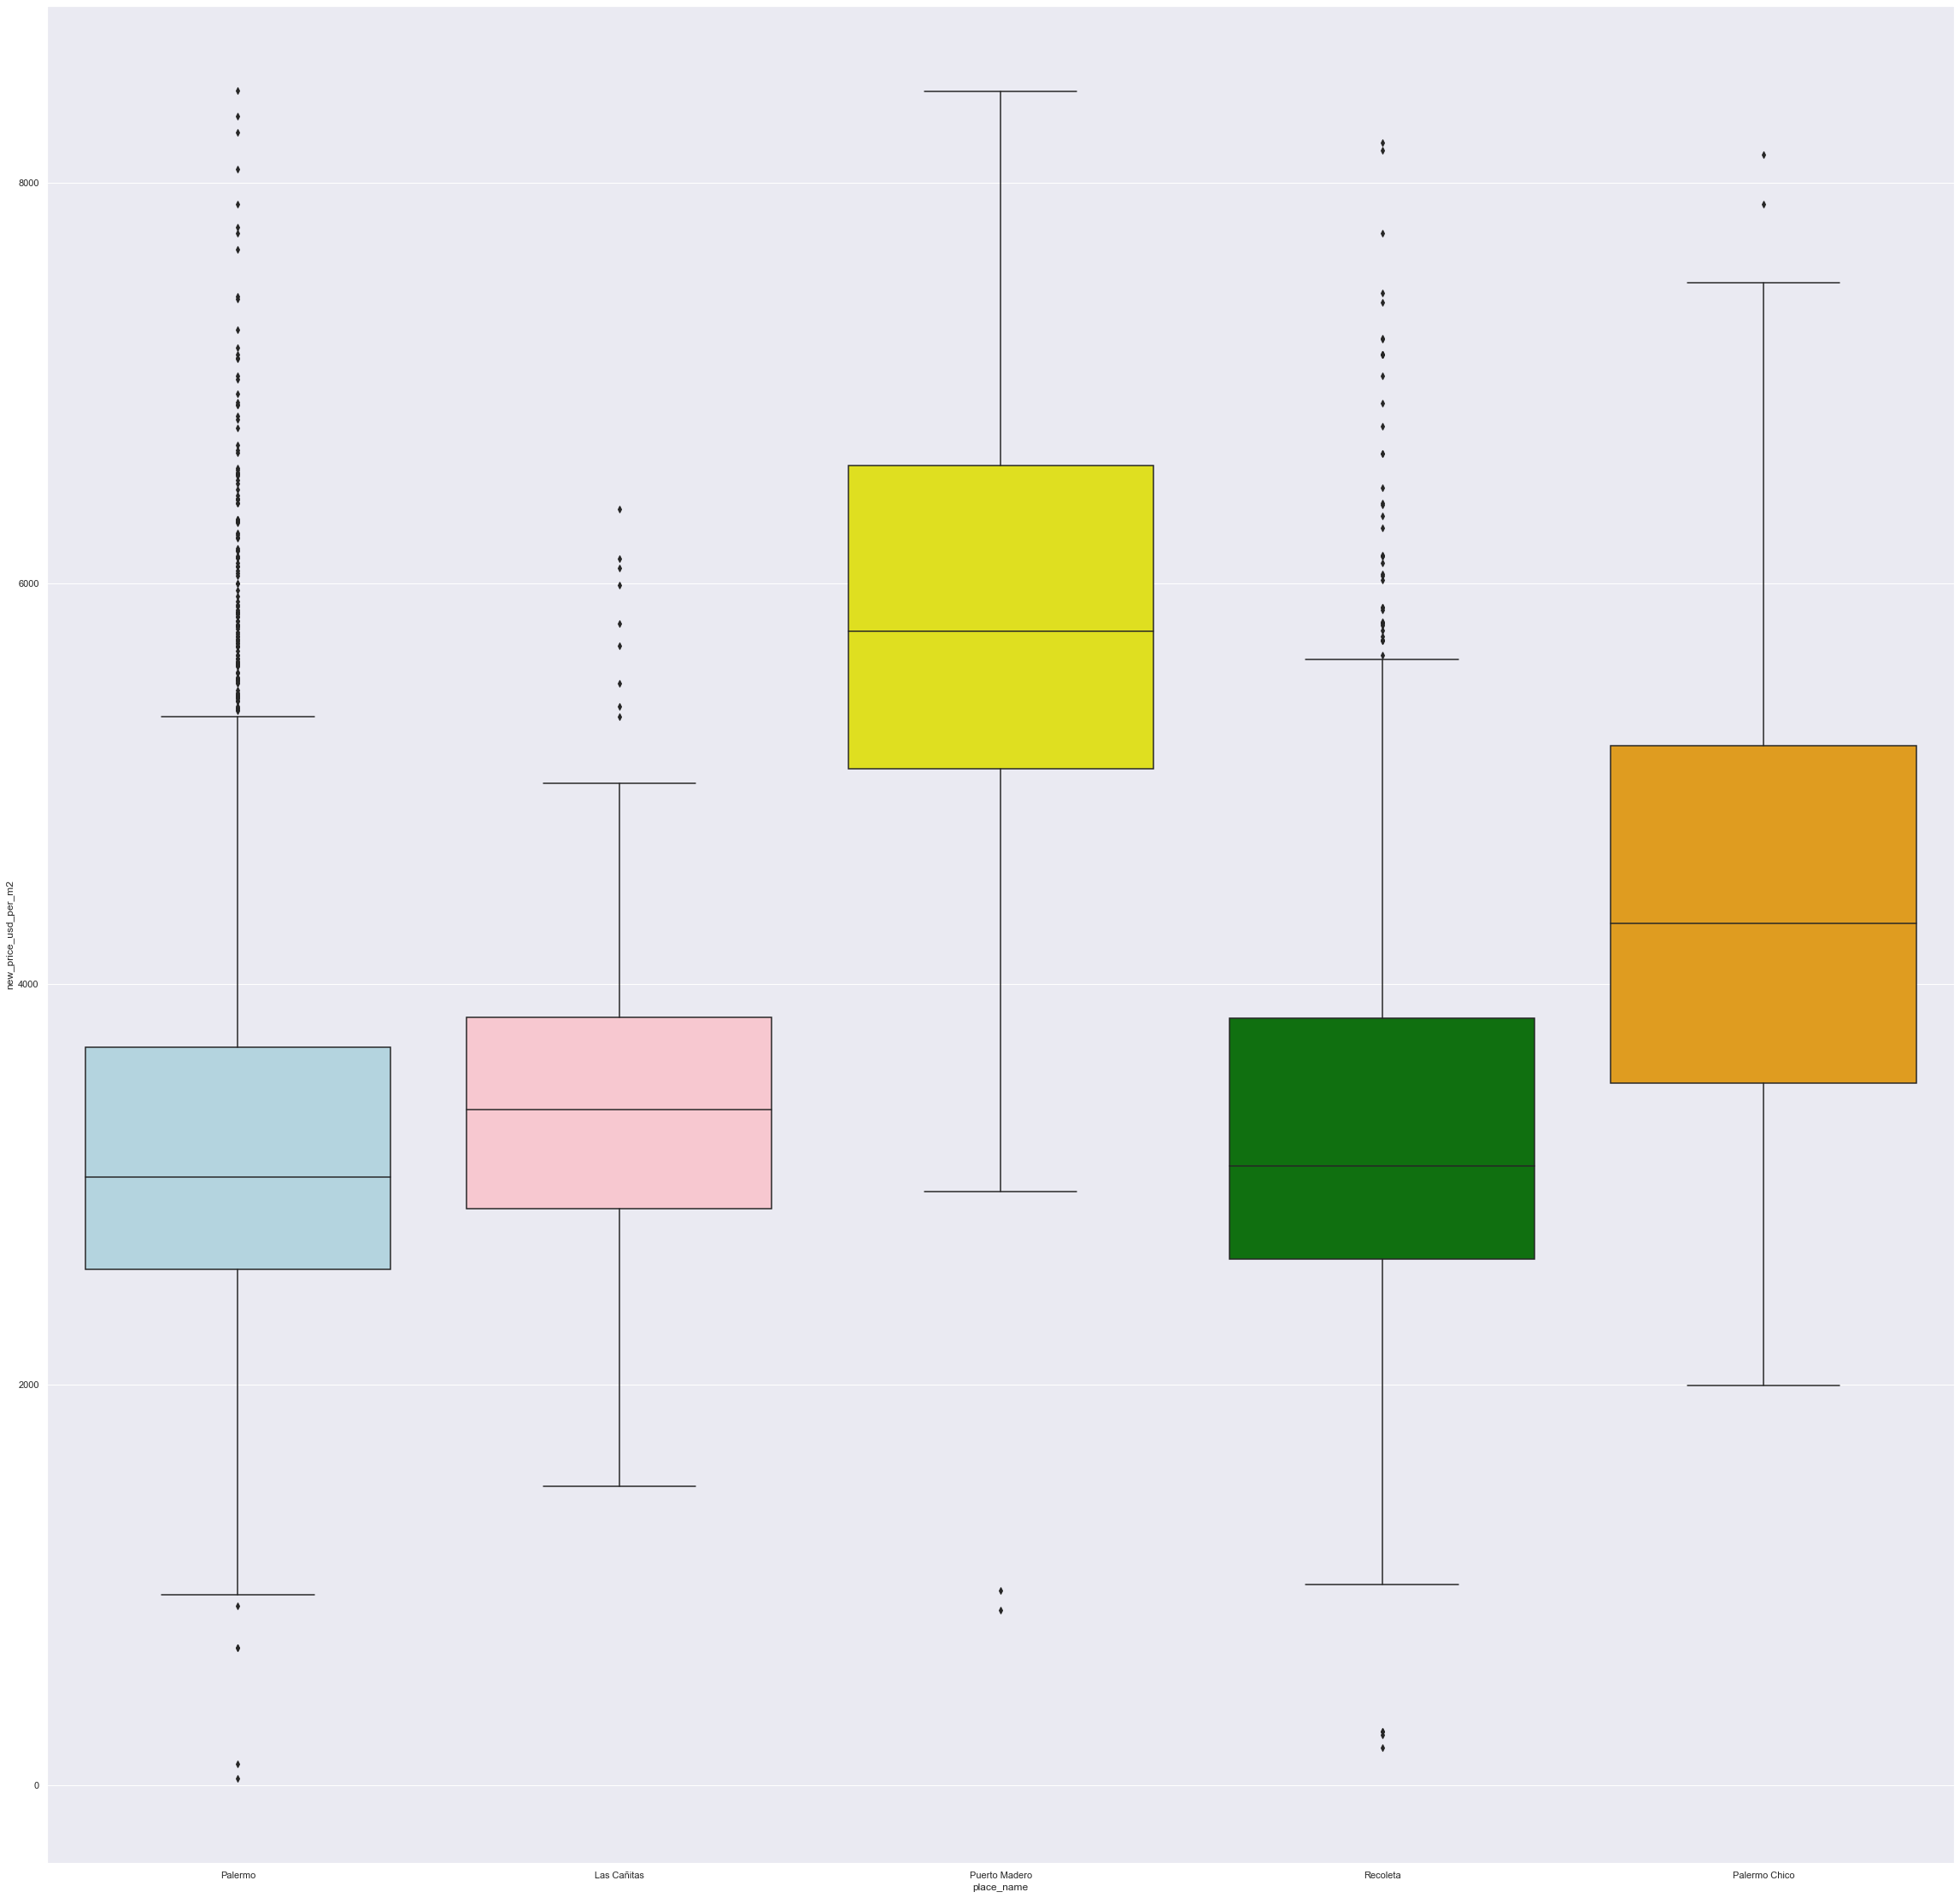

In [196]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['Recoleta', 'Las Cañitas', 'Puerto Madero', 'Palermo Chico', 'Palermo']
data_suburb_mask = df_4_caba.place_name.apply(lambda x: x in suburb_values)
data_suburb = df_4_caba.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [197]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia con tope 8500",df_4_caba['new_price_usd_per_m2'].describe(),"limpia sin tope",df_3_caba['new_price_usd_per_m2'].describe(),"original",caba.price_usd_per_m2.describe())

limpia con tope 8500 count    27470.000000
mean      2590.156067
std       1116.235524
min          3.208556
25%       1944.444444
50%       2422.222222
75%       2983.333333
max       8461.538462
Name: new_price_usd_per_m2, dtype: float64 limpia sin tope count     28416.000000
mean       3146.159073
std        3935.417020
min           3.208556
25%        1964.912281
50%        2454.545455
75%        3062.640766
max      206333.333333
Name: new_price_usd_per_m2, dtype: float64 original count     23434.000000
mean       3116.930444
std        3681.030087
min          13.797467
25%        1966.062830
50%        2468.750000
75%        3076.923077
max      206333.333333
Name: price_usd_per_m2, dtype: float64


# 2. B. Buenos Aires Zona Sur

In [198]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia",df_3_bsas_sur['new_price_usd_per_m2'].describe(),"original",bsas_sur.price_usd_per_m2.describe())

limpia count     10357.000000
mean       1692.489708
std        2876.155879
min           3.204781
25%        1057.142857
50%        1500.000000
75%        1952.054795
max      224334.704800
Name: new_price_usd_per_m2, dtype: float64 original count     6173.000000
mean      1525.356899
std       1119.507894
min         19.314341
25%        996.015936
50%       1492.063492
75%       1939.393939
max      23140.764706
Name: price_usd_per_m2, dtype: float64


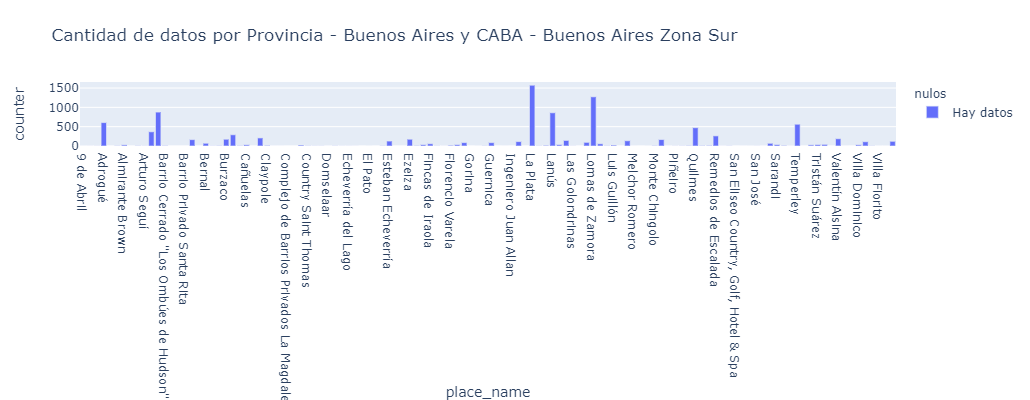

In [199]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
df_3_bsas_sur_grupo = df_3_bsas_sur.groupby(by=['state_name',"place_name",'nulos'],as_index=False)['counter'].sum()
df_3_bsas_sur_grupo['nulos'] = df_3_bsas_sur_grupo['nulos'].astype(str)
df_3_bsas_sur_grupo['nulos'] = df_3_bsas_sur_grupo.nulos.str.replace('False','Hay datos')
df_3_bsas_sur_grupo['nulos'] = df_3_bsas_sur_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(df_3_bsas_sur_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Buenos Aires Zona Sur")
fig.show()

In [200]:
#detectamos que la ciudad de la plata esta siendo subdividida en barrios y no puede ser alcanzada correctamente
#Creamos una nueva columna de limpieza de ciudades
df_3['place_name_clean'] = df_3['place_name']

#reemplazamos cada barrio/ciudad dentro de lp 

lp_abasto_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Abasto|"
df_3.loc[lp_abasto_mask, "place_name_clean"] = "La Plata Abasto"

lp_arturosegui_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Arturo Seguí|"
df_3.loc[lp_arturosegui_mask, "place_name_clean"] = "La Plata Arturo Seguí"
#
lp_citybell_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|City Bell|"
df_3.loc[lp_citybell_mask, "place_name_clean"] = "La Plata Arturo City Bell"

lp_etcheve_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Etcheverry|"
df_3.loc[lp_etcheve_mask, "place_name_clean"] = "La Plata Etcheverry"

lp_gorina_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Gorina|"
df_3.loc[lp_gorina_mask, "place_name_clean"] = "La Plata Gorina"

lp_grandbell_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Grand Bell|"
df_3.loc[lp_grandbell_mask, "place_name_clean"] = "La Plata Grand Bell"

lp_haras1_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Haras del Sur I|"
df_3.loc[lp_haras1_mask, "place_name_clean"] = "La Plata Haras del Sur I"

#
lp_jhernandez_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|José Hernández|"
df_3.loc[lp_jhernandez_mask, "place_name_clean"] = "La Plata José Hernández"

lp_lolmos_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Lisandro Olmos|"
df_3.loc[lp_lolmos_mask, "place_name_clean"] = "La Plata Lisandro Olmos"

lp_hornos_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Los Hornos|"
df_3.loc[lp_hornos_mask, "place_name_clean"] = "La Plata Los Hornos"

lp_gonnet_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Manuel B Gonnet|"
df_3.loc[lp_gonnet_mask, "place_name_clean"] = "La Plata Manuel B Gonnet"

lp_mromero_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Melchor Romero|"
df_3.loc[lp_mromero_mask, "place_name_clean"] = "La Plata Melchor Romero"

lp_ringuelet_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Ringuelet|"
df_3.loc[lp_ringuelet_mask, "place_name_clean"] = "La Plata Ringuelet"

lp_scarlos_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|San Carlos|"
df_3.loc[lp_scarlos_mask, "place_name_clean"] = "La Plata San Carlos"
#
lp_slorenzo_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|San Lorenzo|"
df_3.loc[lp_slorenzo_mask, "place_name_clean"] = "La Plata San Lorenzo"

lp_tolosa_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Tolosa|"
df_3.loc[lp_tolosa_mask, "place_name_clean"] = "La Plata Tolosa"

lp_velisa_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Villa Elisa|"
df_3.loc[lp_velisa_mask, "place_name_clean"] = "La Plata Villa Elisa"

lp_velvira_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Villa Elvira|"
df_3.loc[lp_velvira_mask, "place_name_clean"] = "La Plata Villa Elvira"

#printeamos una prueba
mask_dataclean = df_3['place_name_clean'].astype('str')
prueba_lp = df_3['place_name'] == "Villa Elvira"
df_3[prueba_lp].head(3)

#Generamos nuevamente el query de limpios
df_3_bsas_sur_clean = df_3.query(' state_name == "Bs.As. G.B.A. Zona Sur"')

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [201]:
#agrupamos por barrio y mostramos las columnas Precio USD/ m2 y m2
data_3_group_bsas_sur_clean_mean =df_3_bsas_sur_clean.groupby(['place_name_clean']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
data_3_group_bsas_sur_clean_mean

,new_price_usd_per_m2,surface_total_in_m2_clean
place_name_clean,,
San Francisco Solano,9663.333333,160.000000
Don Bosco,9227.409330,109.125000
Guillermo Hudson,4722.222222,18.000000
Llavallol,3574.616641,245.600000
Sarandi,3323.893253,110.410256
...,...,...
La Plata Etcheverry,212.500000,400.000000
Country Golf El Sosiego,205.128205,390.000000
Complejo de Barrios Privados La Magdalena,195.000000,1000.000000


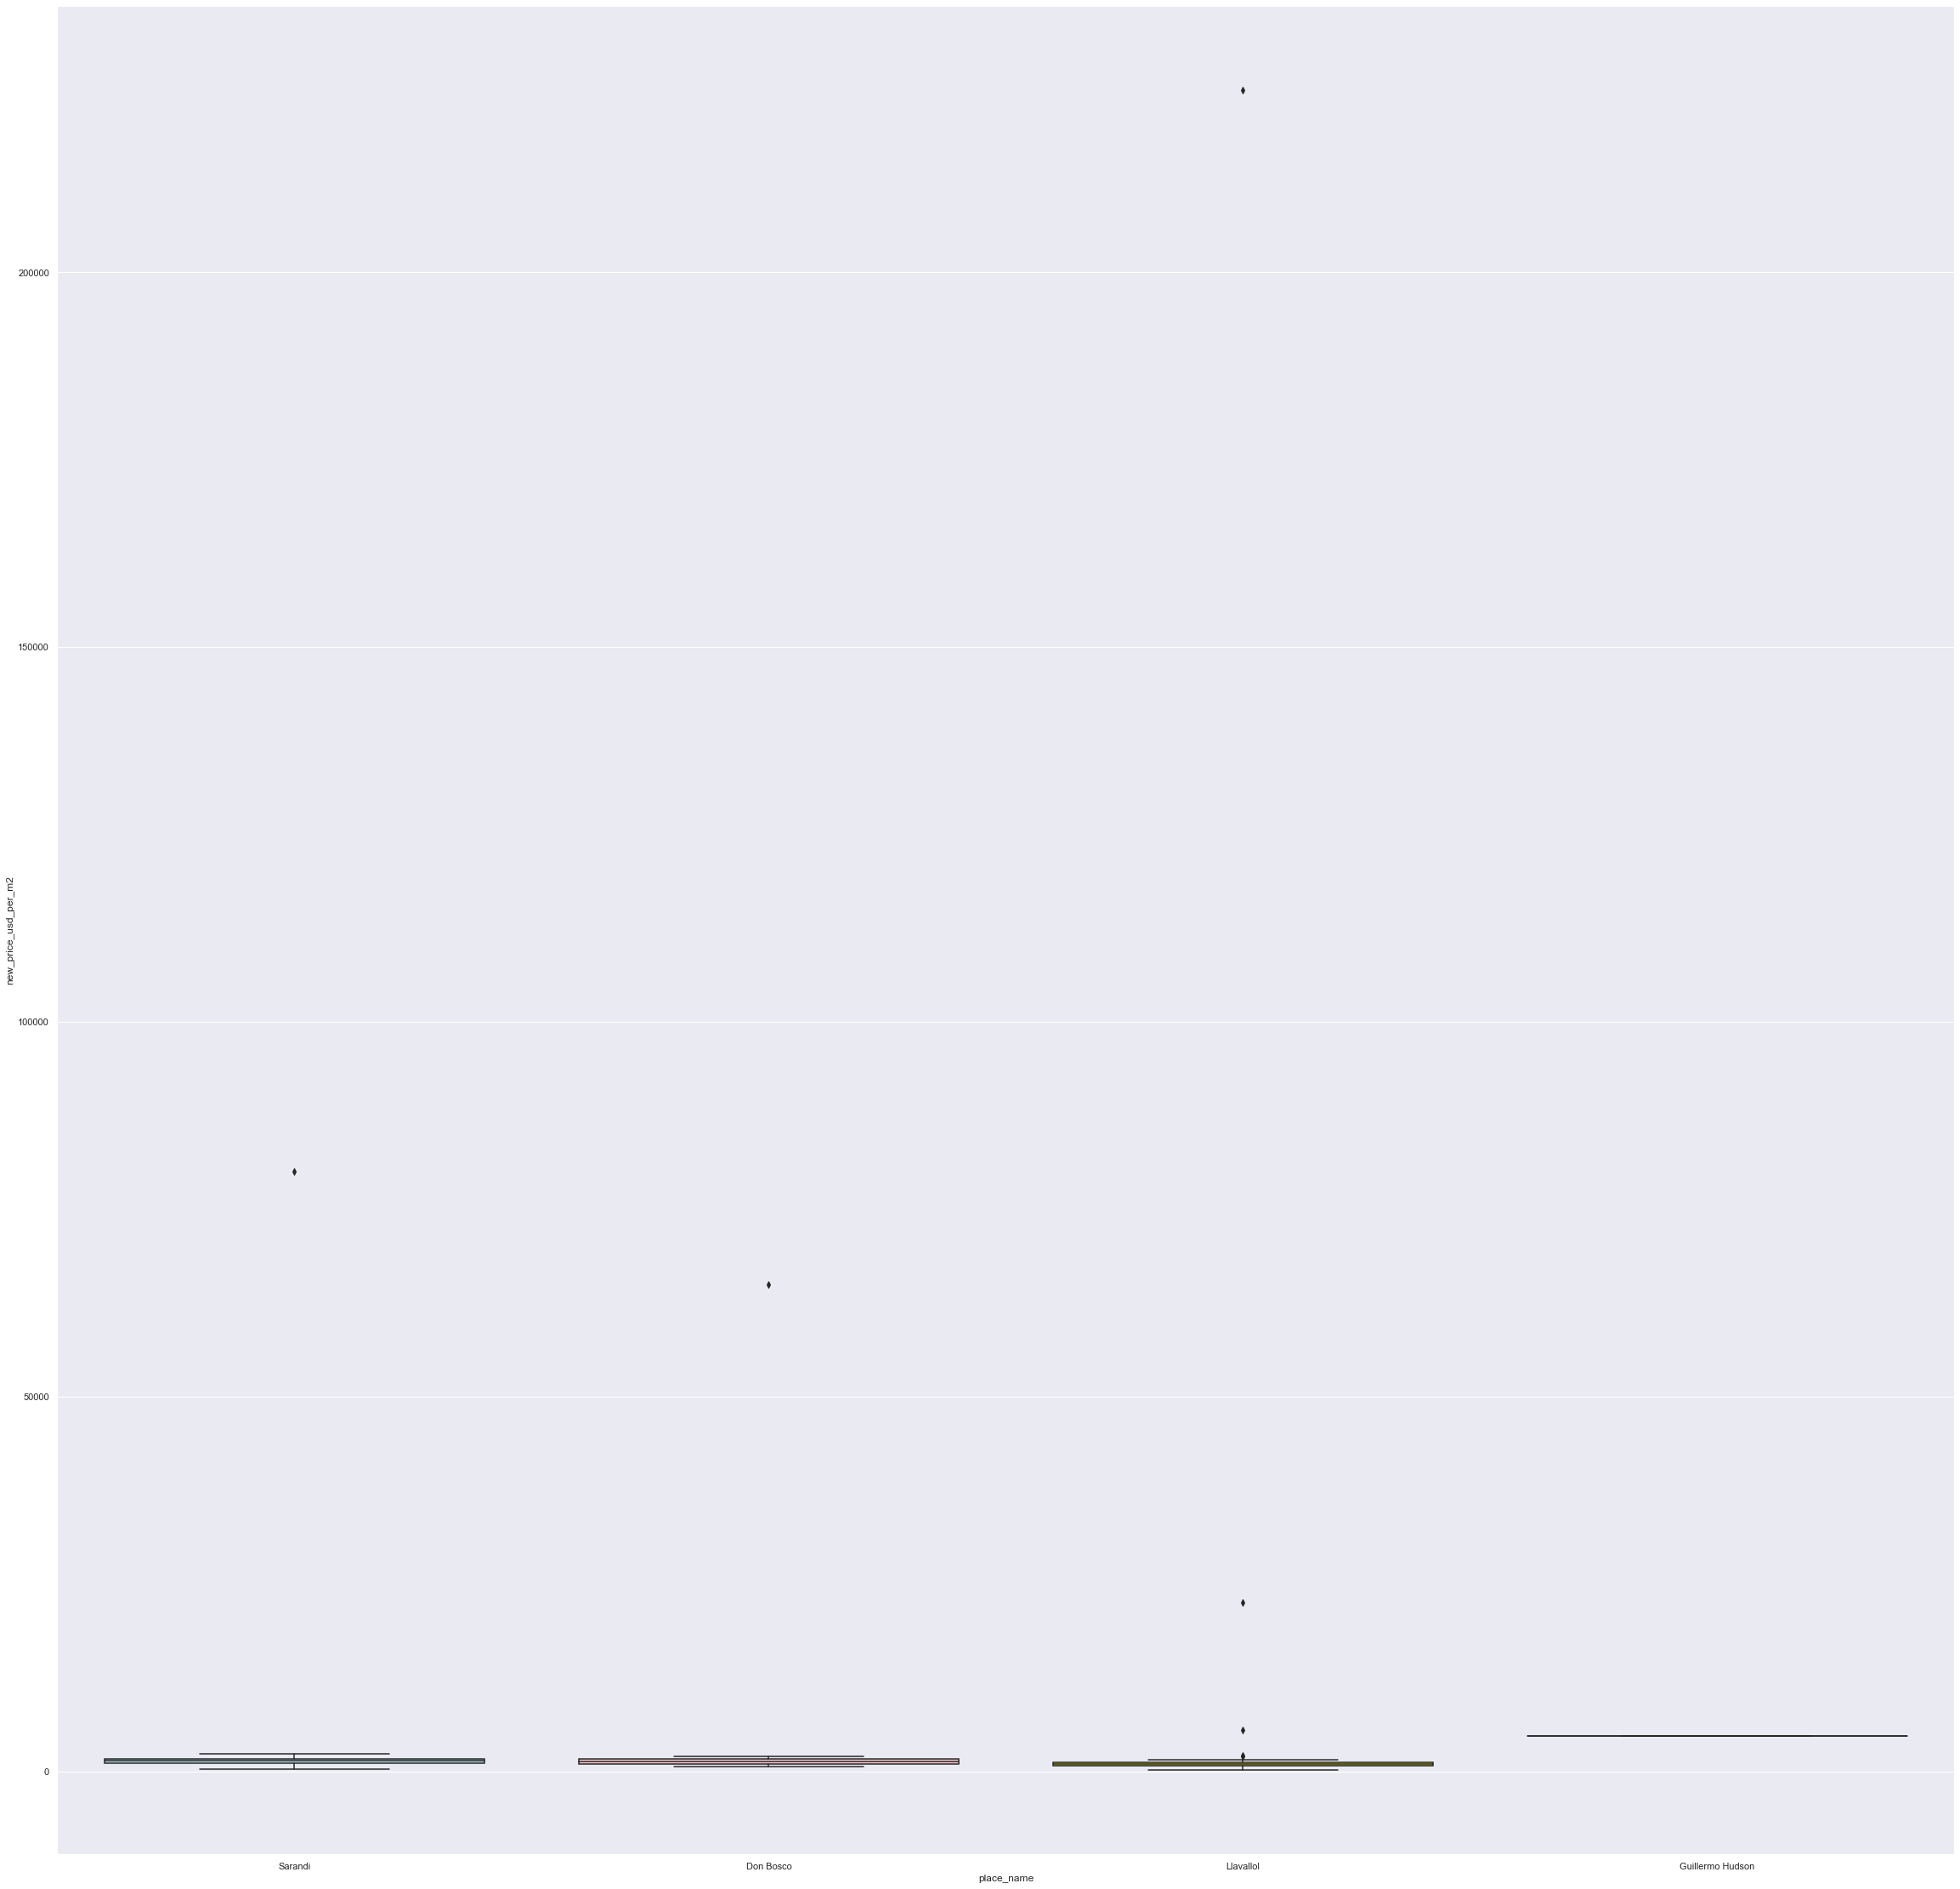

In [202]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['San Francisco Solano	', 'Don Bosco', 'Guillermo Hudson', 'Llavallol', 'Sarandi']
data_suburb_mask = df_3_bsas_sur_clean.place_name.apply(lambda x: x in suburb_values)
data_suburb = df_3_bsas_sur_clean.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [203]:
#establecemos que en los menores USD 4500 es donde los datos se encuentran mas concentrados 
df_4_bsas_sur = df_3_bsas_sur_clean[df_3_bsas_sur_clean['new_price_usd_per_m2'] < 4500]
df_4_bsas_sur_group_mean =df_4_bsas_sur.groupby(['place_name_clean']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
df_4_bsas_sur_group_mean

,new_price_usd_per_m2,surface_total_in_m2_clean
place_name_clean,,
Country Nuevo Quilmes,2478.292105,194.615385
Uribelarrea,2131.147541,61.000000
GreenVille Polo & Resort,2027.358266,193.250000
Fincas de Hudson,1996.175624,165.558824
Fincas de Iraola II,1938.997193,231.375000
...,...,...
La Plata Etcheverry,212.500000,400.000000
Country Golf El Sosiego,205.128205,390.000000
Complejo de Barrios Privados La Magdalena,195.000000,1000.000000


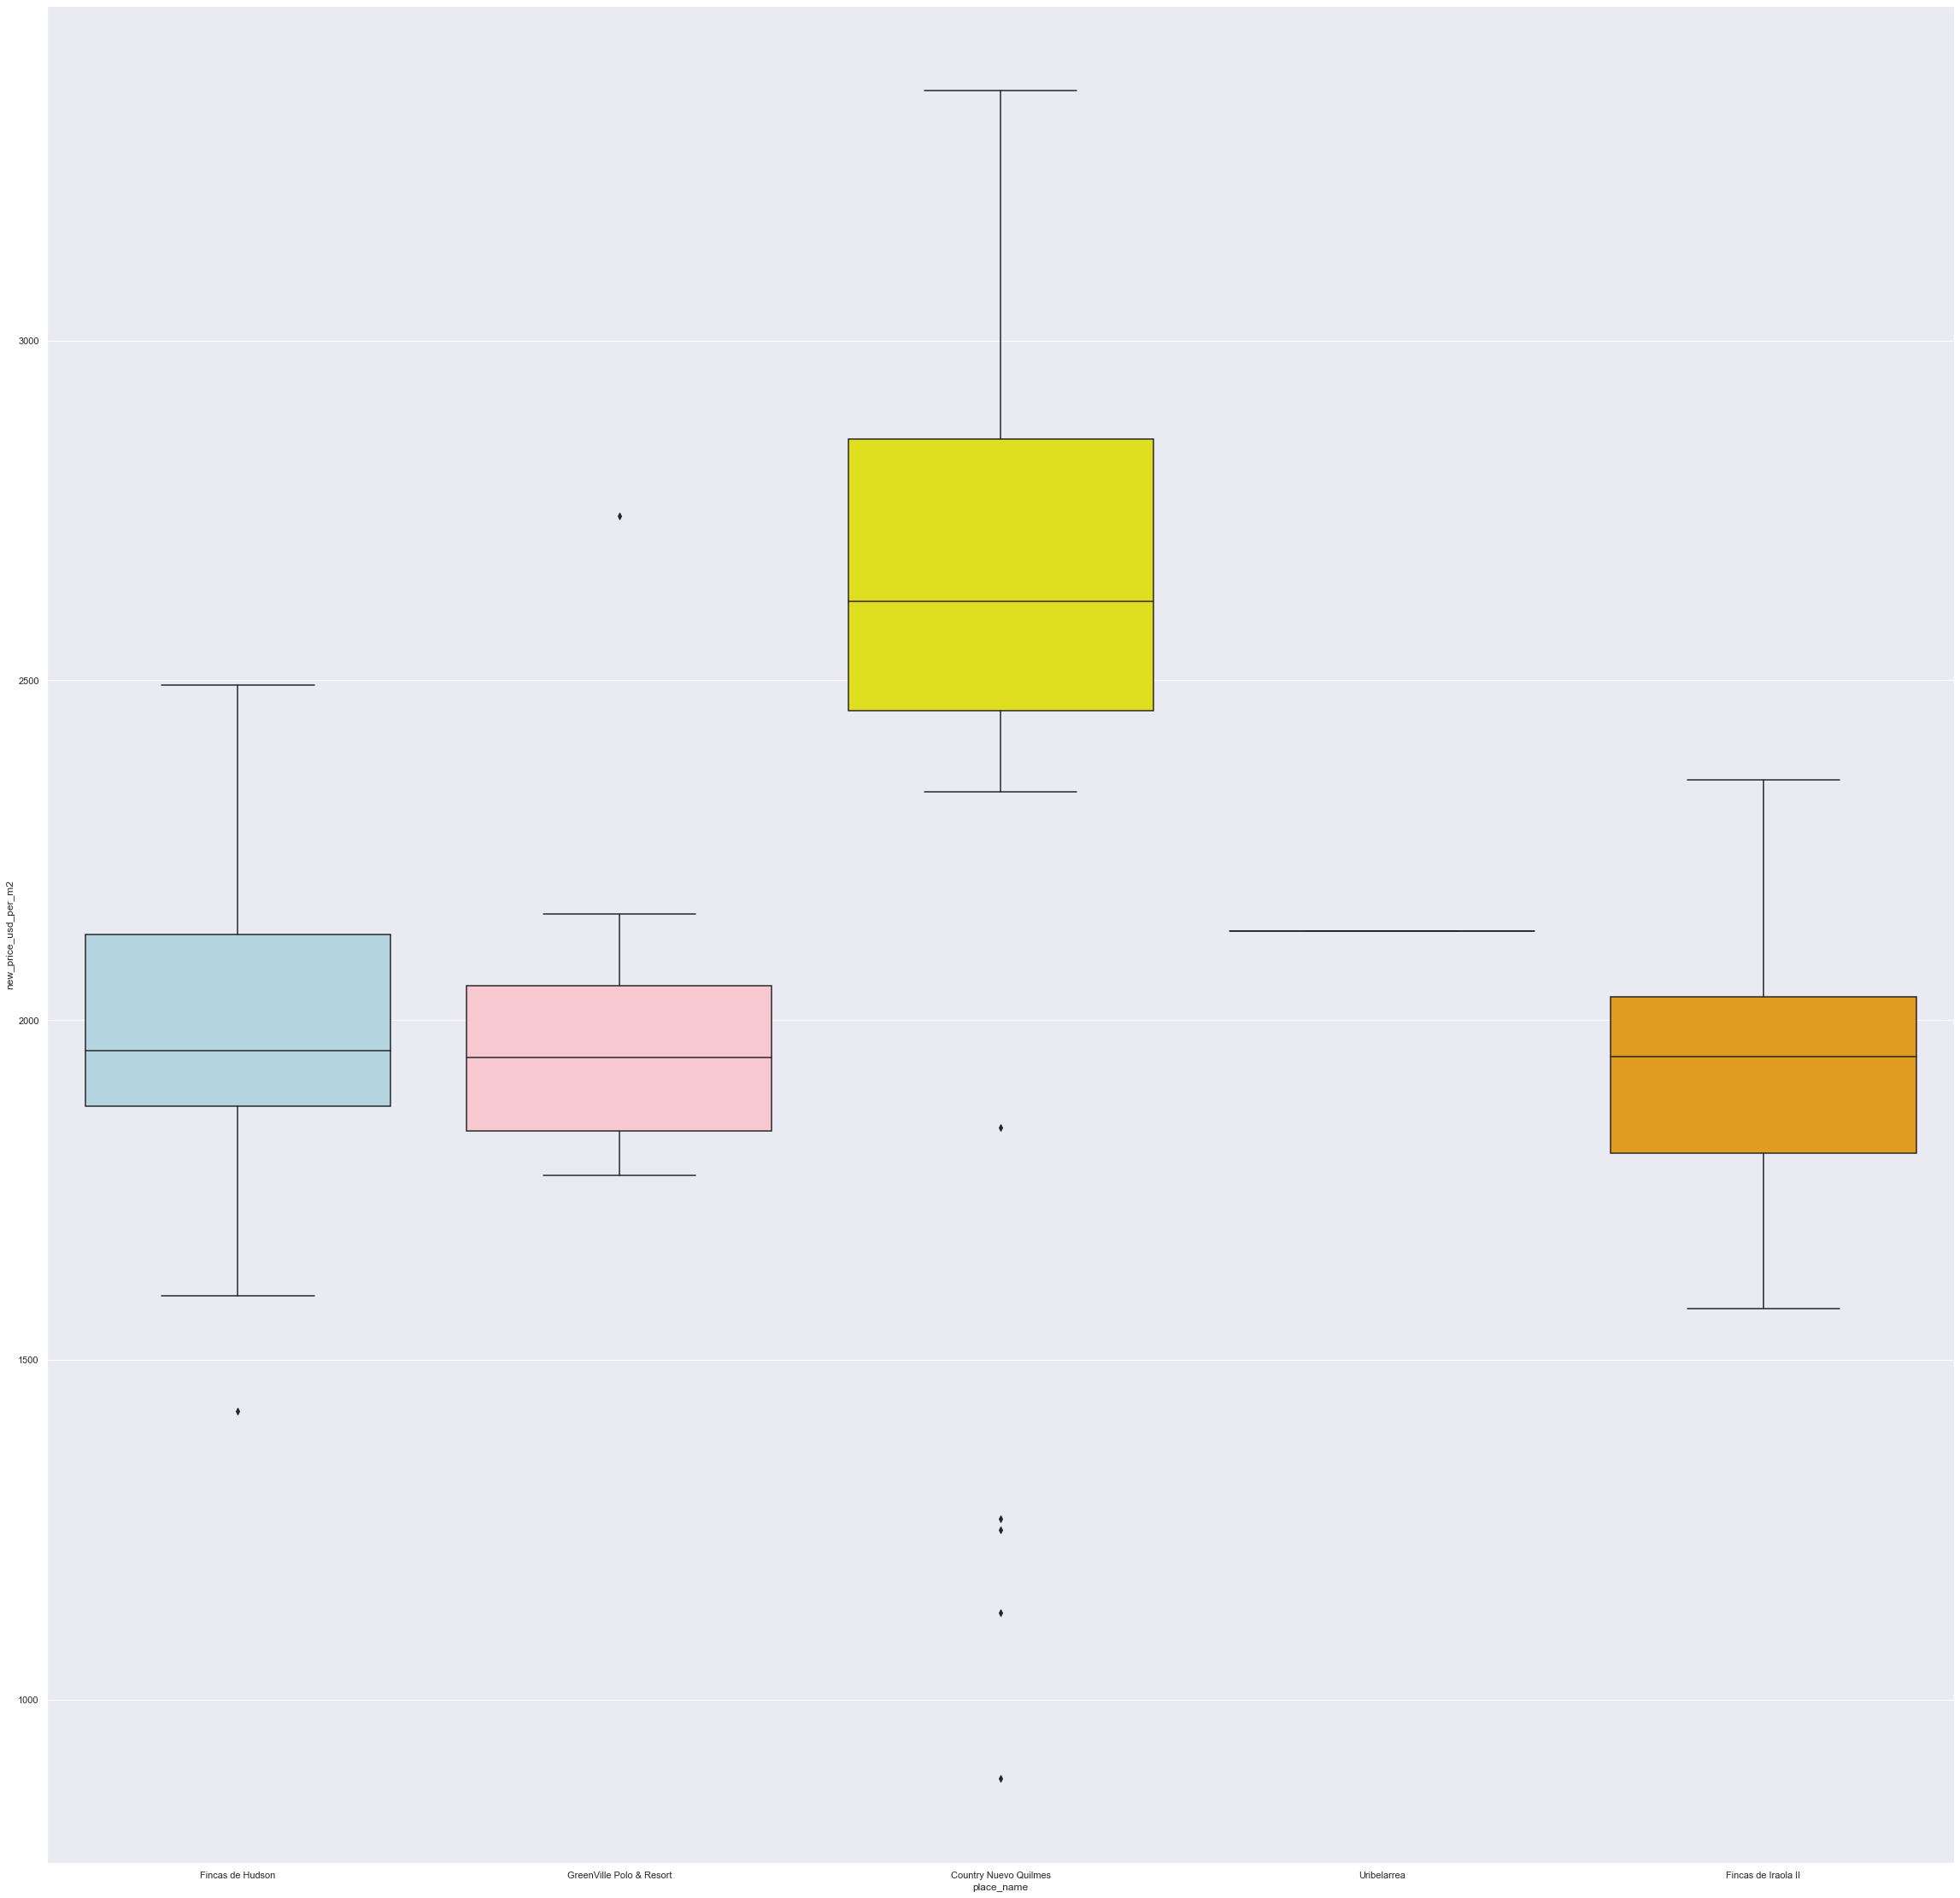

In [204]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['Country Nuevo Quilmes', 'Uribelarrea', 'GreenVille Polo & Resort', 'Fincas de Hudson', 'Fincas de Iraola II']
data_suburb_mask = df_4_bsas_sur.place_name_clean.apply(lambda x: x in suburb_values)
data_suburb = df_4_bsas_sur.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [205]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia con tope 4500",df_4_bsas_sur['new_price_usd_per_m2'].describe(),"limpia sin tope",df_3_bsas_sur['new_price_usd_per_m2'].describe(),"original",bsas_sur.price_usd_per_m2.describe())

limpia con tope 4500 count    10160.000000
mean      1501.371188
std        661.571810
min          3.204781
25%       1045.454545
50%       1484.375000
75%       1923.076923
max       4466.666667
Name: new_price_usd_per_m2, dtype: float64 limpia sin tope count     10357.000000
mean       1692.489708
std        2876.155879
min           3.204781
25%        1057.142857
50%        1500.000000
75%        1952.054795
max      224334.704800
Name: new_price_usd_per_m2, dtype: float64 original count     6173.000000
mean      1525.356899
std       1119.507894
min         19.314341
25%        996.015936
50%       1492.063492
75%       1939.393939
max      23140.764706
Name: price_usd_per_m2, dtype: float64


# 2. C. Buenos Aires Zona Norte

In [206]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia",df_3_bsas_norte['new_price_usd_per_m2'].describe(),"original",bsas_norte.price_usd_per_m2.describe())

limpia count     23153.000000
mean       2051.174684
std        2645.743544
min           4.166667
25%        1211.340206
50%        1731.418919
75%        2400.000000
max      125000.000000
Name: new_price_usd_per_m2, dtype: float64 original count    17405.000000
mean      1860.779924
std       1894.265775
min          4.166667
25%       1122.778675
50%       1666.666667
75%       2329.411765
max      48296.222222
Name: price_usd_per_m2, dtype: float64


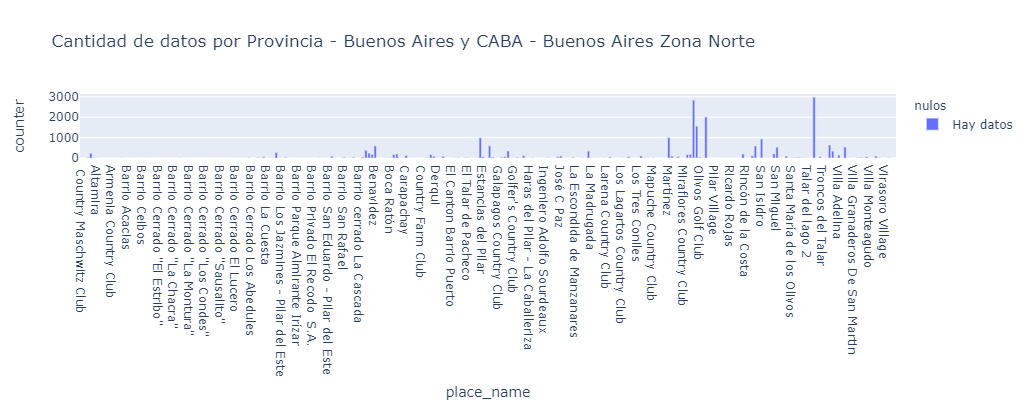

In [207]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
df_3_bsas_norte_grupo = df_3_bsas_norte.groupby(by=['state_name',"place_name",'nulos'],as_index=False)['counter'].sum()
df_3_bsas_norte_grupo['nulos'] = df_3_bsas_norte_grupo['nulos'].astype(str)
df_3_bsas_norte_grupo['nulos'] = df_3_bsas_norte_grupo.nulos.str.replace('False','Hay datos')
df_3_bsas_norte_grupo['nulos'] = df_3_bsas_norte_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(df_3_bsas_norte_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Buenos Aires Zona Norte")
fig.show()

In [208]:
#buscamos todos los NaN
nan_mask_clean = df_3['place_name'].isnull()
df_3[nan_mask_clean]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,nulos,pileta,gym,cochera,jardin,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2,place_name_clean
6489,6489,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,...,False,pileta,NO,NO,NO,NaN,NaN,240.0,2708.333333,NaN
10201,10201,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,...,True,NaN,NO,NO,NO,NaN,5,300.0,1783.333333,NaN
11451,11451,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,...,False,pileta,NO,NO,NO,NaN,NaN,2170.0,253.456221,NaN
14839,14839,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,...,False,NaN,NO,NO,SI,NaN,NaN,240.0,2000.000000,NaN
18622,18622,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,...,False,pileta,NO,NO,SI,NaN,NaN,340.0,3814.705882,NaN
21922,21922,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.399704,-58.638405",-34.399704,...,True,Pileta,NO,NO,NO,NaN,5,220.0,2000.000000,NaN
23664,23664,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4005161998,-58.6417999185",-34.400516,...,False,pileta,NO,SI,NO,NaN,NaN,294.0,1632.653061,NaN
24722,24722,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007292,-58.6377783",-34.400729,...,False,Pileta,NO,NO,NO,NaN,NaN,316.0,1677.215190,NaN
38856,38856,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,...,True,NaN,NO,NO,NO,NaN,NaN,550.0,2454.545455,NaN
45970,45970,sell,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.396074,-58.63738",-34.396074,...,False,pileta,NO,SI,NO,3,1,55.0,1727.272727,NaN


In [209]:
#detectamos que todos los nulos son de Tigre
nan_tigre_mask = nan_mask_clean 
#reemplazamos NaN por Tigre 
df_3.loc[nan_tigre_mask, "place_name_clean"] = "Tigre"
#Generamos nuevamente el query de limpios
df_3_bsas_norte_clean = df_3.query(' state_name == "Bs.As. G.B.A. Zona Norte"')


C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [210]:
#agrupamos por barrio y mostramos las columnas Precio USD/ m2 y m2
df_3_bsas_norte_clean_mean =df_3_bsas_norte_clean.groupby(['place_name_clean']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
df_3_bsas_norte_clean_mean

,new_price_usd_per_m2,surface_total_in_m2_clean
place_name_clean,,
"Barrio Cerrado ""La Escondida""",38450.000000,20.000000
"Barrio Privado ""Ayres de Pilar""",25217.017290,257.000000
El Canton Barrio Norte,20000.000000,20.000000
Barrio San Isidro Labrador,9006.968320,201.444444
Los Sauces Country Club,8491.379310,300.000000
...,...,...
Princess,295.000000,1000.000000
El Canton Barrio Puerto,278.168279,776.250000
"Barrio Cerrado ""Villa Rosa""",266.021765,827.000000


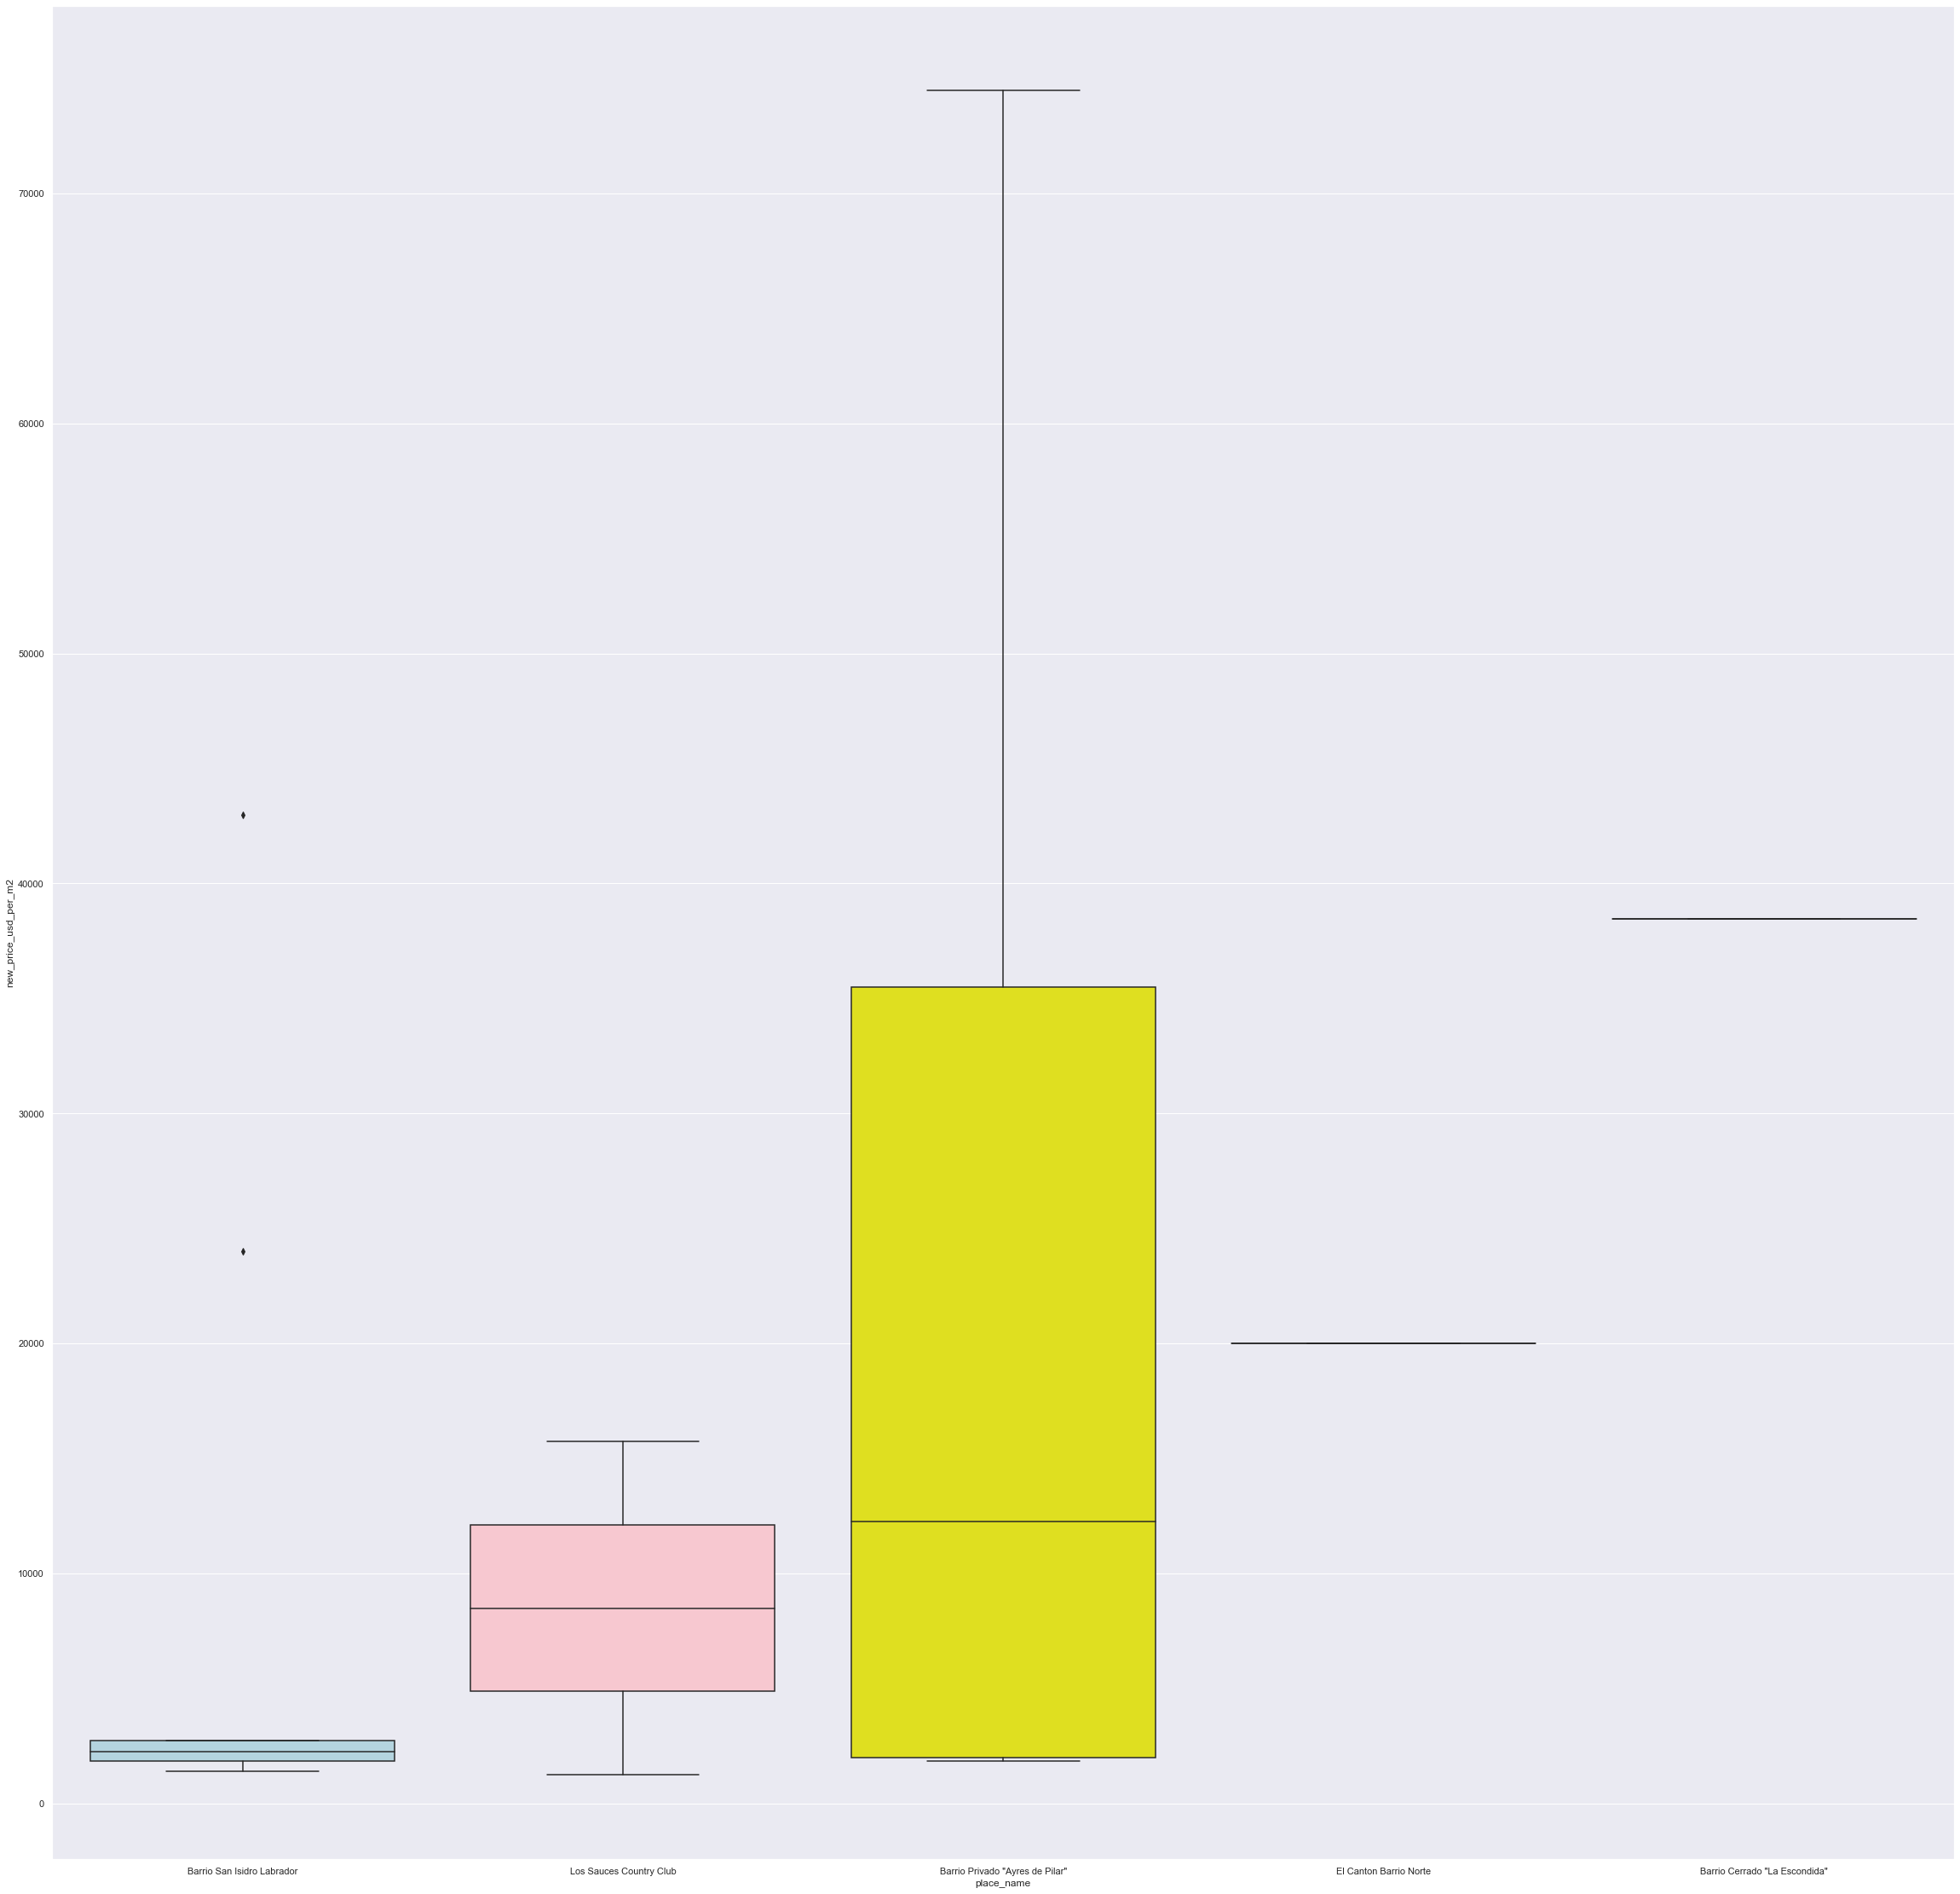

In [211]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['Barrio Cerrado "La Escondida"', 'Barrio Privado "Ayres de Pilar"', 'El Canton Barrio Norte', 'Barrio San Isidro Labrador', 'Los Sauces Country Club']
data_suburb_mask = df_3_bsas_norte_clean.place_name.apply(lambda x: x in suburb_values)
data_suburb = df_3_bsas_norte_clean.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [212]:
#establecemos que en los menores USD 8500 es donde los datos se encuentran mas concentrados 
df_4_bsas_norte = df_3_bsas_norte_clean[df_3_bsas_norte_clean['new_price_usd_per_m2'] < 8500]
df_4_bsas_group_mean =df_4_bsas_norte.groupby(['place_name_clean']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
df_4_bsas_group_mean

,new_price_usd_per_m2,surface_total_in_m2_clean
place_name_clean,,
San Isidro Chico,3975.099469,356.750000
Barrio Parque Matheu,3845.270270,102.500000
Manzone,3462.730510,92.000000
Pilar Golf Country Club,3209.014085,120.333333
Barrio Parque Almirante Irízar,3008.333333,47.500000
...,...,...
El Canton Barrio Puerto,278.168279,776.250000
"Barrio Cerrado ""Villa Rosa""",266.021765,827.000000
Barrio San Eduardo - Pilar del Este,260.000000,500.000000


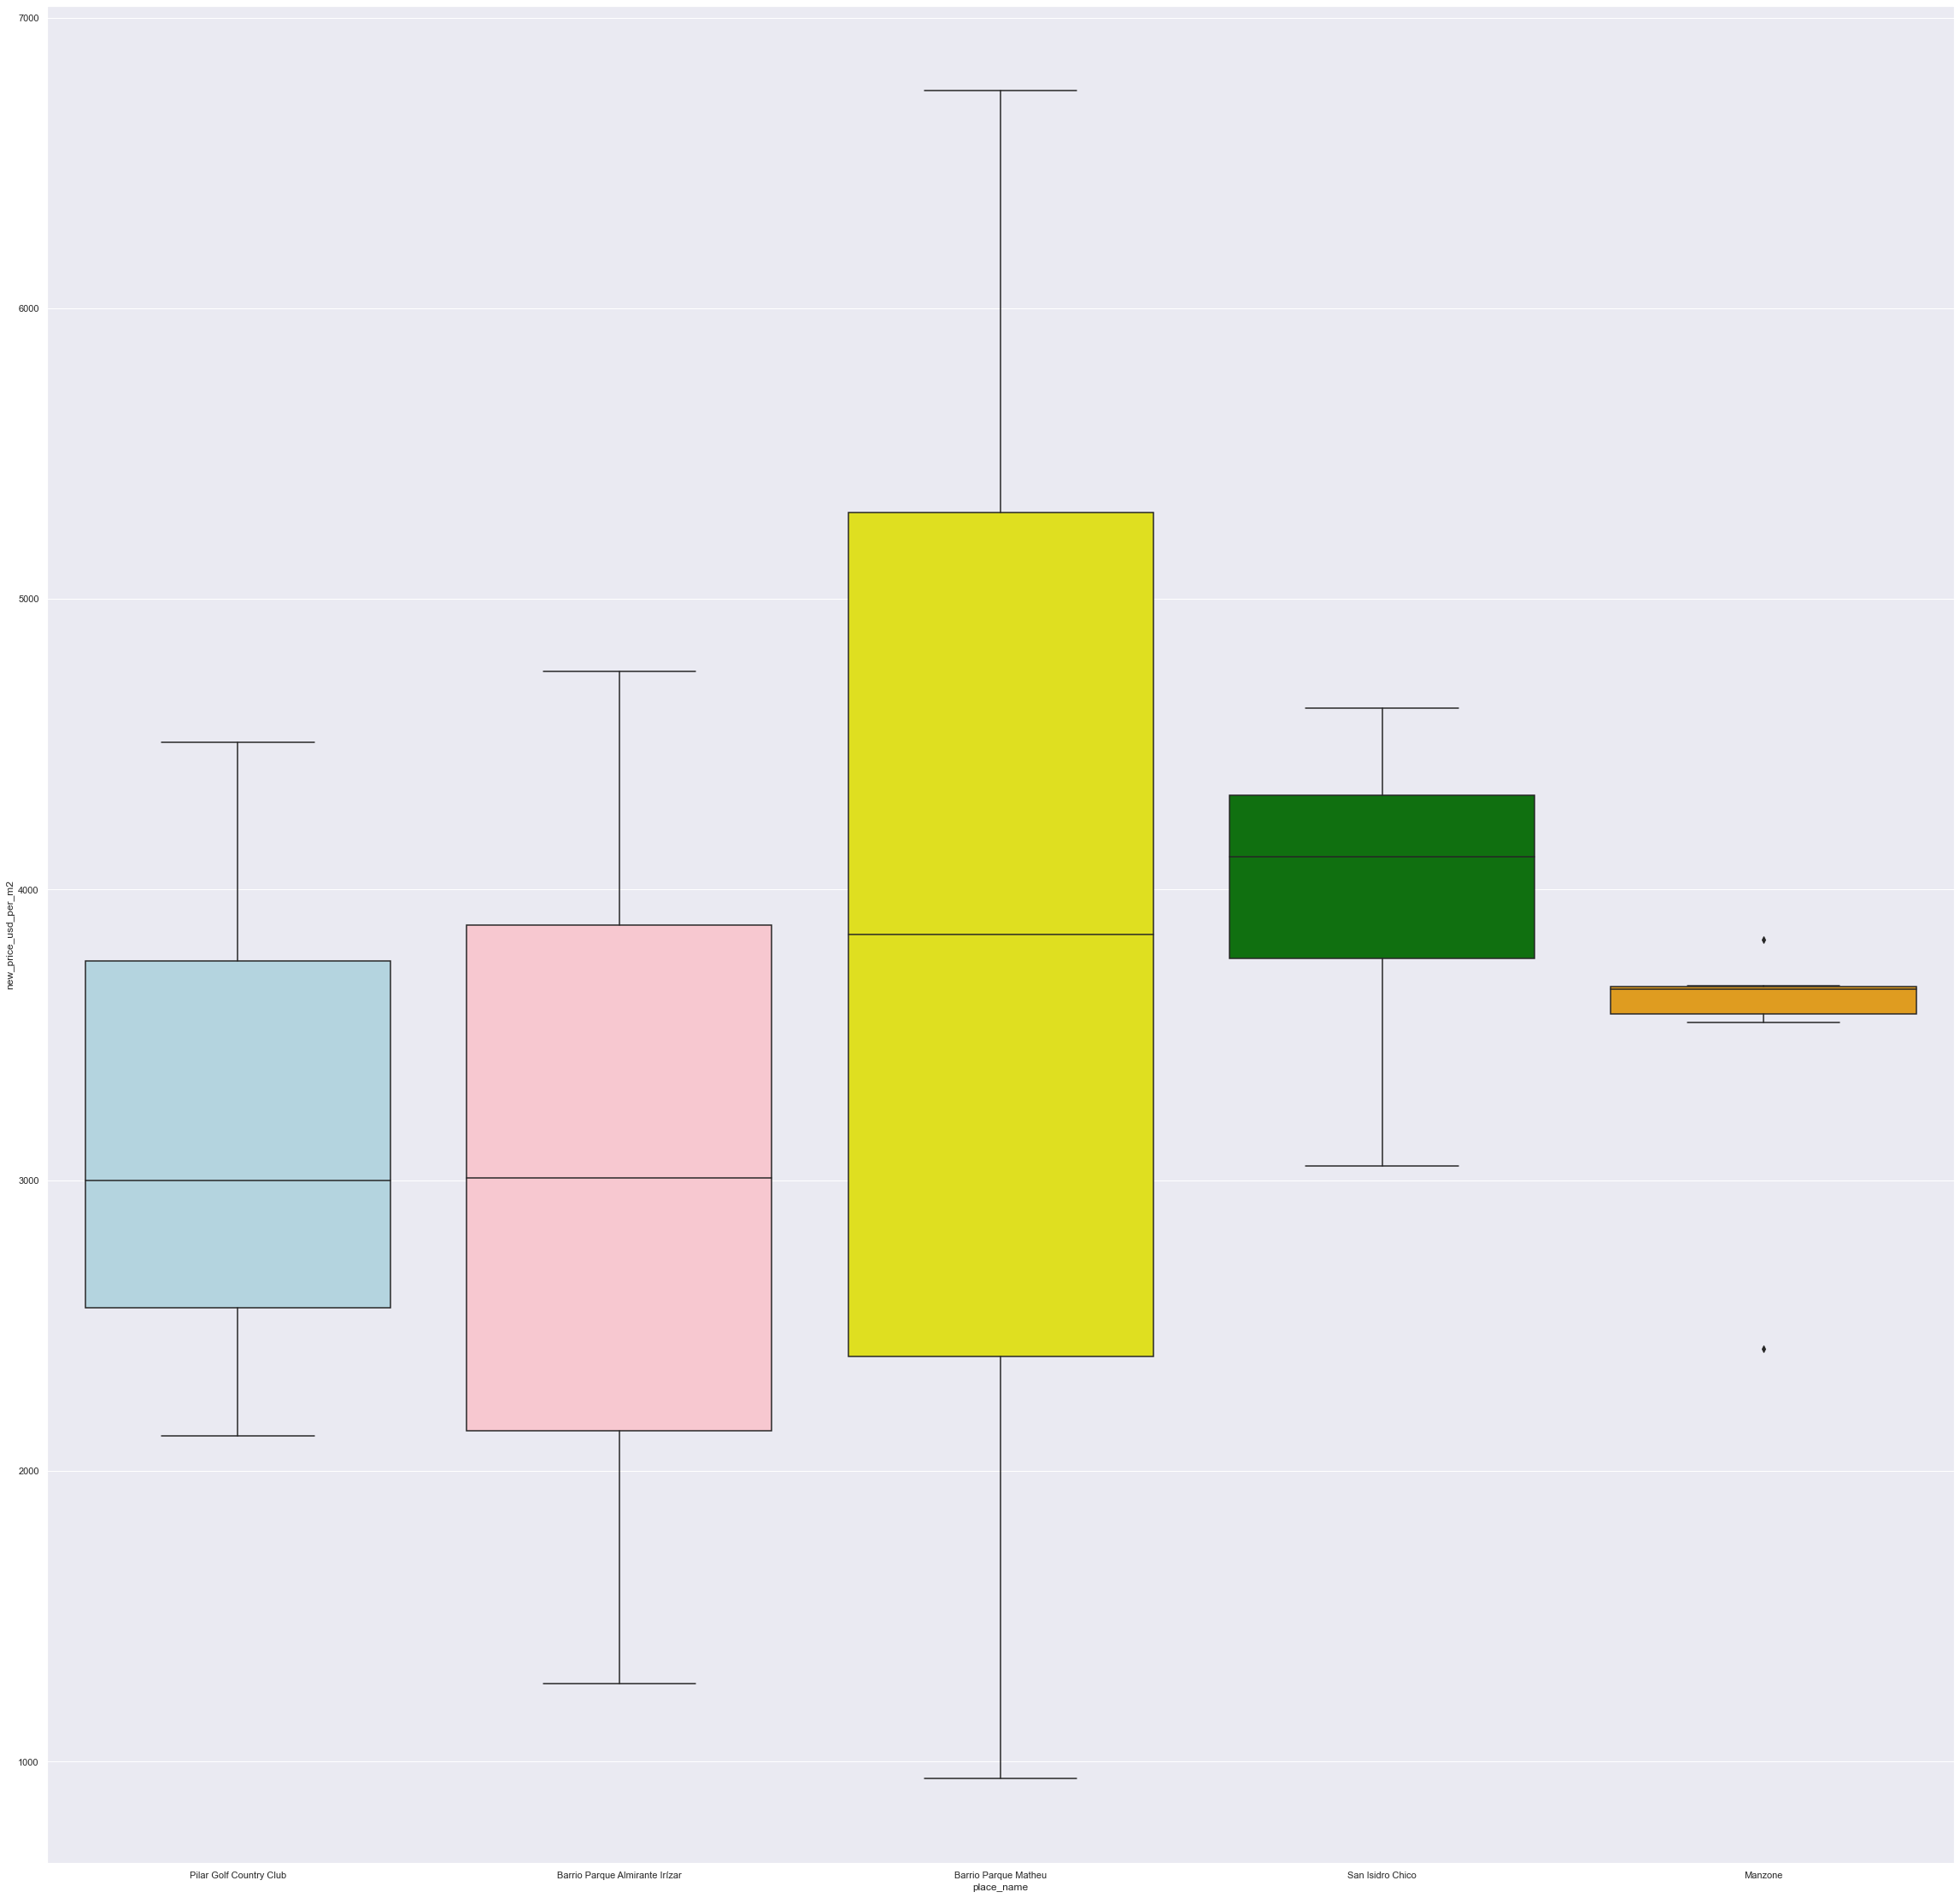

In [213]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['San Isidro Chico', 'Barrio Parque Matheu', 'Manzone', 'Pilar Golf Country Club', 'Barrio Parque Almirante Irízar']
data_suburb_mask = df_4_bsas_norte.place_name.apply(lambda x: x in suburb_values)
data_suburb = df_4_bsas_norte.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [214]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia con tope 8500",df_4_bsas_norte['new_price_usd_per_m2'].describe(),"limpia sin tope",df_3_bsas_norte['new_price_usd_per_m2'].describe(),"original",bsas_norte.price_usd_per_m2.describe())

limpia con tope 8500 count    22905.000000
mean      1852.628409
std       1013.748214
min          4.166667
25%       1204.268293
50%       1719.298246
75%       2372.881356
max       8452.380952
Name: new_price_usd_per_m2, dtype: float64 limpia sin tope count     23153.000000
mean       2051.174684
std        2645.743544
min           4.166667
25%        1211.340206
50%        1731.418919
75%        2400.000000
max      125000.000000
Name: new_price_usd_per_m2, dtype: float64 original count    17405.000000
mean      1860.779924
std       1894.265775
min          4.166667
25%       1122.778675
50%       1666.666667
75%       2329.411765
max      48296.222222
Name: price_usd_per_m2, dtype: float64


# 2. D. Buenos Aires Zona Oeste

In [215]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia",df_3_bsas_oeste['new_price_usd_per_m2'].describe(),"original",bsas_oeste.price_usd_per_m2.describe())

limpia count     6565.000000
mean      1803.042070
std       3075.859128
min          7.000000
25%        907.216495
50%       1411.764706
75%       1850.000000
max      80000.000000
Name: new_price_usd_per_m2, dtype: float64 original count     4623.000000
mean      1349.904779
std       1636.372787
min          7.000000
25%        733.514493
50%       1260.000000
75%       1700.000000
max      80000.000000
Name: price_usd_per_m2, dtype: float64


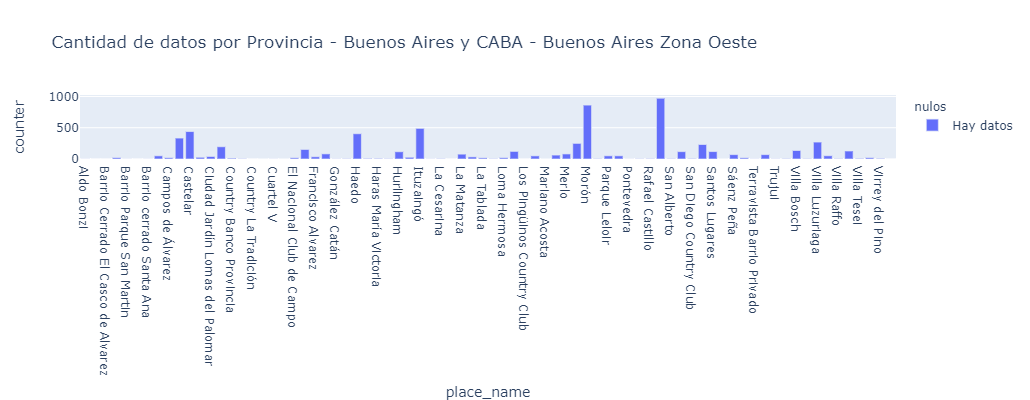

In [216]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
df_3_bsas_oeste_grupo = df_3_bsas_oeste.groupby(by=['state_name',"place_name",'nulos'],as_index=False)['counter'].sum()
df_3_bsas_oeste_grupo['nulos'] = df_3_bsas_oeste_grupo['nulos'].astype(str)
df_3_bsas_oeste_grupo['nulos'] = df_3_bsas_oeste_grupo.nulos.str.replace('False','Hay datos')
df_3_bsas_oeste_grupo['nulos'] = df_3_bsas_oeste_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(df_3_bsas_oeste_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Buenos Aires Zona Oeste")
fig.show()

In [217]:
#Generamos nuevamente el query de limpios
df_3_bsas_oeste_clean = df_3.query(' state_name == "Bs.As. G.B.A. Zona Oeste"')
#agrupamos por barrio y mostramos las columnas Precio USD/ m2 y m2
df_3_bsas_oeste_clean_mean =df_3_bsas_oeste_clean.groupby(['place_name_clean']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
df_3_bsas_oeste_clean_mean

,new_price_usd_per_m2,surface_total_in_m2_clean
place_name_clean,,
St. Patrick Country,8048.309179,124.000000
Aldo Bonzi,6576.666667,153.333333
Trujui,5200.945840,2338.000000
Gregorio de Laferrere,3733.201378,146.571429
Tapiales,2967.422773,167.250000
...,...,...
Barrio Cerrado El Casco de Alvarez,445.945946,740.000000
Virrey del Pino,398.564947,827.636364
Cuartel V,237.360477,182.333333


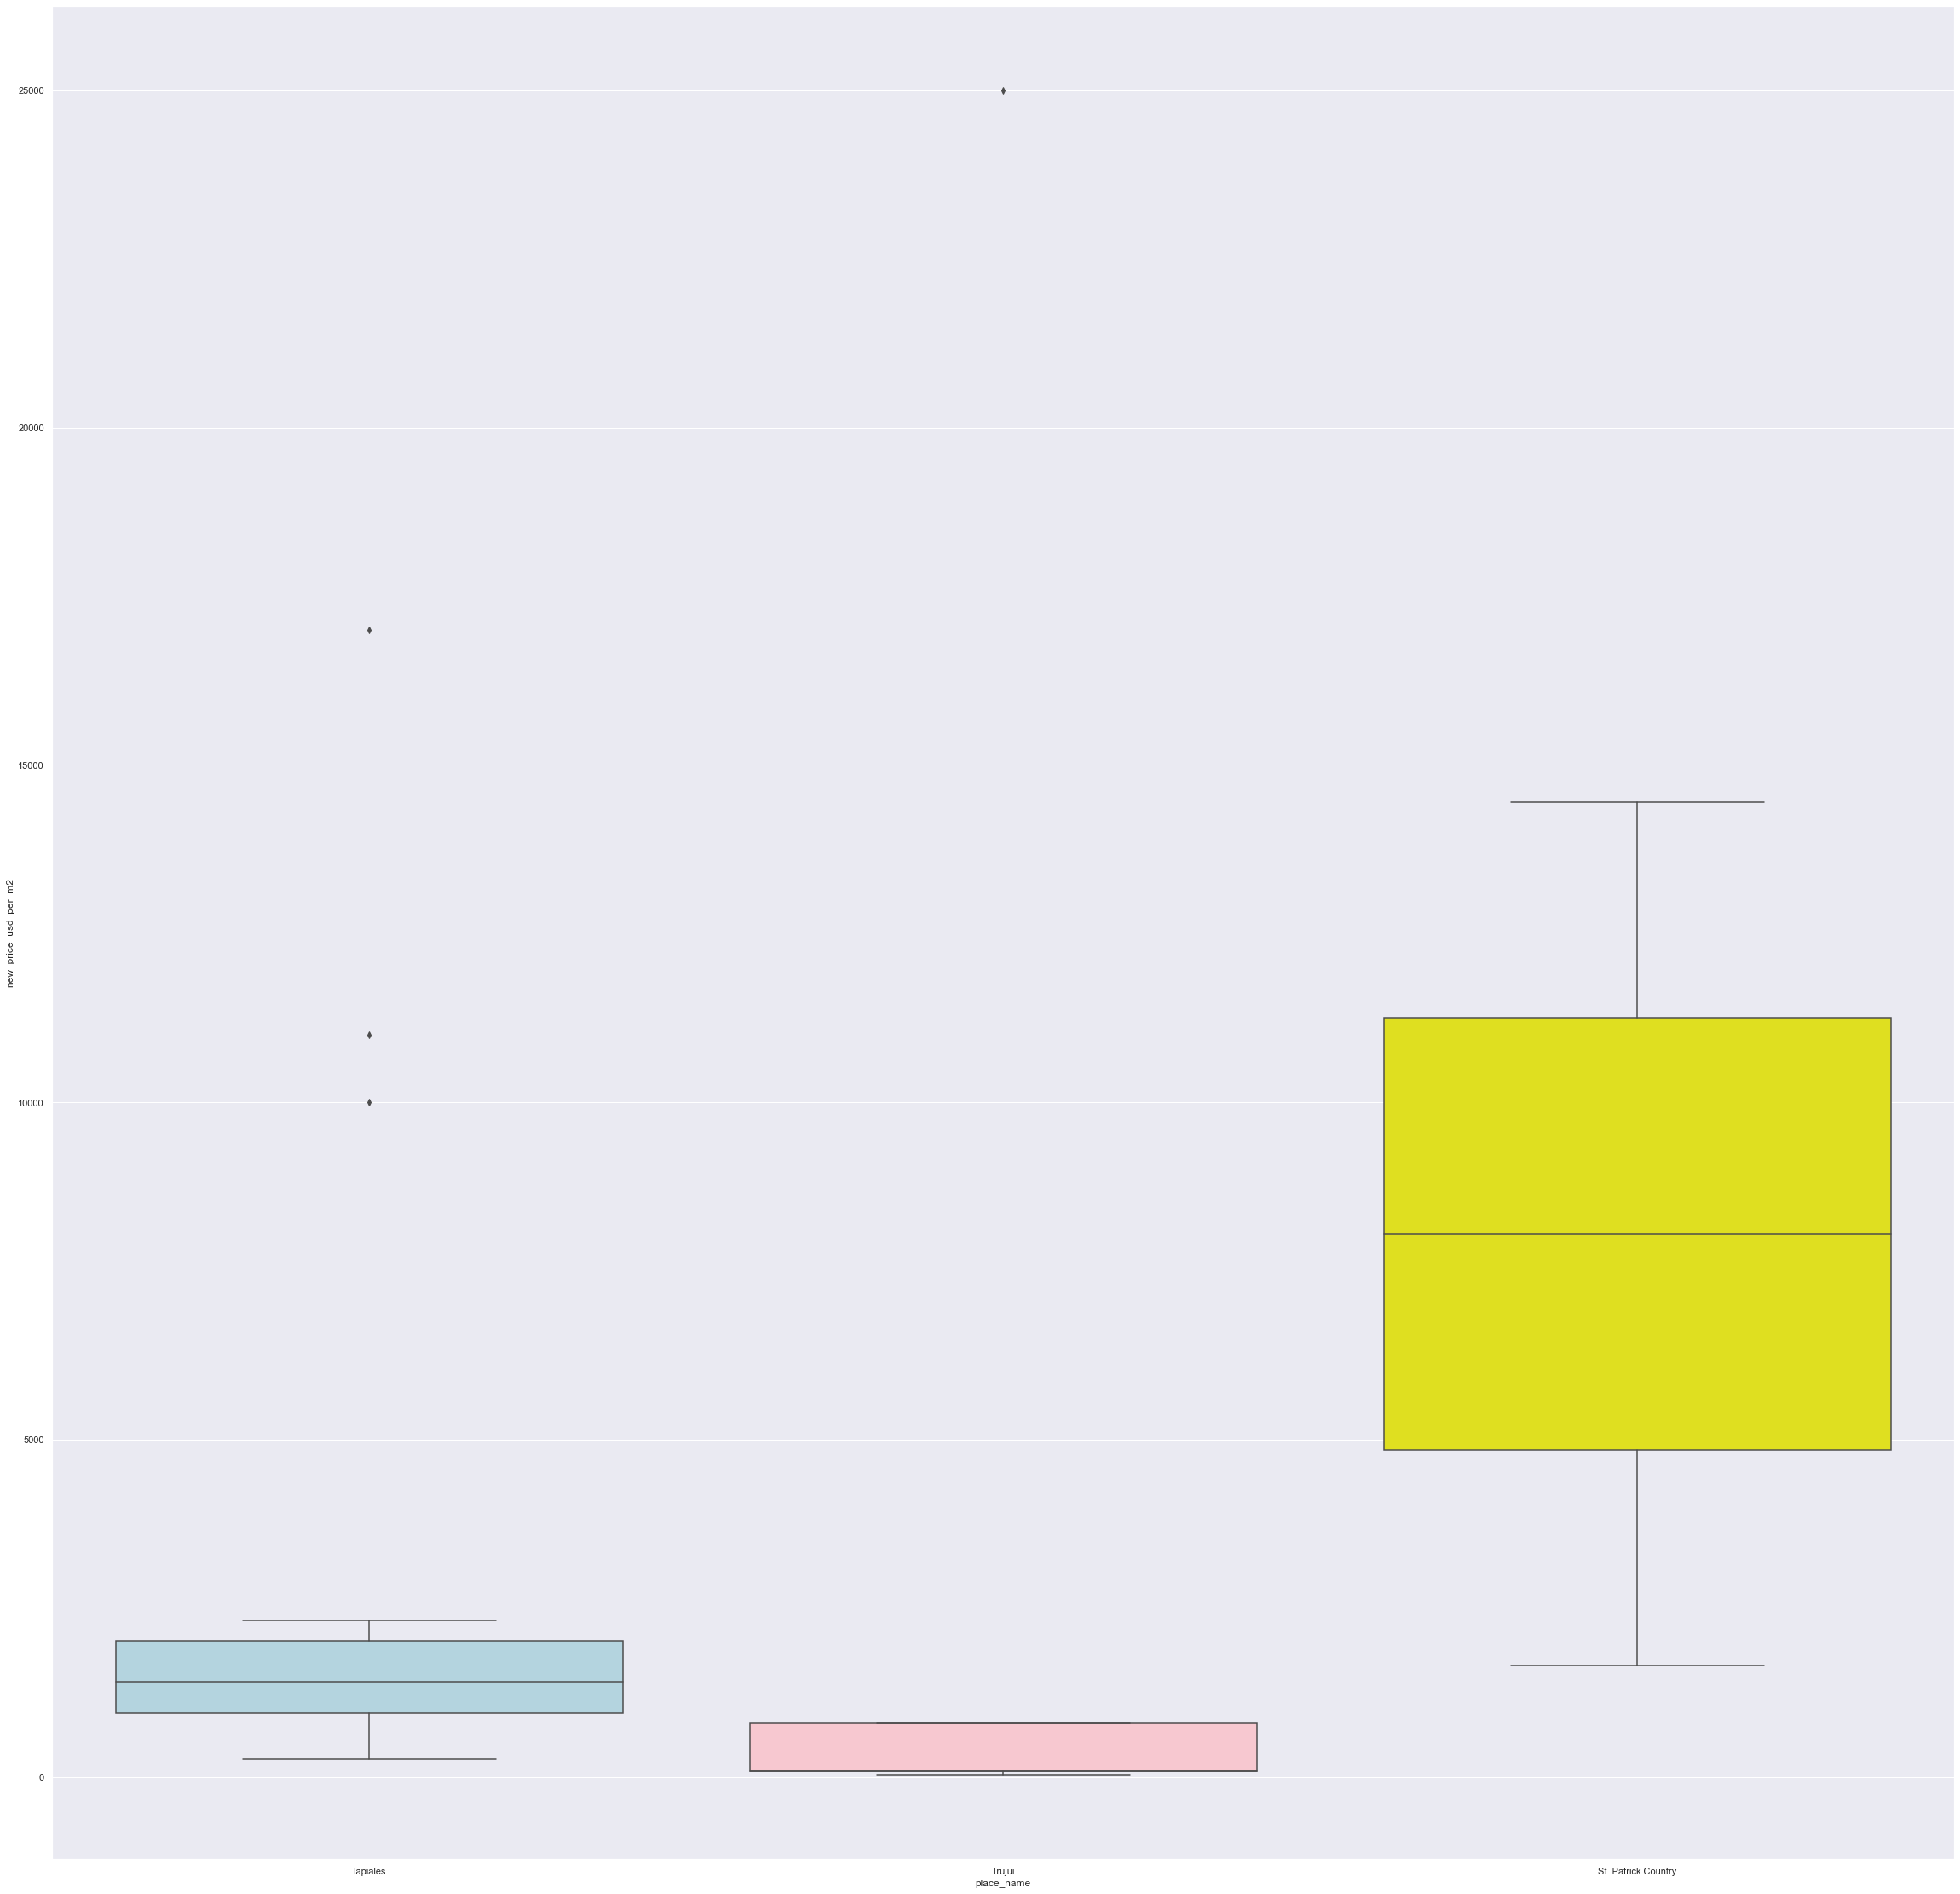

In [218]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['St. Patrick Country', 'Aldo Bonzi"', 'Trujui', 'Gregorio de Laferrere	', 'Tapiales']
data_suburb_mask = df_3_bsas_oeste_clean.place_name.apply(lambda x: x in suburb_values)
data_suburb = df_3_bsas_oeste_clean.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [219]:
#establecemos que en los menores USD 8500 es donde los datos se encuentran mas concentrados 
df_4_bsas_oeste = df_3_bsas_oeste_clean[df_3_bsas_oeste_clean['new_price_usd_per_m2'] < 8500]
df_4_bsas_oeste_mean =df_4_bsas_oeste.groupby(['place_name_clean']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
df_4_bsas_oeste_mean

,new_price_usd_per_m2,surface_total_in_m2_clean
place_name_clean,,
Cruce Castelar,2380.952381,505.000000
El Casco de Leloir,2250.000000,365.000000
Ramos Mejía,1849.917925,112.728408
Country La Tradición,1800.000000,110.000000
Los Pingüinos Country Club,1744.186047,430.000000
...,...,...
Virrey del Pino,398.564947,827.636364
Trujui,251.182301,2917.500000
Cuartel V,237.360477,182.333333


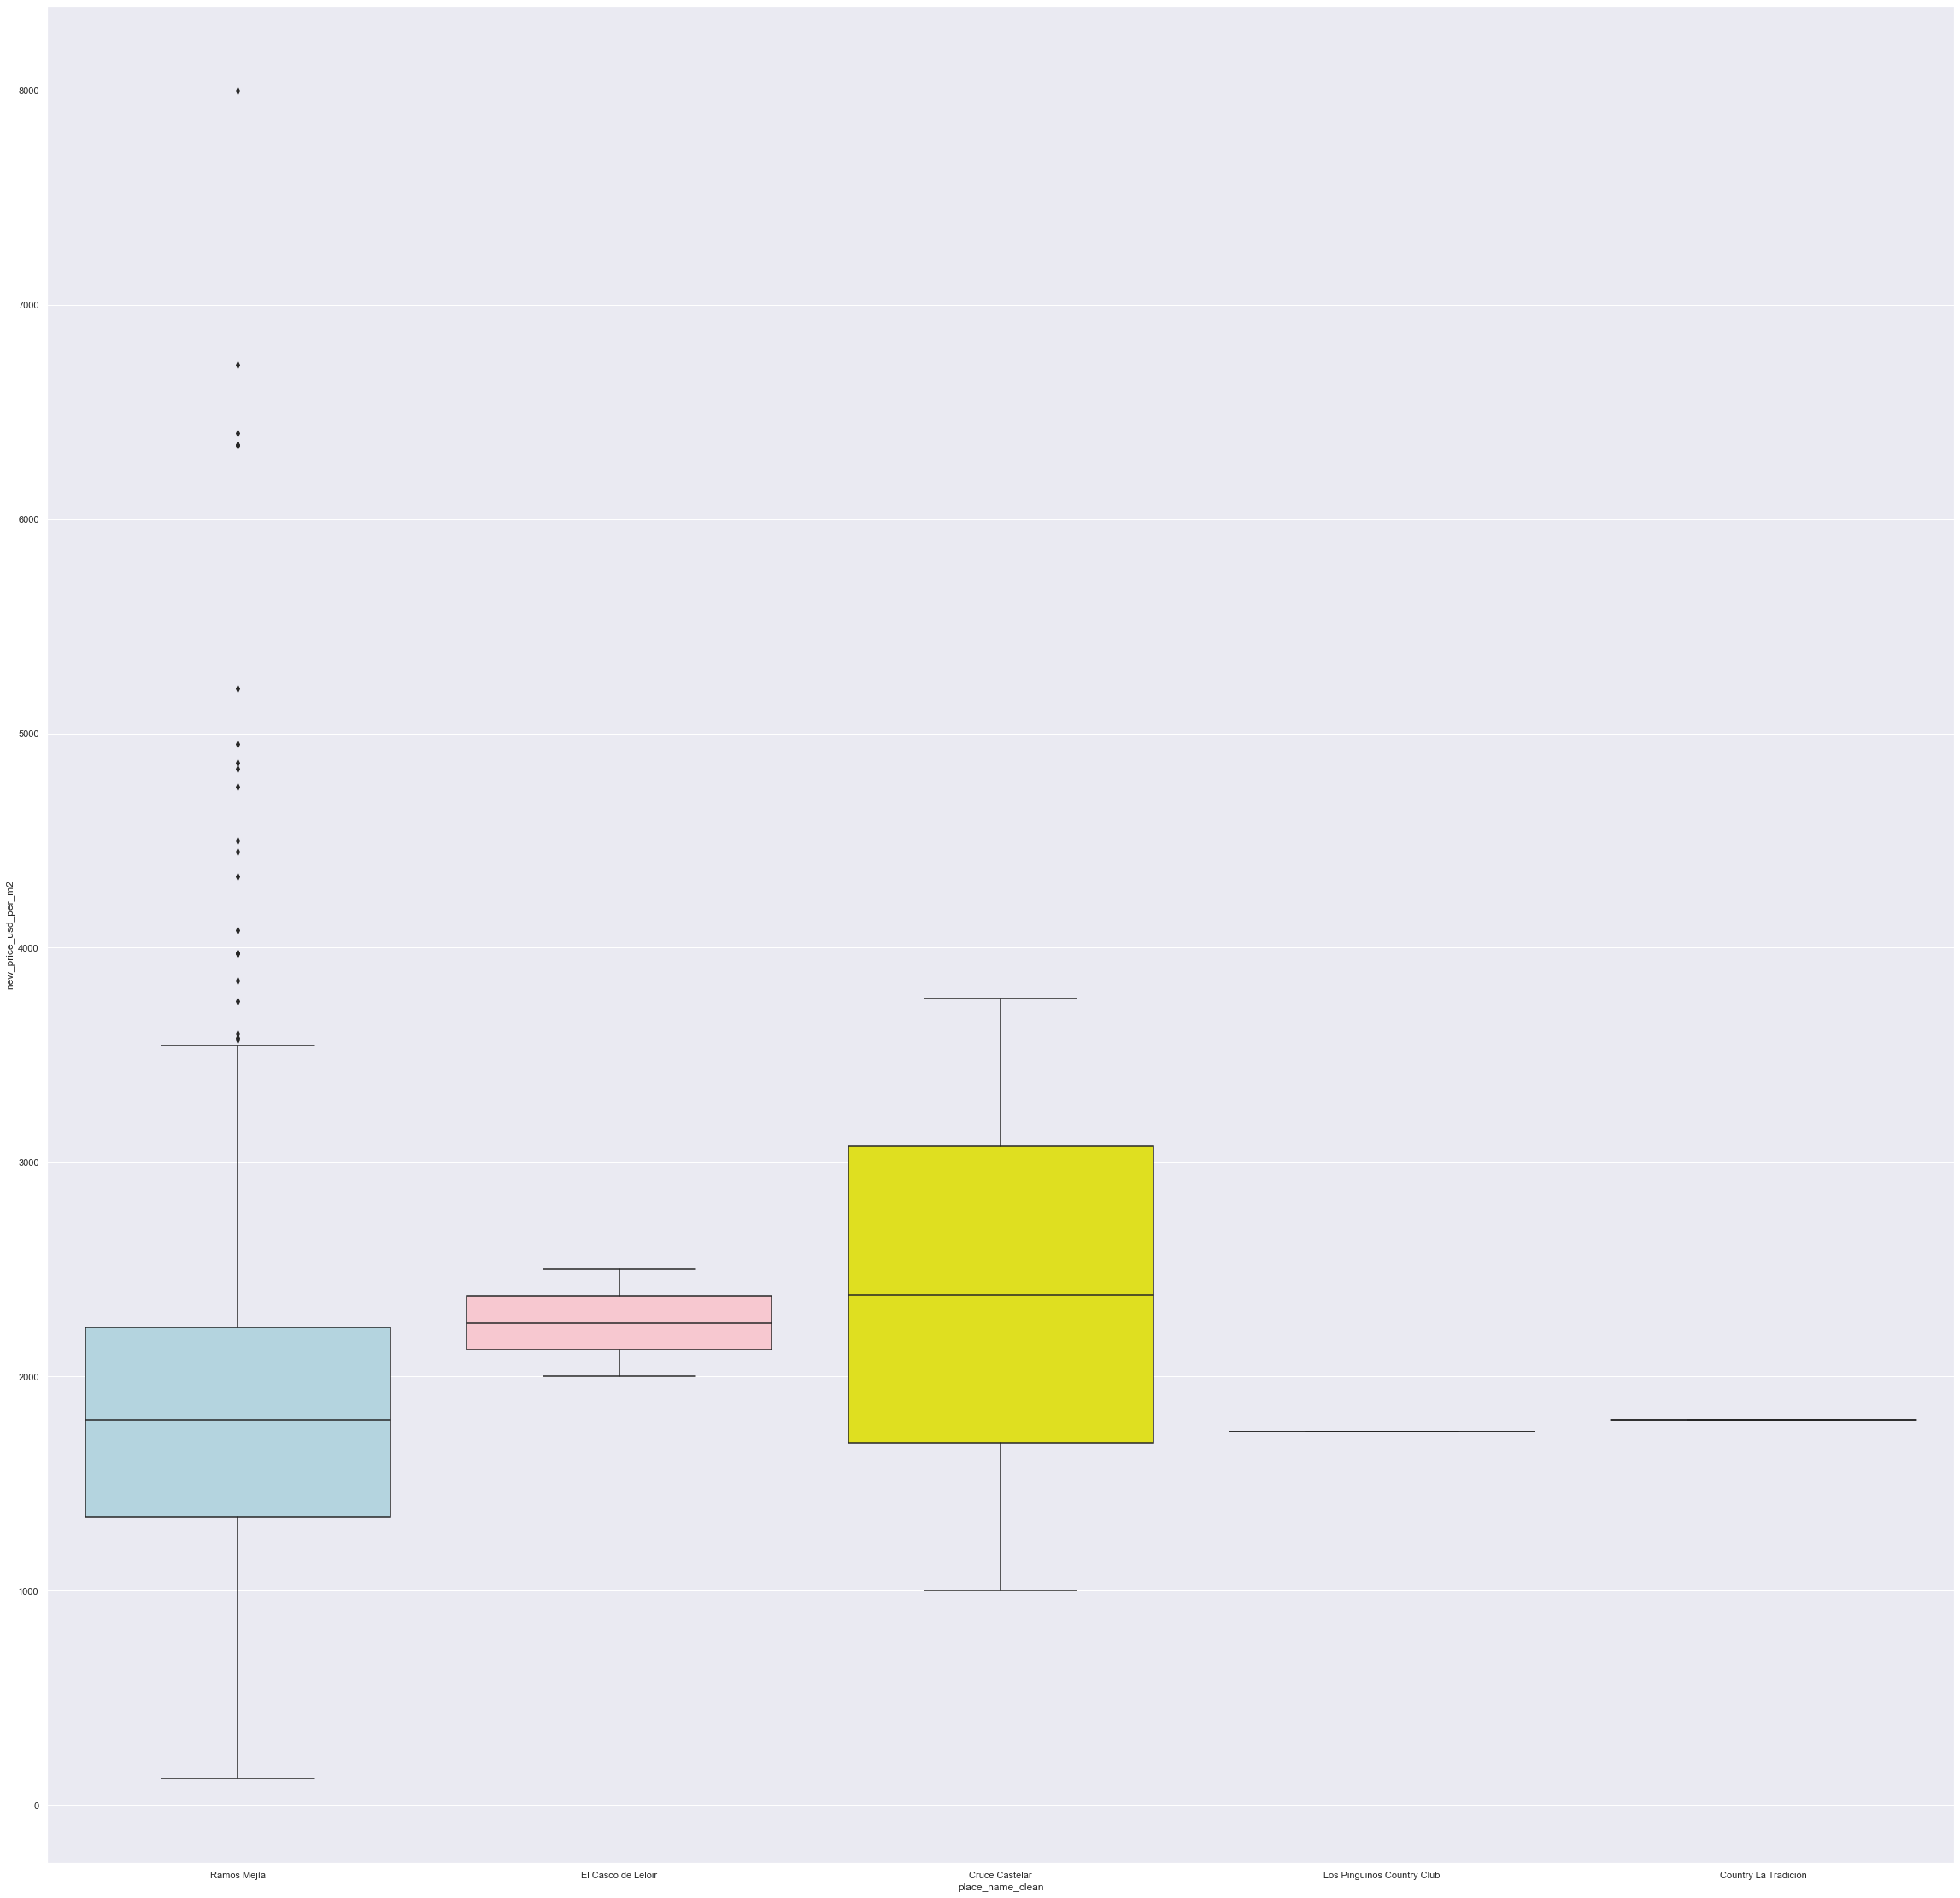

In [220]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['Cruce Castelar', 'El Casco de Leloir', 'Ramos Mejía', 'Country La Tradición', 'Los Pingüinos Country Club']
data_suburb_mask = df_4_bsas_oeste.place_name_clean.apply(lambda x: x in suburb_values)
data_suburb = df_4_bsas_oeste.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name_clean", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [221]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia con tope 8500",df_4_bsas_oeste['new_price_usd_per_m2'].describe(),"limpia sin tope",df_3_bsas_oeste['new_price_usd_per_m2'].describe(),"original",bsas_oeste.price_usd_per_m2.describe())

limpia con tope 8500 count    6433.000000
mean     1429.791824
std       841.111726
min         7.000000
25%       893.203883
50%      1388.888889
75%      1820.716429
max      8000.000000
Name: new_price_usd_per_m2, dtype: float64 limpia sin tope count     6565.000000
mean      1803.042070
std       3075.859128
min          7.000000
25%        907.216495
50%       1411.764706
75%       1850.000000
max      80000.000000
Name: new_price_usd_per_m2, dtype: float64 original count     4623.000000
mean      1349.904779
std       1636.372787
min          7.000000
25%        733.514493
50%       1260.000000
75%       1700.000000
max      80000.000000
Name: price_usd_per_m2, dtype: float64


# 2. E. Buenos Aires Zona Costa Atlántica

In [222]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia",df_3_bsas_costa['new_price_usd_per_m2'].describe(),"original",bsas_costa.price_usd_per_m2.describe())

limpia count     7996.000000
mean      1654.723551
std       1161.855503
min          1.000000
25%       1100.000000
50%       1642.857143
75%       2070.370370
max      37500.000000
Name: new_price_usd_per_m2, dtype: float64 original count     6350.000000
mean      1574.633123
std        916.209264
min          1.000000
25%       1000.000000
50%       1617.647059
75%       2051.282051
max      21897.058824
Name: price_usd_per_m2, dtype: float64


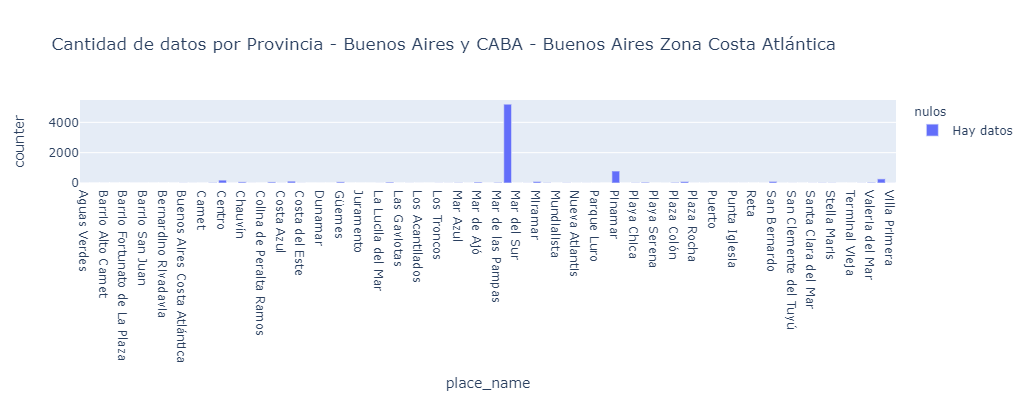

In [223]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
df_3_bsas_costa_grupo = df_3_bsas_costa.groupby(by=['state_name',"place_name",'nulos'],as_index=False)['counter'].sum()
df_3_bsas_costa_grupo['nulos'] = df_3_bsas_costa_grupo['nulos'].astype(str)
df_3_bsas_costa_grupo['nulos'] = df_3_bsas_costa_grupo.nulos.str.replace('False','Hay datos')
df_3_bsas_costa_grupo['nulos'] = df_3_bsas_costa_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(df_3_bsas_costa_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Buenos Aires Zona Costa Atlántica")
fig.show()

In [224]:
#detectamos que de la misma manera que en La Plata, en Mar del Plata.
#estructuramos que cada una de los barrios de Mar del Plata ahora tenga incluido en su descripcion que pertenece a dicha ciudad
#a fin de poder alcanzar el dato correctamente 
mdq_la_perla_mask = df_3["place_with_parent_names"] == "|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|La Perla|"
df_3.loc[mdq_la_perla_mask, "place_name_clean"] = "Mar del Plata La Perla"

mdq_centro_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|"
df_3.loc[mdq_centro_mask, "place_name_clean"] = "Mar del Plata Centro"

mdq_caisamar_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Caisamar|"
df_3.loc[mdq_caisamar_mask, "place_name_clean"] = "Mar del Plata Caisamar"

mdq_macrocentro_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Macrocentro|"
df_3.loc[mdq_macrocentro_mask, "place_name_clean"] = "Mar del Plata Macrocentro"

mdq_pcolon_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Plaza Colón|"
df_3.loc[mdq_pcolon_mask, "place_name_clean"] = "Mar del Plata Plaza Colón"

mdq_pompeya_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Pompeya|"
df_3.loc[mdq_pompeya_mask, "place_name_clean"] = "Mar del Plata Pompeya"

mdq_terminal_nueva_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Terminal Nueva|"
df_3.loc[mdq_terminal_nueva_mask, "place_name_clean"] = "Mar del Plata Terminal Nueva"

mdq_pinos_anchorena_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Pinos de Anchorena|"
df_3.loc[mdq_pinos_anchorena_mask, "place_name_clean"] = "Mar del Plata Pinos de Anchorena"

mdq_plaza_mitre_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Plaza Mitre|"
df_3.loc[mdq_plaza_mitre_mask, "place_name_clean"] = "Mar del Plata Plaza Mitre"

mdq_acantilados_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Los Acantilados|"
df_3.loc[mdq_acantilados_mask, "place_name_clean"] = "Mar del Plata Los Acantilados"

mdq_pchica_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Playa Chica|"
df_3.loc[mdq_pchica_mask, "place_name_clean"] = "Mar del Plata Playa Chica"

mdq_pgrande_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Playa Grande|"
df_3.loc[mdq_pgrande_mask, "place_name_clean"] = "Mar del Plata Playa Grande"

mdq_chauvin_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Chauvín|"
df_3.loc[mdq_chauvin_mask, "place_name_clean"] = "Mar del Plata Chauvín"

mdq_donbosco_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Don Bosco|"
df_3.loc[mdq_donbosco_mask, "place_name_clean"] = "Mar del Plata Don Bosco"

mdq_troncos_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Los Troncos|"
df_3.loc[mdq_troncos_mask, "place_name_clean"] = "Mar del Plata Los Troncos"

mdq_stellamaris_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Stella Maris|"
df_3.loc[mdq_stellamaris_mask, "place_name_clean"] = "Mar del Plata Stella Maris"

mdq_primerajunta_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Primera Junta|"
df_3.loc[mdq_primerajunta_mask, "place_name_clean"] = "Mar del Plata Primera Junta"

mdq_constitucion_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Constitución|"
df_3.loc[mdq_constitucion_mask, "place_name_clean"] = "Mar del Plata Constitución"

mdq_sancarlos_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|San Carlos|"
df_3.loc[mdq_sancarlos_mask, "place_name_clean"] = "Mar del Plata San Carlos"

mdq_puerto_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Puerto|"
df_3.loc[mdq_puerto_mask, "place_name_clean"] = "Mar del Plata Puerto"

mdq_guemes_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Güemes|"
df_3.loc[mdq_guemes_mask, "place_name_clean"] = "Mar del Plata Güemes"

mdq_materno_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Materno|"
df_3.loc[mdq_materno_mask, "place_name_clean"] = "Mar del Plata Materno"

mdq_rumenco_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Rumenco|"
df_3.loc[mdq_rumenco_mask, "place_name_clean"] = "Mar del Plata Rumenco"
#
mdq_varese_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Playa Varese|"
df_3.loc[mdq_varese_mask, "place_name_clean"] = "Mar del Plata Playa Varese"

mdq_luro_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Parque Luro|"
df_3.loc[mdq_luro_mask, "place_name_clean"] = "Mar del Plata Parque Luro"

mdq_pinares_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Los Pinares|"
df_3.loc[mdq_pinares_mask, "place_name_clean"] = "Mar del Plata Los Pinares"

mdq_sanjuan_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|San Juan|"
df_3.loc[mdq_sanjuan_mask, "place_name_clean"] = "Mar del Plata San Juan"

mdq_bosque_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Bosque Peralta Ramos|"
df_3.loc[mdq_bosque_mask, "place_name_clean"] = "Mar del Plata Bosque Peralta Ramos"
#
mdq_villaprimera_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Villa Primera|"
df_3.loc[mdq_villaprimera_mask, "place_name_clean"] = "Mar del Plata Villa Primera"

mdq_torreon_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Torreón|"
df_3.loc[mdq_torreon_mask, "place_name_clean"] = "Mar del Plata Torreón"

mdq_terminalvieja_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Terminal Vieja|"
df_3.loc[mdq_terminalvieja_mask, "place_name_clean"] = "Mar del Plata Terminal Vieja"

mdq_fortunato_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio Fortunato de La Plaza|"
df_3.loc[mdq_fortunato_mask, "place_name_clean"] = "Mar del Plata Barrio Fortunato de La Plaza"

mdq_mogotes_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Punta Mogotes|"
df_3.loc[mdq_mogotes_mask, "place_name_clean"] = "Mar del Plata Punta Mogotes"

mdq_rocha_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Plaza Rocha|"
df_3.loc[mdq_rocha_mask, "place_name_clean"] = "Mar del Plata Plaza Rocha"
#
mdq_baltocamet_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio Alto Camet|"
df_3.loc[mdq_baltocamet_mask, "place_name_clean"] = "Mar del Plata Barrio Alto Camet"

mdq_bsanjuan_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio San Juan|"
df_3.loc[mdq_bsanjuan_mask, "place_name_clean"] = "Mar del Plata Barrio San Juan"

mdq_alem_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Alem|"
df_3.loc[mdq_alem_mask, "place_name_clean"] = "Mar del Plata Alem"

mdq_cpramos_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Colina de Peralta Ramos|"
df_3.loc[mdq_cpramos_mask, "place_name_clean"] = "Mar del Plata Colina de Peralta Ramos"

mdq_bperlanorte_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio La Perla Norte|"
df_3.loc[mdq_bperlanorte_mask, "place_name_clean"] = "Mar del Plata Barrio La Perla Norte"
#
mdq_mundialista_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Mundialista|"
df_3.loc[mdq_mundialista_mask, "place_name_clean"] = "Mar del Plata Mundialista"

mdq_chapadmalal_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Chapadmalal|"
df_3.loc[mdq_chapadmalal_mask, "place_name_clean"] = "Mar del Plata Chapadmalal"

mdq_bernardinorivadavia_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Bernardino Rivadavia|"
df_3.loc[mdq_bernardinorivadavia_mask, "place_name_clean"] = "Mar del Plata Bernardino Rivadavia"

mdq_hermitage_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Hermitage|"
df_3.loc[mdq_hermitage_mask, "place_name_clean"] = "Mar del Plata Hermitage"

mdq_bsarmiento_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio Sarmiento|"
df_3.loc[mdq_bsarmiento_mask, "place_name_clean"] = "Mar del Plata - Barrio Sarmiento"
#
mdq_alfar_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Alfar|"
df_3.loc[mdq_alfar_mask, "place_name_clean"] = "Mar del Plata Alfar"

mdq_gsanmartin_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Gral San Martin|"
df_3.loc[mdq_gsanmartin_mask, "place_name_clean"] = "Mar del Plata Gral San Martin"

mdq_faronorte_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Faro Norte|"
df_3.loc[mdq_faronorte_mask, "place_name_clean"] = "Mar del Plata Faro Norte"

mdq_puntaiglesia_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Punta Iglesia|"
df_3.loc[mdq_puntaiglesia_mask, "place_name_clean"] = "Mar del Plata Punta Iglesia"

mdq_pserena_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Playa Serena|"
df_3.loc[mdq_pserena_mask, "place_name_clean"] = "Mar del Plata Playa Serena"

mdq_juramento_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Juramento|"
df_3.loc[mdq_juramento_mask, "place_name_clean"] = "Mar del Plata Juramento"

mdq_bcamet_mask = df_3["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio Camet|"
df_3.loc[mdq_bcamet_mask, "place_name_clean"] = "Mar del Plata Barrio Camet"

#prueba la barrio
placename_chauvin_mask = (df_3['place_with_parent_names'] == "|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Juramento|")

#Generamos nuevamente el query de limpios
df_3_bsas_costa_clean = df_3.query(' state_name == "Buenos Aires Costa Atlántica"')

#print barrio
df_3[placename_chauvin_mask].head(3)


C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,nulos,pileta,gym,cochera,jardin,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2,place_name_clean
113207,113207,sell,house,Juramento,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3853334.0,"-38.0549987661,-57.5694617629",-38.054999,...,False,NaN,NO,NO,NO,5,5,120.0,708.333333,Mar del Plata Juramento


In [225]:
#agrupamos por barrio y mostramos las columnas Precio USD/ m2 y m2
df_3_bsas_costa_clean_mean =df_3_bsas_costa_clean.groupby(['place_name_clean']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
df_3_bsas_costa_clean_mean

,new_price_usd_per_m2,surface_total_in_m2_clean
place_name_clean,,
Costa del Este,4088.922746,165.714286
Mar del Plata Playa Grande,2834.040897,89.571429
Mar del Plata Playa Chica,2523.030911,91.214286
Mar del Plata Güemes,2387.878395,81.766234
Mar del Plata Playa Varese,2254.440397,83.375000
...,...,...
Mar del Plata Chapadmalal,242.777778,475.000000
Mar Chiquita,188.874015,833.166667
Mar del Sur,161.708848,735.333333


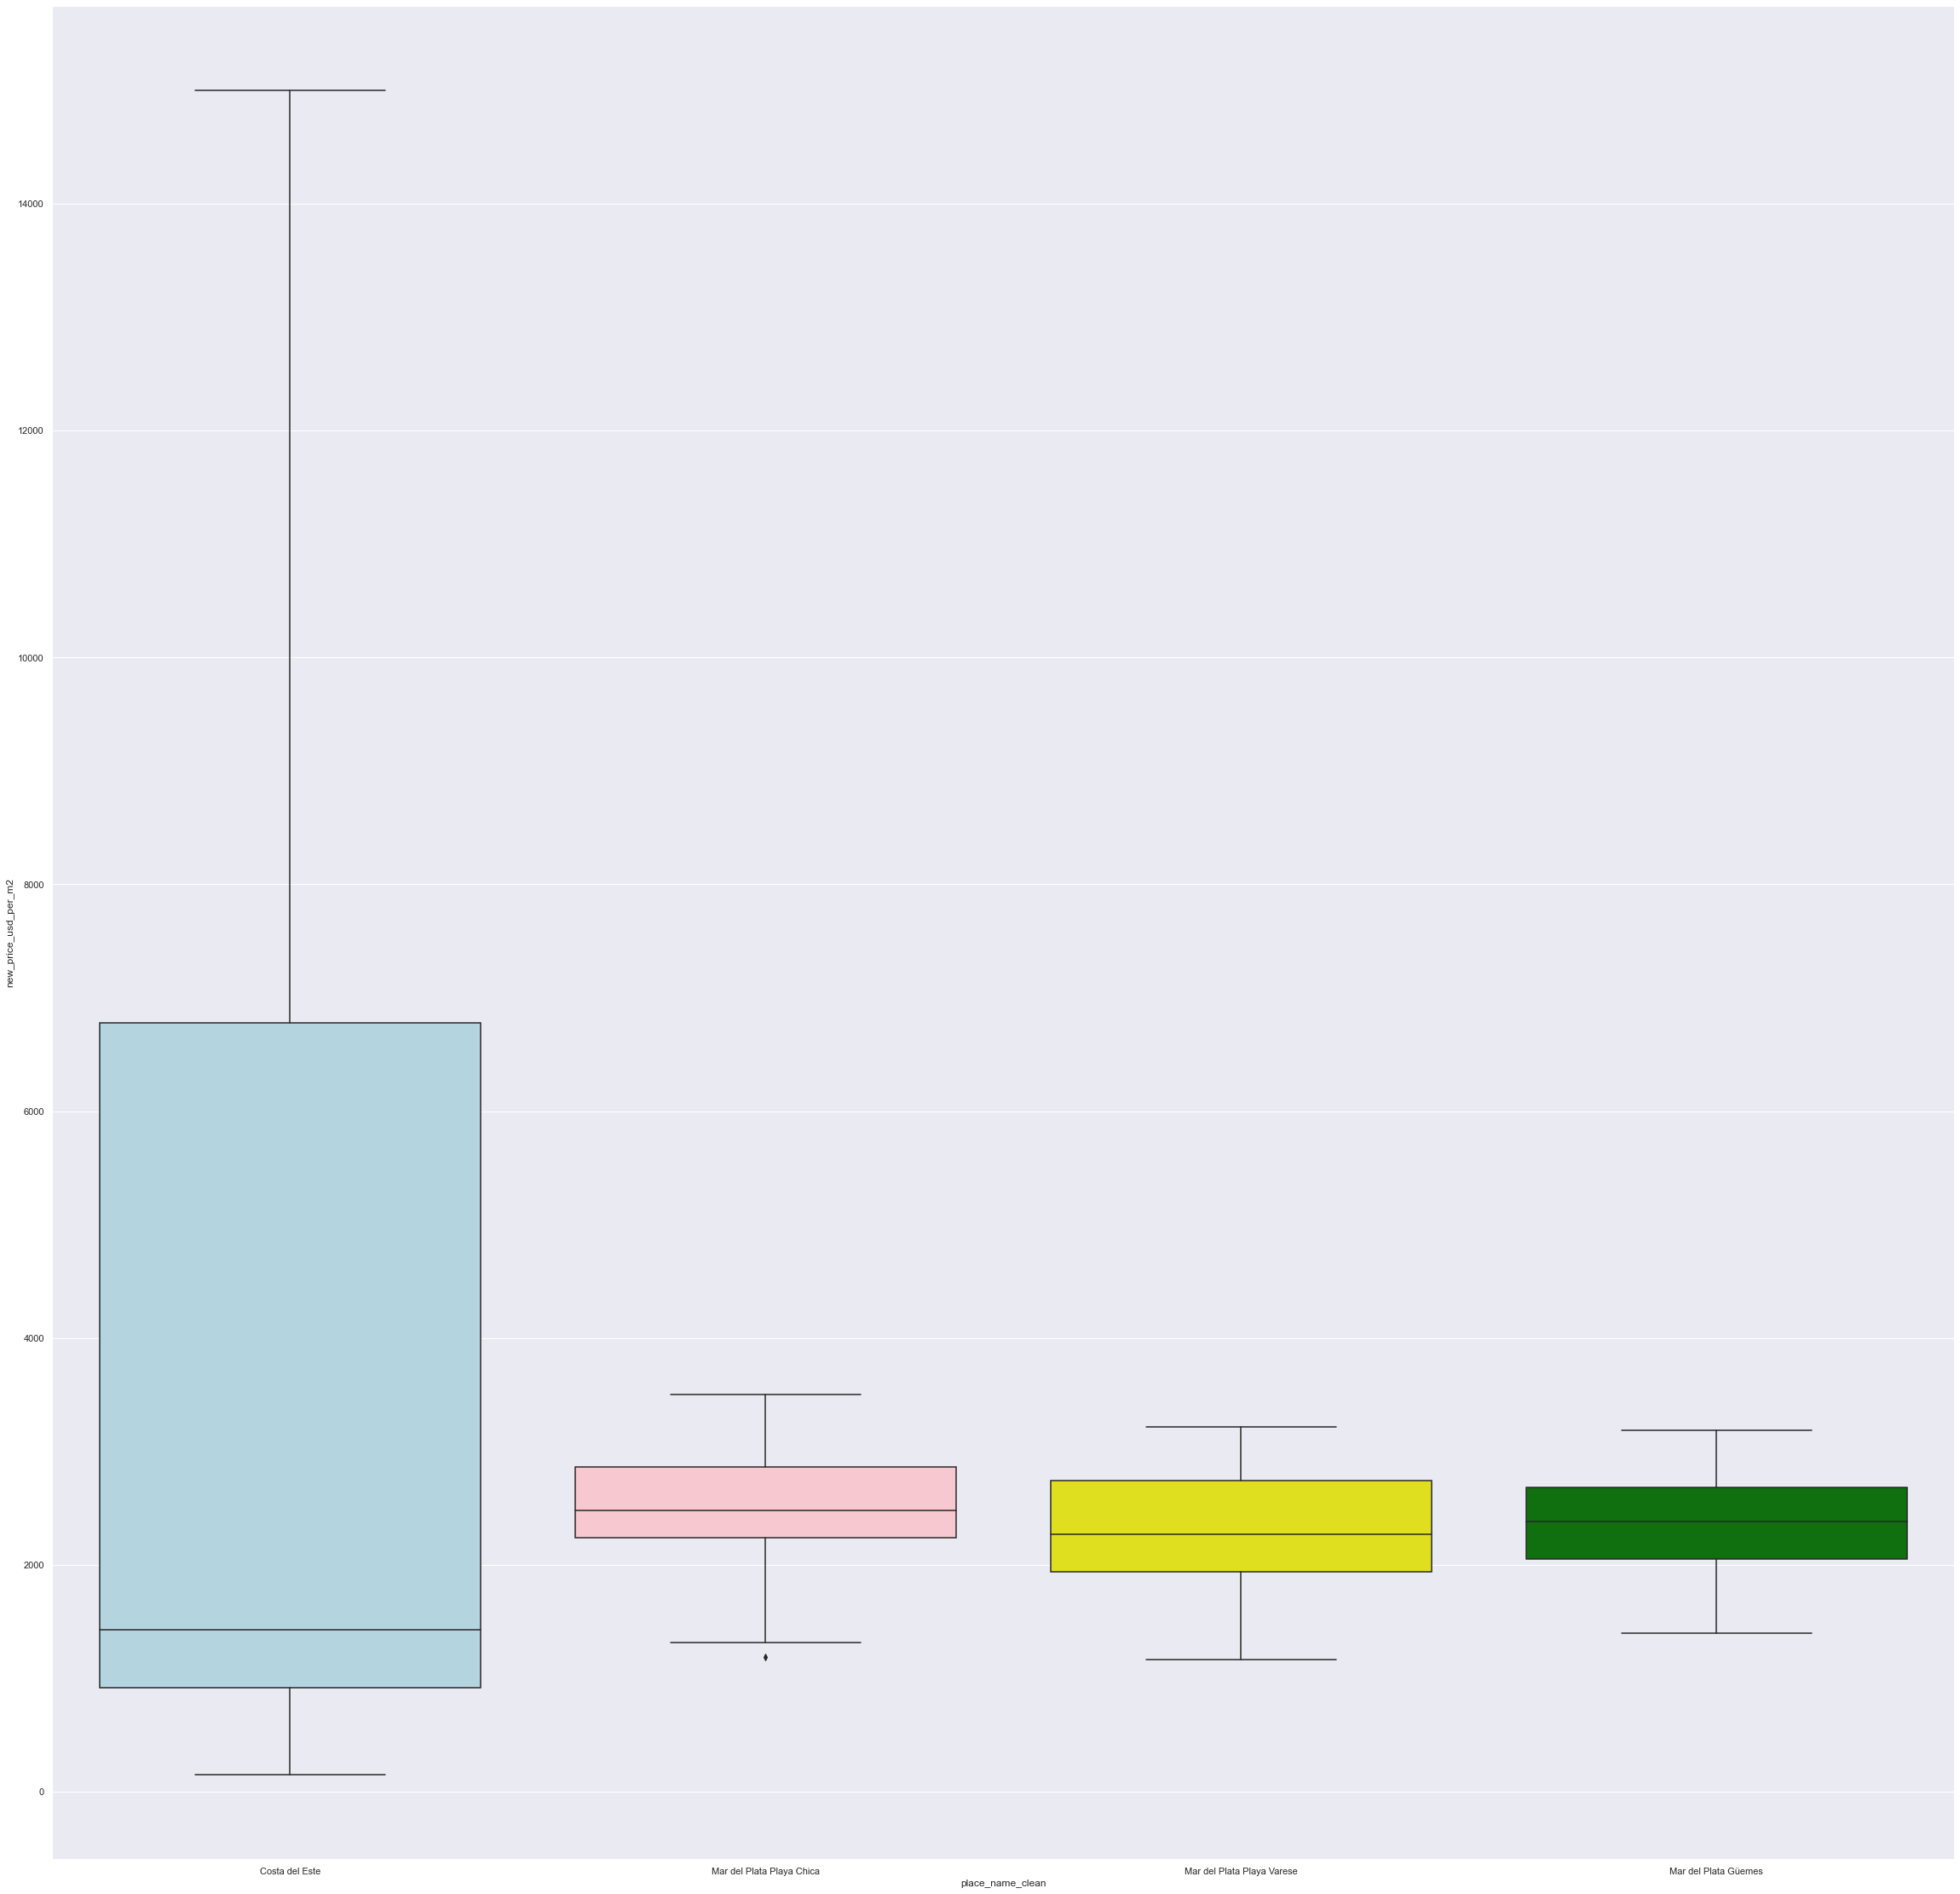

In [226]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['Costa del Este', 'Mar del Plata Playa Grande"', 'Mar del Plata Playa Chica', 'Mar del Plata Güemes', 'Mar del Plata Playa Varese']
data_suburb_mask = df_3_bsas_costa_clean.place_name_clean.apply(lambda x: x in suburb_values)
data_suburb = df_3_bsas_costa_clean.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name_clean", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [227]:
#establecemos que en los menores USD 8000 es donde los datos se encuentran mas concentrados 
df_4_bsas_costa = df_3_bsas_costa_clean[df_3_bsas_costa_clean['new_price_usd_per_m2'] < 8000]
df_4_bsas_costa_mean = df_4_bsas_costa.groupby(['place_name_clean']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
df_4_bsas_costa_mean

,new_price_usd_per_m2,surface_total_in_m2_clean
place_name_clean,,
Mar del Plata Playa Grande,2834.040897,89.571429
Costa del Este,2749.576537,190.000000
Mar del Plata Playa Chica,2523.030911,91.214286
Mar del Plata Güemes,2387.878395,81.766234
Mar del Plata Playa Varese,2254.440397,83.375000
...,...,...
Mar del Plata Chapadmalal,242.777778,475.000000
Mar Chiquita,188.874015,833.166667
Mar del Sur,161.708848,735.333333


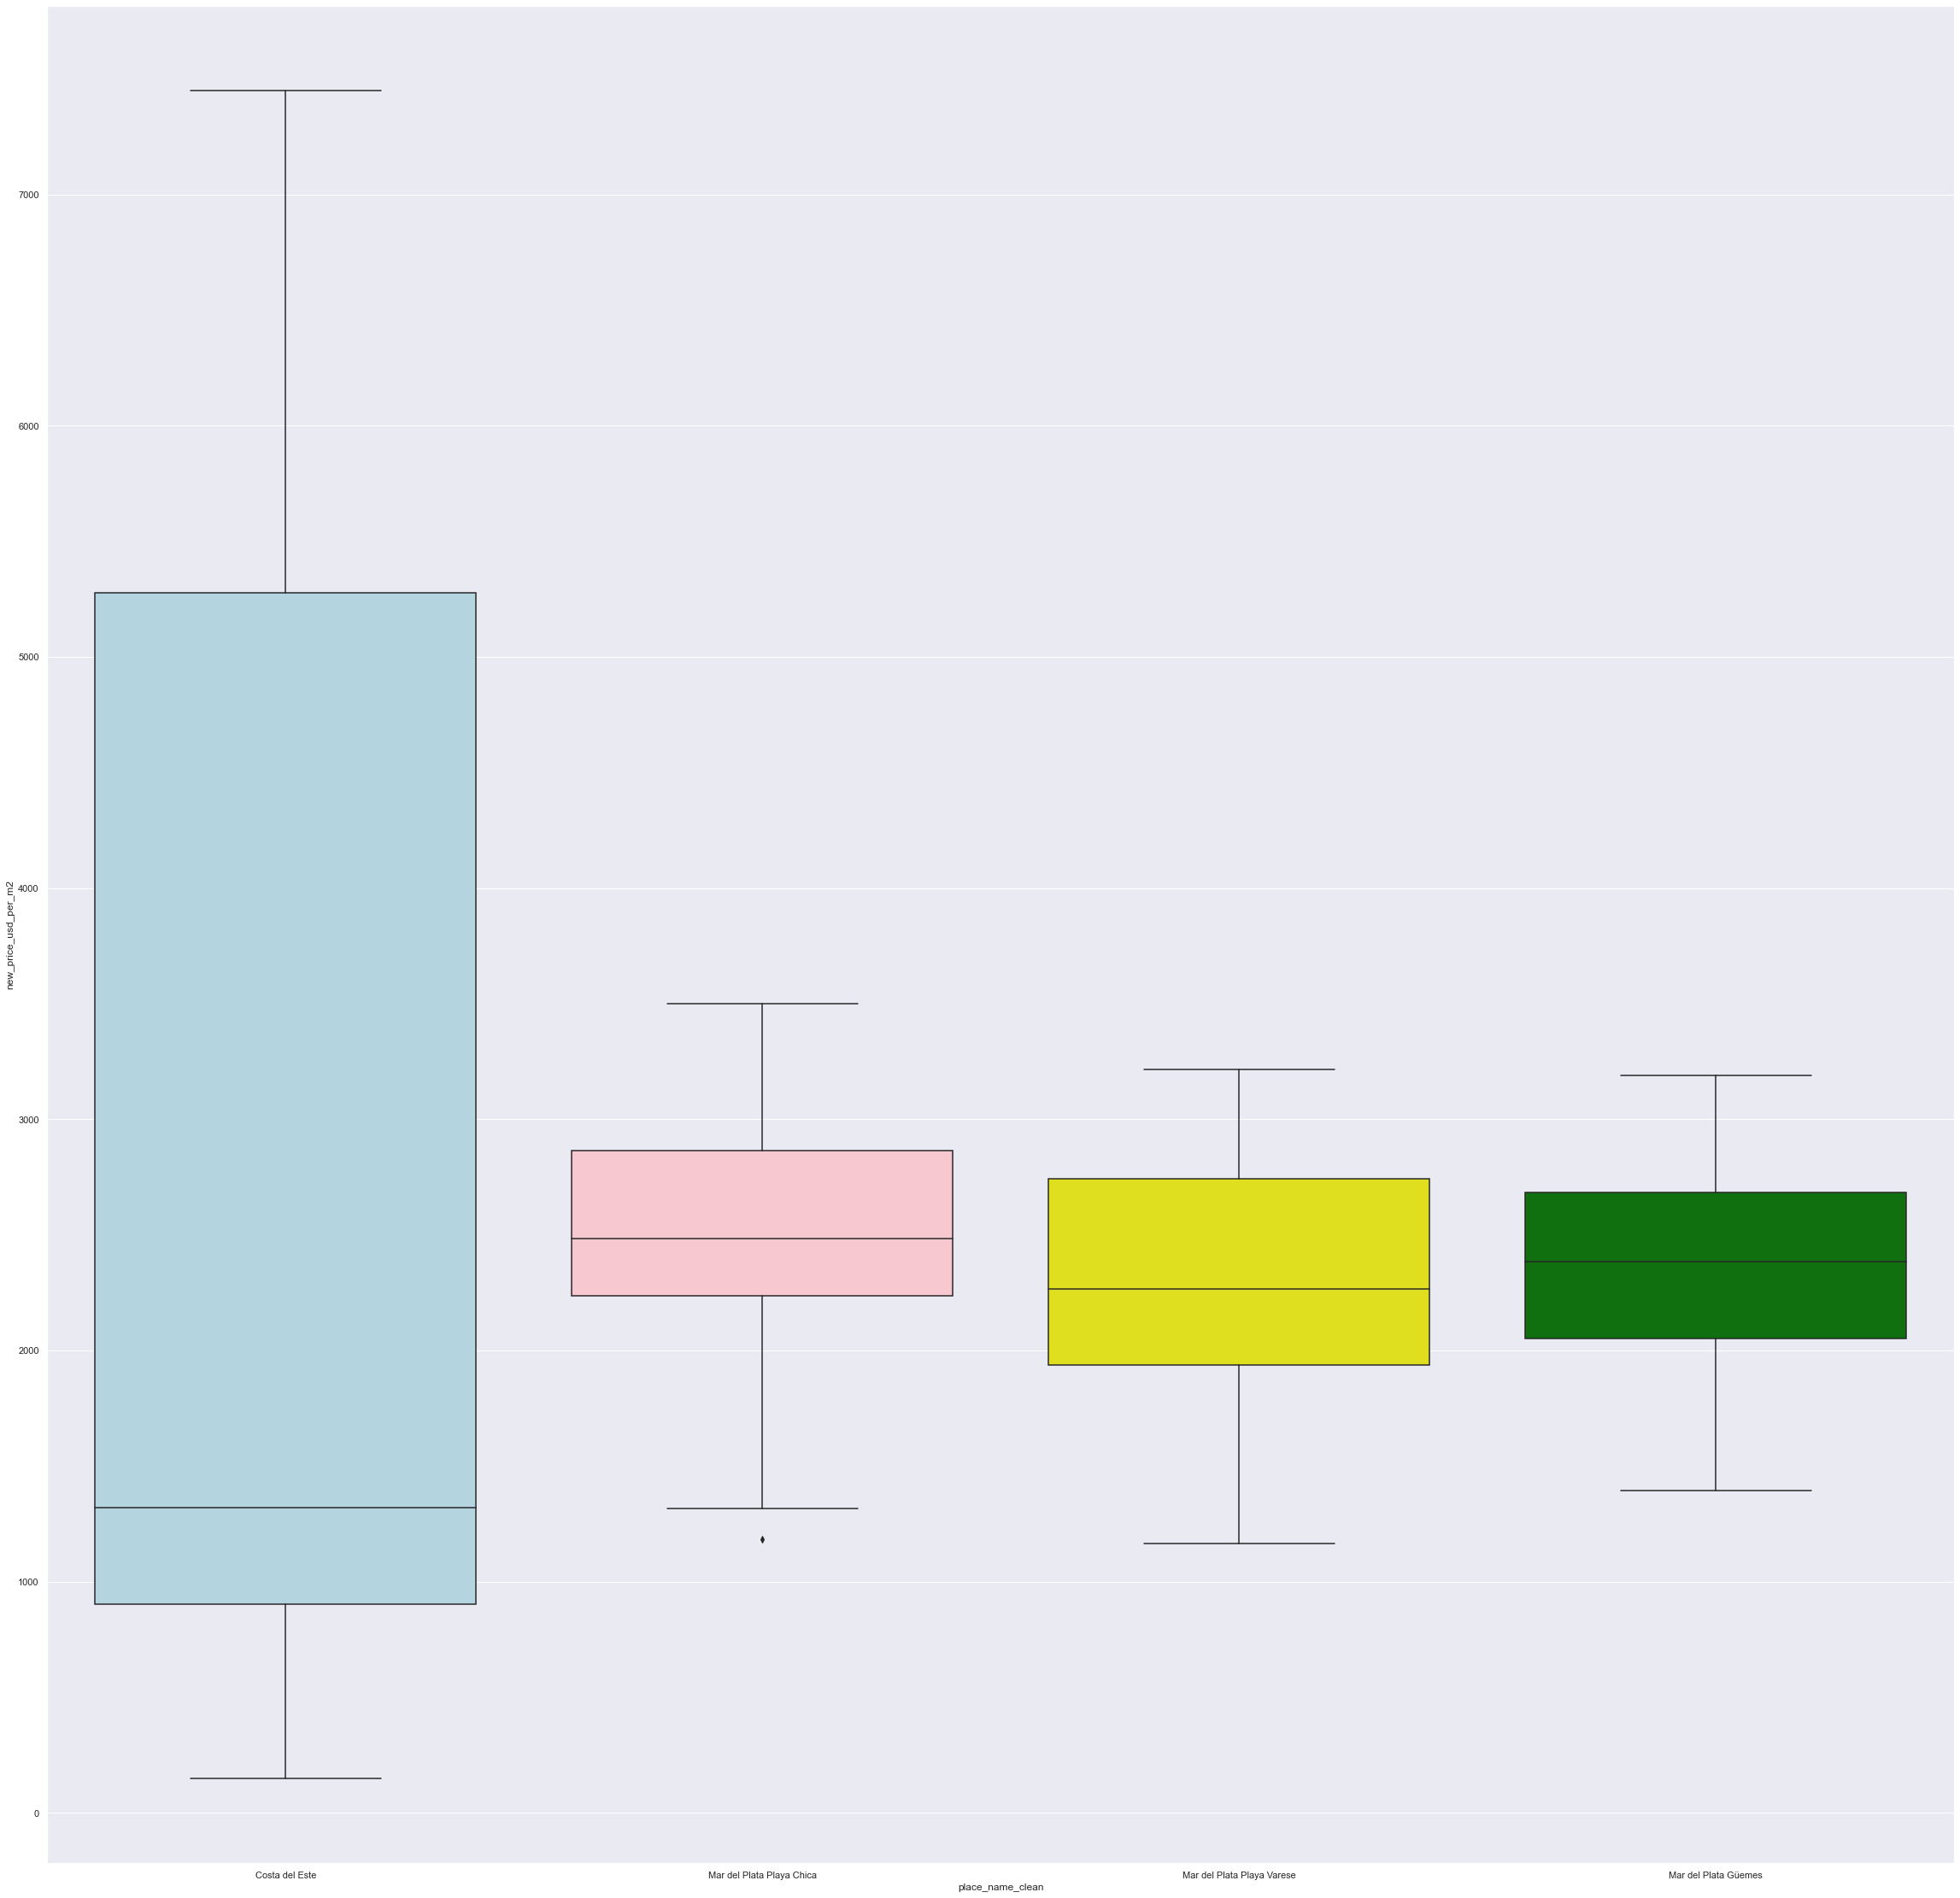

In [228]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['Costa del Este', 'Mar del Plata Playa Grande"', 'Mar del Plata Playa Chica', 'Mar del Plata Güemes', 'Mar del Plata Playa Varese']
data_suburb_mask = df_4_bsas_costa.place_name_clean.apply(lambda x: x in suburb_values)
data_suburb = df_4_bsas_costa.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name_clean", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [229]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia con tope 8000",df_4_bsas_costa['new_price_usd_per_m2'].describe(),"limpia sin tope",df_3_bsas_costa['new_price_usd_per_m2'].describe(),"original",bsas_costa.price_usd_per_m2.describe())

limpia con tope 8000 count    7965.000000
mean     1606.059107
std       789.163631
min         1.000000
25%      1100.000000
50%      1640.000000
75%      2063.076923
max      7495.000000
Name: new_price_usd_per_m2, dtype: float64 limpia sin tope count     7996.000000
mean      1654.723551
std       1161.855503
min          1.000000
25%       1100.000000
50%       1642.857143
75%       2070.370370
max      37500.000000
Name: new_price_usd_per_m2, dtype: float64 original count     6350.000000
mean      1574.633123
std        916.209264
min          1.000000
25%       1000.000000
50%       1617.647059
75%       2051.282051
max      21897.058824
Name: price_usd_per_m2, dtype: float64


# 2. F. Buenos Aires Zona Interior

In [230]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia",df_3_bsas_interior['new_price_usd_per_m2'].describe(),"original",bsas_interior.price_usd_per_m2.describe())

limpia count     1539.000000
mean      1440.081508
std       2115.466227
min          2.072029
25%        533.333333
50%       1187.500000
75%       1785.714286
max      39000.000000
Name: new_price_usd_per_m2, dtype: float64 original count    1011.000000
mean      959.950891
std       707.412120
min         2.072029
25%       320.000000
50%       866.666667
75%      1500.000000
max      4166.666667
Name: price_usd_per_m2, dtype: float64


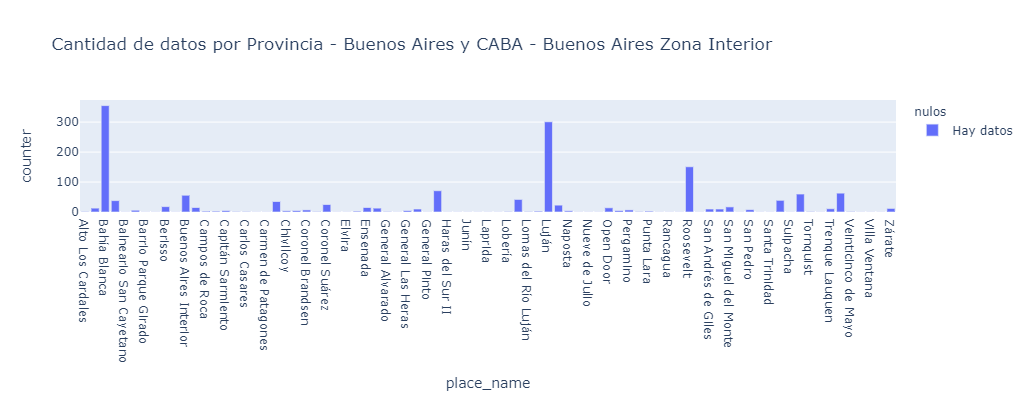

In [231]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
df_3_bsas_interior_grupo = df_3_bsas_interior.groupby(by=['state_name',"place_name",'nulos'],as_index=False)['counter'].sum()
df_3_bsas_interior_grupo['nulos'] = df_3_bsas_interior_grupo['nulos'].astype(str)
df_3_bsas_interior_grupo['nulos'] = df_3_bsas_interior_grupo.nulos.str.replace('False','Hay datos')
df_3_bsas_interior_grupo['nulos'] = df_3_bsas_interior_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(df_3_bsas_interior_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Buenos Aires Zona Interior")
fig.show()

In [232]:
#Generamos nuevamente el query de limpios
df_3_bsas_interior_clean = df_3.query(' state_name == "Buenos Aires Interior"')
#agrupamos por barrio y mostramos las columnas Precio USD/ m2 y m2
df_3_bsas_interior_clean_mean =df_3_bsas_interior_clean.groupby(['place_name_clean']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
df_3_bsas_interior_clean_mean


,new_price_usd_per_m2,surface_total_in_m2_clean
place_name_clean,,
Carlos Keen,18500.000000,20.000000
Cardales Country Club,14057.692308,140.000000
Baradero,13265.220738,4066.666667
San Nicolás de los Arroyos,8750.000000,20.000000
Coronel Brandsen,3251.854545,7349.285714
...,...,...
Naposta,97.698567,169.750000
Villars,97.222222,360.000000
El Remanso,47.368421,3800.000000


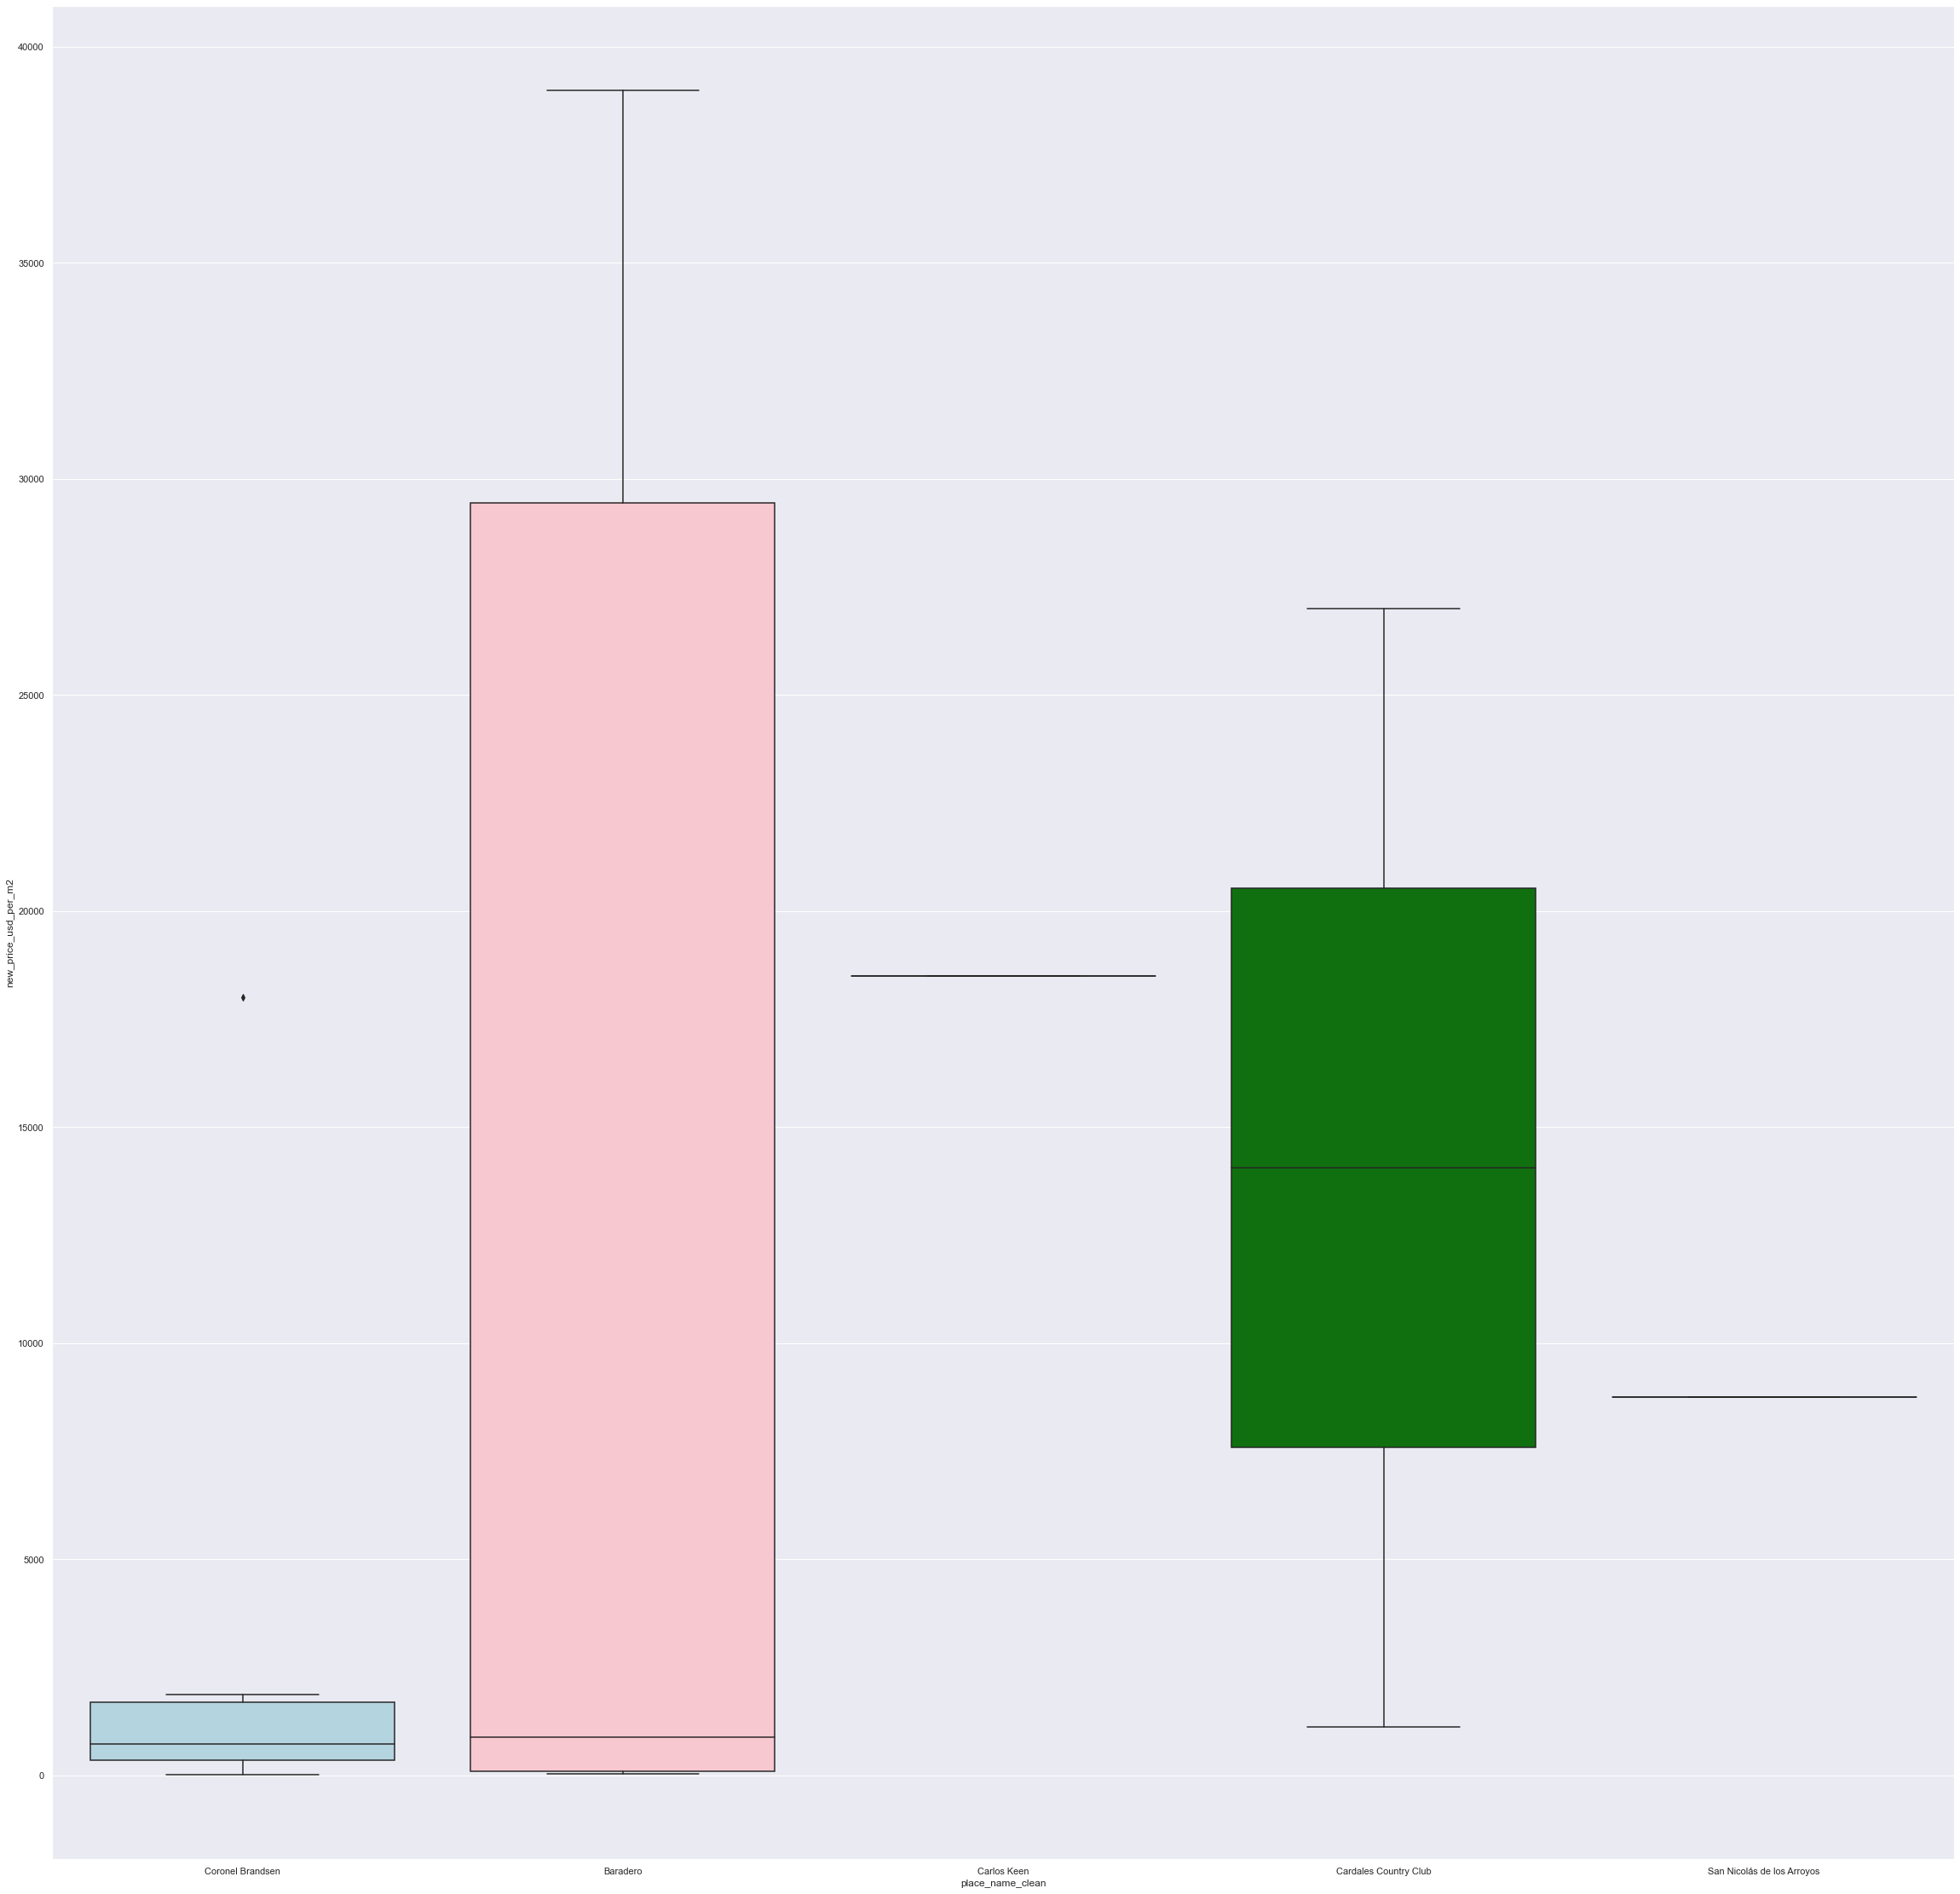

In [233]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['Carlos Keen', 'Cardales Country Club', 'Baradero', 'San Nicolás de los Arroyos', 'Coronel Brandsen']
data_suburb_mask = df_3_bsas_interior_clean.place_name_clean.apply(lambda x: x in suburb_values)
data_suburb = df_3_bsas_interior_clean.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name_clean", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [234]:
#establecemos que en los menores USD 8500 es donde los datos se encuentran mas concentrados 
df_4_bsas_interior = df_3_bsas_interior_clean[df_3_bsas_interior_clean['new_price_usd_per_m2'] < 10000]
df_4_bsas_interior_mean = df_4_bsas_interior.groupby(['place_name_clean']).mean().sort_values('new_price_usd_per_m2', ascending=False)[['new_price_usd_per_m2','surface_total_in_m2_clean']]
df_4_bsas_interior_mean

,new_price_usd_per_m2,surface_total_in_m2_clean
place_name_clean,,
San Nicolás de los Arroyos,8750.000000,20.000000
Roosevelt,2943.455540,83.894040
Capilla del Señor,2496.620370,1566.666667
Chivilcoy,2493.777253,174.500000
Punta Lara,1944.233933,30.000000
...,...,...
Naposta,97.698567,169.750000
Villars,97.222222,360.000000
El Remanso,47.368421,3800.000000


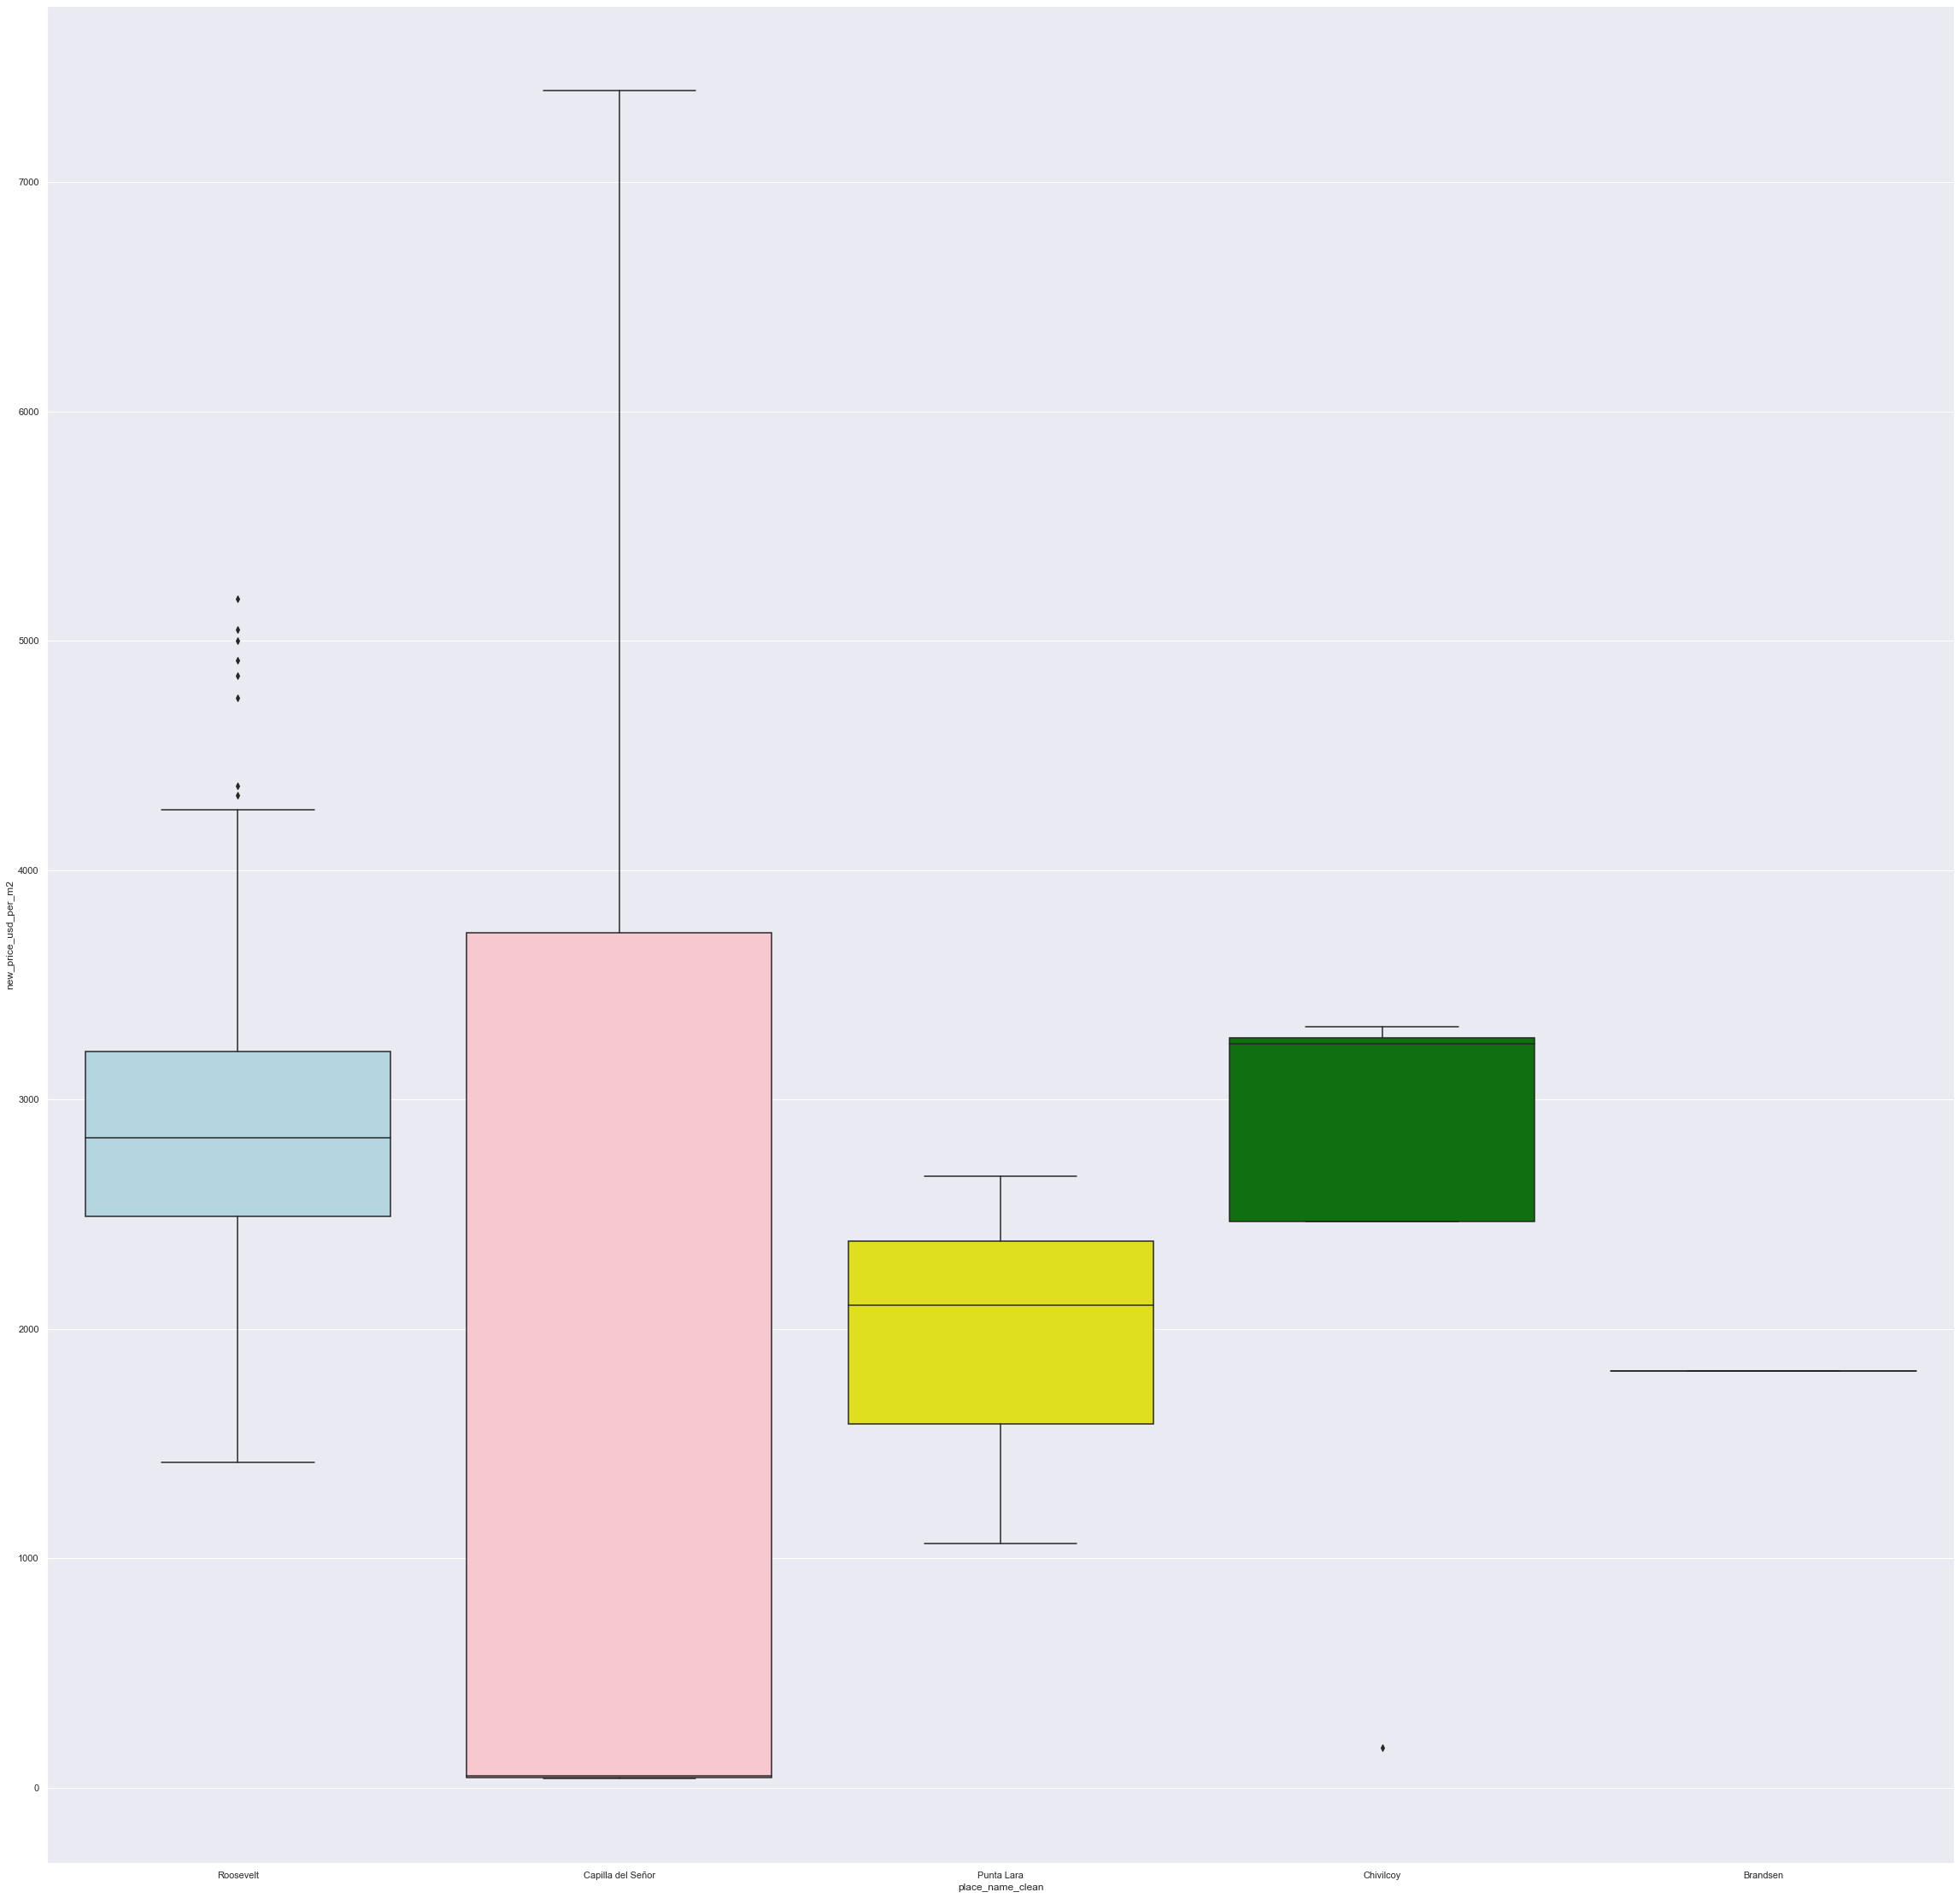

In [235]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['Roosevelt', 'Capilla del Señor', 'Chivilcoy', 'Punta Lara', 'Brandsen']
data_suburb_mask = df_4_bsas_interior.place_name_clean.apply(lambda x: x in suburb_values)
data_suburb = df_4_bsas_interior.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name_clean", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [236]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia con tope 8500",df_4_bsas_interior['new_price_usd_per_m2'].describe(),"limpia sin tope",df_3_bsas_interior['new_price_usd_per_m2'].describe(),"original",bsas_interior.price_usd_per_m2.describe())

limpia con tope 8500 count    1528.000000
mean     1297.798064
std      1004.767014
min         2.072029
25%       533.101852
50%      1180.194805
75%      1765.493162
max      9000.000000
Name: new_price_usd_per_m2, dtype: float64 limpia sin tope count     1539.000000
mean      1440.081508
std       2115.466227
min          2.072029
25%        533.333333
50%       1187.500000
75%       1785.714286
max      39000.000000
Name: new_price_usd_per_m2, dtype: float64 original count    1011.000000
mean      959.950891
std       707.412120
min         2.072029
25%       320.000000
50%       866.666667
75%      1500.000000
max      4166.666667
Name: price_usd_per_m2, dtype: float64


In [237]:
df_4_pais_mean = df_3[df_3['new_price_usd_per_m2'] < 8000]
columnas = df_4_pais_mean.columns
@interact_manual
def plot(column=columnas):
    pivot = df_4_pais_mean.groupby(column).new_price_usd_per_m2.mean().round(2).reset_index(drop=False)
    fig = px.bar(pivot, x=column, y='new_price_usd_per_m2')
    fig.show()

interactive(children=(Dropdown(description='column', options=('Unnamed: 0', 'operation', 'property_type', 'pla…

In [238]:
columnas = df_3.columns
@interact_manual
def plot(column=columnas):
    pivot = df_3.groupby(column).new_price_usd_per_m2.count().reset_index(drop=False)
    fig = px.bar(pivot, x=column, y='new_price_usd_per_m2')
    fig.show()

interactive(children=(Dropdown(description='column', options=('Unnamed: 0', 'operation', 'property_type', 'pla…

In [239]:
columnas = df.columns
@interact_manual
def plot(column=columnas):
    pivot = df.groupby(column).price_usd_per_m2.mean().round(2).reset_index(drop=False)
    fig = px.bar(pivot, x=column, y='price_usd_per_m2')
    fig.show()

interactive(children=(Dropdown(description='column', options=('Unnamed: 0', 'operation', 'property_type', 'pla…

In [240]:
columnas = df.columns
@interact_manual
def plot(column=columnas):
    pivot = df.groupby(column).operation.count().reset_index(drop=False)
    fig = px.bar(pivot, x=column, y='operation')
    fig.show()

interactive(children=(Dropdown(description='column', options=('Unnamed: 0', 'operation', 'property_type', 'pla…